<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_Viral_7iterations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

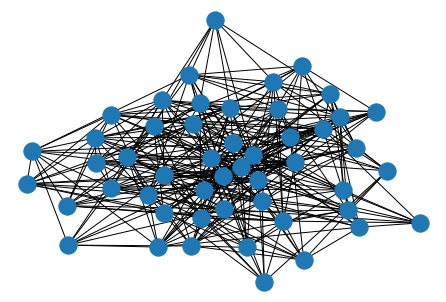

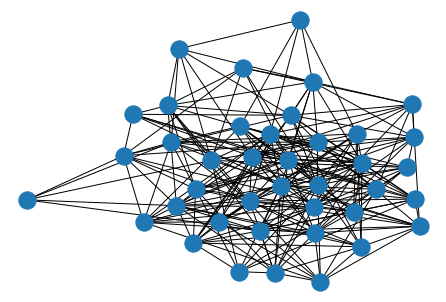

In [1]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 1 1 ... 1 0 0]
 [0 0 0 ... 1 0 0]]
[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  neighbors.append(Agent_next[a_id][3]['First_node'])
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:                       
                      PNN2 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .1*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                      next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      
                      PNN2 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][1]][2]['I']**2+1))
                      PNN3 = .3*(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']/(Node[Agent_next[a_id][8]['Current_nodeN'][2]][2]['I']**2+1))
                      PNN1 = 1 - PNN2 - PNN3
                       
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            if nex != cur:
              Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] <= .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821]
[178, 349, 567, 773, 916, 1003, 1039, 874, 706, 494, 293, 159, 75, 46, 37, 46, 51, 56, 53, 51, 44, 41, 32, 23, 19, 14, 19, 23, 30, 31, 32, 28, 30, 26, 23, 17, 13, 12, 10, 7, 5, 4, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 349, 567, 773, 916, 1003, 1039, 1052, 1055, 1061, 1066, 1075, 1078, 1085, 1089, 1101, 1112, 1122, 1128, 1129, 1129, 1130, 1133, 1135, 1141, 1142, 1148, 1152, 1160, 1164, 1167, 1169, 1172, 1174, 1175, 1177, 1177, 1179]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821]]
[[], [178, 349, 56

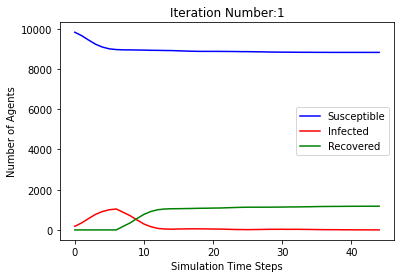

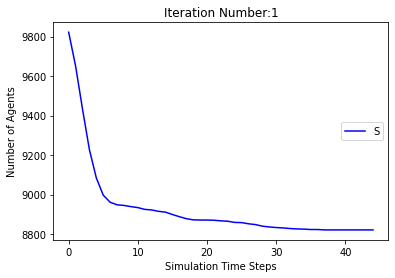

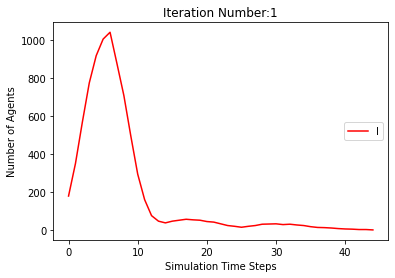

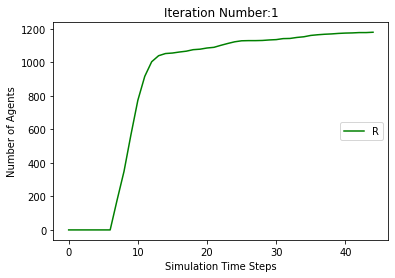

[9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579]
[178, 338, 553, 784, 959, 1065, 1123, 990, 873, 687, 487, 330, 248, 208, 181, 164, 151, 137, 127, 108, 90, 72, 46, 30, 13, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 338, 553, 784, 959, 1065, 1123, 1168, 1211, 1240, 1271, 1289, 1313, 1331, 1349, 1375, 1391, 1408, 1416, 1421]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579]]
[[], [178, 349, 567, 773, 916, 1003, 1039, 874, 706, 494, 293, 159, 75, 46, 37, 46, 51, 56, 53, 51, 44, 41, 32, 23, 19, 14, 19, 23

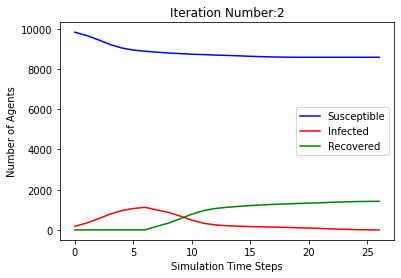

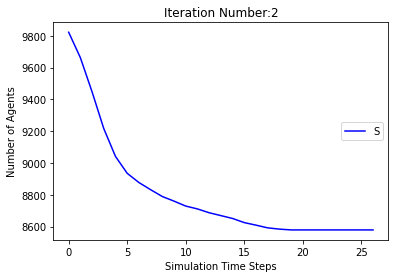

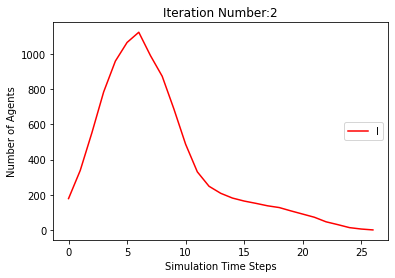

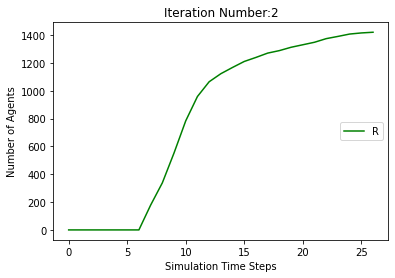

[9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 8690, 8686, 8685, 8684, 8682, 8675, 8670, 8664, 8662, 8661, 8661, 8661, 8659, 8658, 8657, 8656, 8653, 8649, 8646, 8643, 8640, 8638, 8636, 8634, 8633, 8629, 8629, 8628, 8628, 8628, 8628, 8628, 8628, 8628, 8628]
[178, 361, 580, 804, 931, 993, 1032, 881, 709, 503, 288, 168, 113, 86, 67, 75, 72, 71, 81, 90, 88, 88, 78, 77, 77, 69, 59, 52, 47, 40, 36, 31, 24, 19, 17, 14, 12, 11, 13, 20, 25, 30, 35, 39, 36, 32, 25, 26, 25, 26, 24, 24, 23, 21, 16, 12, 7, 6, 8, 12, 15, 16, 18, 19, 20, 19, 16, 17, 14, 12, 10, 8, 6, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 361, 580, 804, 931, 993, 1032, 1059, 1070, 1083, 1092, 1099, 1106, 1118, 1126, 1145, 1155, 1163, 1180, 1196, 1206, 1214, 1223, 1232, 1240, 1249, 1255, 1258, 1261, 1263, 1268, 1271, 1273, 1274, 127

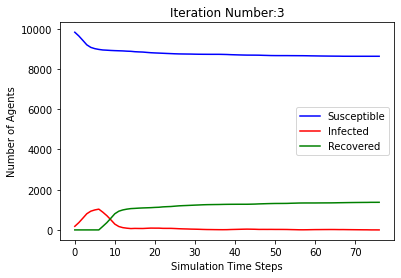

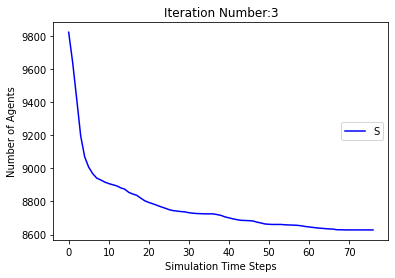

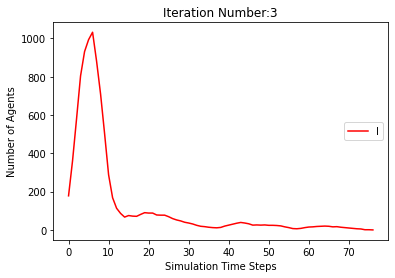

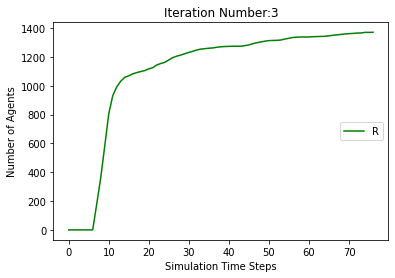

[9822, 9646, 9421, 9221, 9086, 9005, 8947, 8884, 8843, 8801, 8764, 8725, 8676, 8635, 8601, 8570, 8533, 8497, 8463, 8435, 8419, 8404, 8380, 8345, 8322, 8299, 8285, 8271, 8259, 8248, 8240, 8231, 8220, 8213, 8205, 8202, 8201, 8201, 8199, 8196, 8195, 8187, 8180, 8171, 8166, 8162, 8162, 8160, 8160, 8160, 8160, 8160, 8160, 8160, 8160]
[178, 354, 579, 779, 914, 995, 1053, 938, 803, 620, 457, 361, 329, 312, 283, 273, 268, 267, 262, 241, 216, 197, 190, 188, 175, 164, 150, 148, 145, 132, 105, 91, 79, 72, 66, 57, 47, 39, 32, 24, 18, 18, 22, 30, 35, 37, 34, 35, 27, 20, 11, 6, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 354, 579, 779, 914, 995, 1053, 1116, 1157, 1199, 1236, 1275, 1324, 1365, 1399, 1430, 1467, 1503, 1537, 1565, 1581, 1596, 1620, 1655, 1678, 1701, 1715, 1729, 1741, 1752, 1760, 1769, 1780, 1787, 1795, 1798, 1799, 1799, 1801, 1804, 1805, 1813, 1820, 1829, 1834, 1838, 1838, 1840]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 88

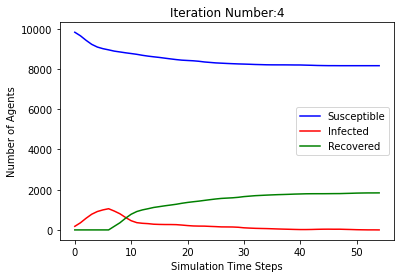

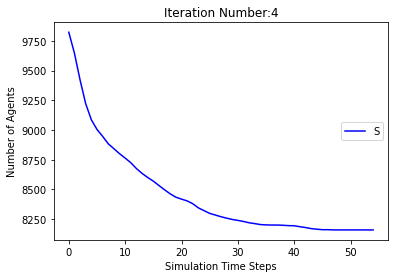

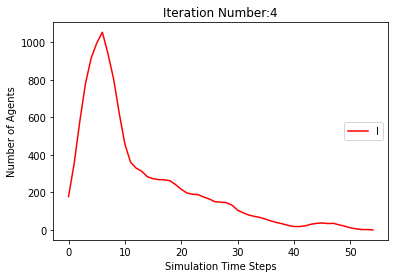

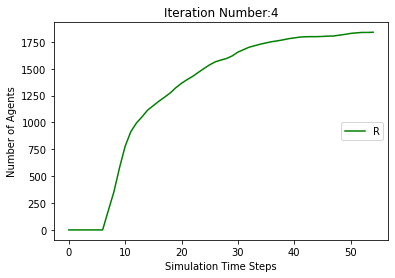

[9822, 9654, 9435, 9216, 9077, 9003, 8978, 8962, 8957, 8955, 8950, 8946, 8944, 8940, 8935, 8934, 8933, 8930, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[178, 346, 565, 784, 923, 997, 1022, 860, 697, 480, 266, 131, 59, 38, 27, 23, 22, 20, 17, 15, 11, 6, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 346, 565, 784, 923, 997, 1022, 1038, 1043, 1045, 1050, 1054, 1056, 1060, 1065, 1066, 1067, 1070, 1071]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 87

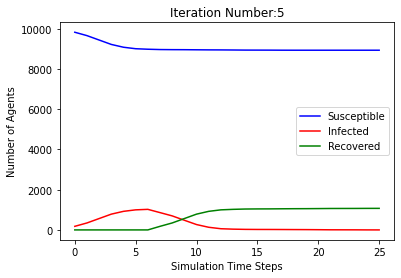

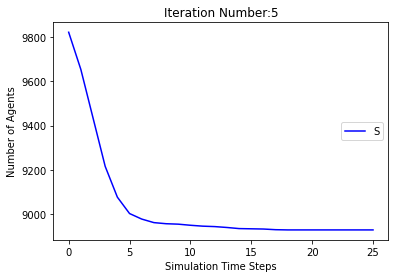

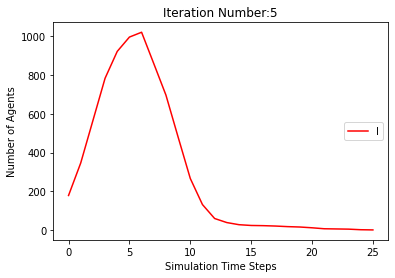

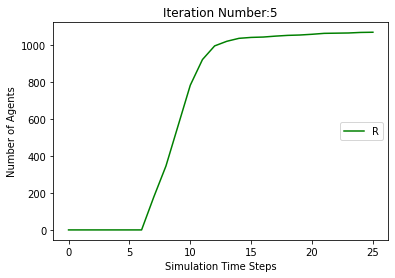

[9822, 9636, 9399, 9189, 9057, 8987, 8931, 8886, 8840, 8797, 8774, 8755, 8742, 8730, 8707, 8687, 8670, 8659, 8648, 8642, 8637, 8630, 8624, 8622, 8622, 8622, 8622, 8622, 8622, 8622, 8622]
[178, 364, 601, 811, 943, 1013, 1069, 936, 796, 602, 415, 302, 245, 201, 179, 153, 127, 115, 107, 100, 93, 77, 63, 48, 37, 26, 20, 15, 8, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 364, 601, 811, 943, 1013, 1069, 1114, 1160, 1203, 1226, 1245, 1258, 1270, 1293, 1313, 1330, 1341, 1352, 1358, 1363, 1370, 1376, 1378]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 

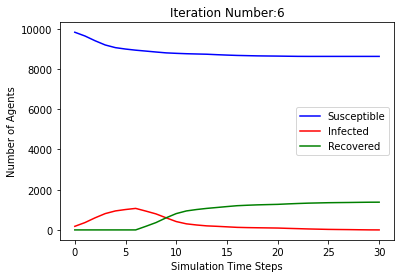

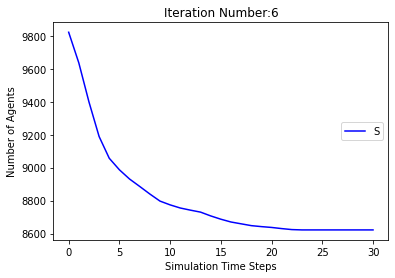

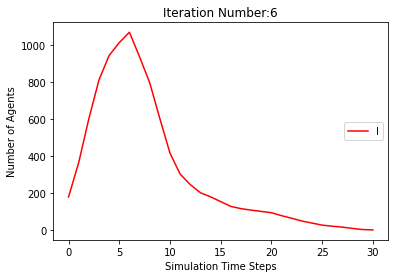

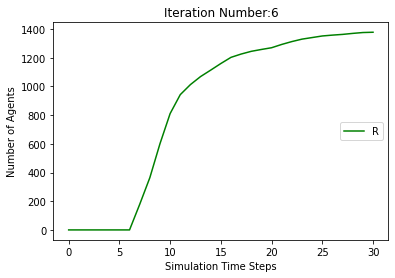

[9822, 9643, 9397, 9174, 9047, 8982, 8962, 8949, 8944, 8940, 8934, 8926, 8915, 8903, 8893, 8883, 8880, 8878, 8875, 8873, 8872, 8866, 8862, 8861, 8855, 8851, 8851, 8851, 8851, 8851, 8851, 8851, 8851]
[178, 357, 603, 826, 953, 1018, 1038, 873, 699, 457, 240, 121, 67, 59, 56, 61, 60, 56, 51, 42, 31, 27, 21, 19, 23, 24, 22, 21, 15, 11, 10, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 357, 603, 826, 953, 1018, 1038, 1051, 1056, 1060, 1066, 1074, 1085, 1097, 1107, 1117, 1120, 1122, 1125, 1127, 1128, 1134, 1138, 1139, 1145, 1149]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968,

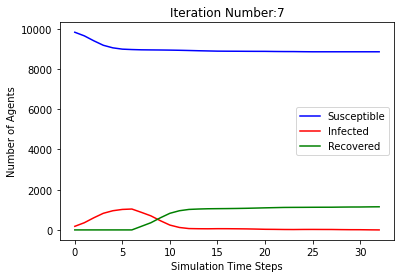

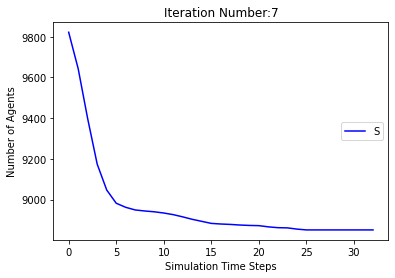

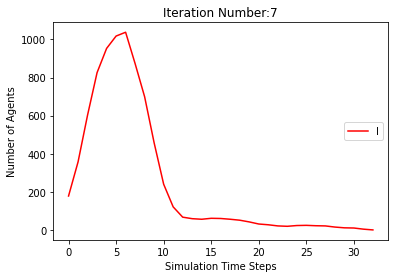

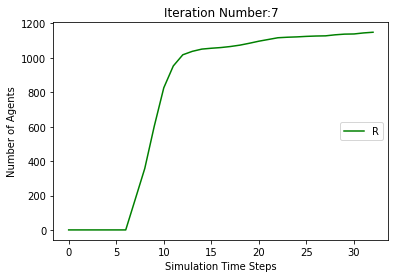

[9822, 9628, 9387, 9178, 9045, 8992, 8967, 8950, 8942, 8933, 8928, 8922, 8917, 8914, 8910, 8906, 8904, 8904, 8904, 8904, 8904, 8904, 8904, 8904]
[178, 372, 613, 822, 955, 1008, 1033, 872, 686, 454, 250, 123, 75, 53, 40, 36, 29, 24, 18, 13, 10, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 372, 613, 822, 955, 1008, 1033, 1050, 1058, 1067, 1072, 1078, 1083, 1086, 1090, 1094, 1096]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 

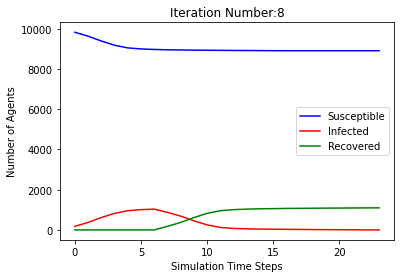

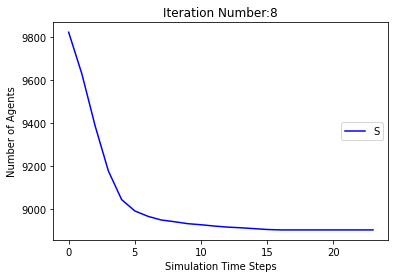

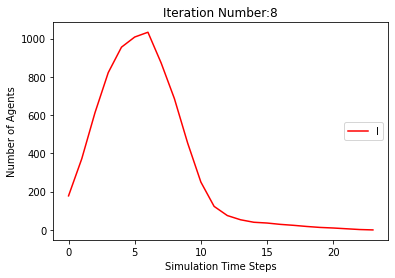

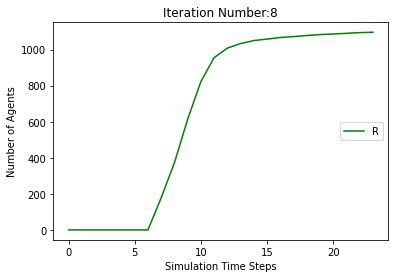

[9822, 9644, 9409, 9203, 9066, 9003, 8977, 8964, 8958, 8954, 8950, 8945, 8935, 8932, 8932, 8932, 8930, 8930, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[178, 356, 591, 797, 934, 997, 1023, 858, 686, 455, 253, 121, 68, 45, 32, 26, 24, 20, 16, 6, 3, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 356, 591, 797, 934, 997, 1023, 1036, 1042, 1046, 1050, 1055, 1065, 1068, 1068, 1068, 1070, 1070, 1071]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745

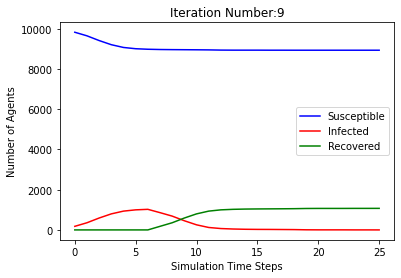

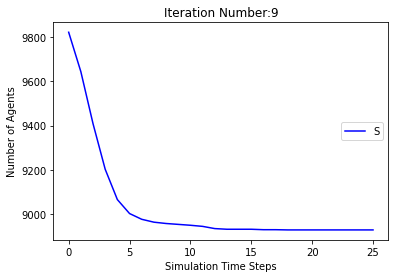

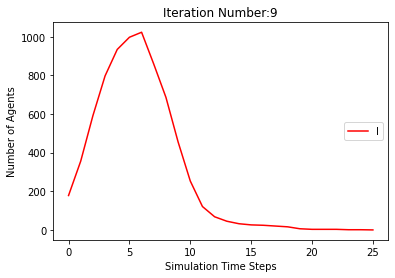

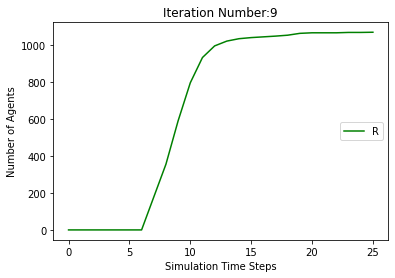

[9822, 9660, 9442, 9217, 9061, 8989, 8954, 8939, 8934, 8932, 8928, 8924, 8913, 8908, 8906, 8905, 8902, 8897, 8896, 8896, 8896, 8896, 8896, 8896, 8896, 8896]
[178, 340, 558, 783, 939, 1011, 1046, 883, 726, 510, 289, 137, 76, 46, 33, 29, 30, 31, 28, 17, 12, 10, 9, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 340, 558, 783, 939, 1011, 1046, 1061, 1066, 1068, 1072, 1076, 1087, 1092, 1094, 1095, 1098, 1103, 1104]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751,

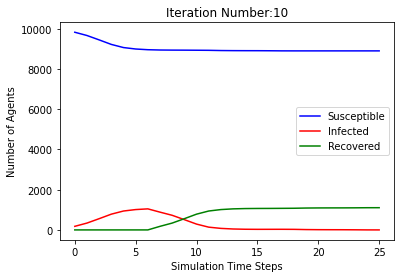

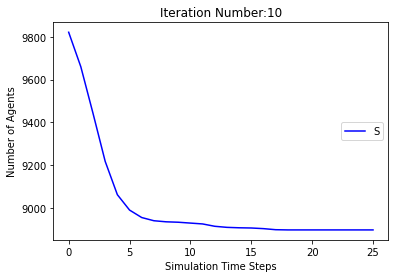

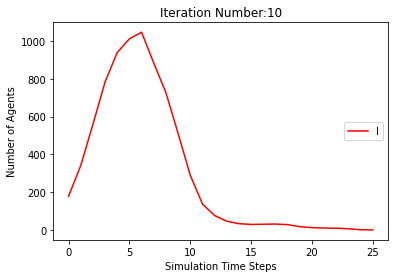

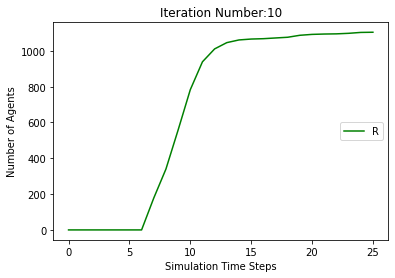

[9822, 9648, 9424, 9208, 9063, 8992, 8944, 8932, 8923, 8916, 8906, 8902, 8896, 8892, 8891, 8890, 8889, 8888, 8887, 8886, 8884, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883]
[178, 352, 576, 792, 937, 1008, 1056, 890, 725, 508, 302, 161, 96, 52, 41, 33, 27, 18, 15, 10, 8, 8, 7, 6, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 352, 576, 792, 937, 1008, 1056, 1068, 1077, 1084, 1094, 1098, 1104, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1116, 1117]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820

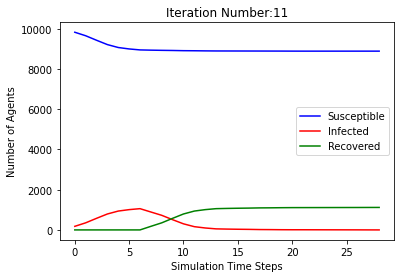

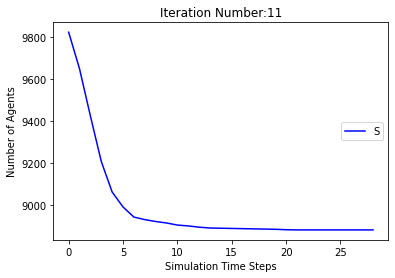

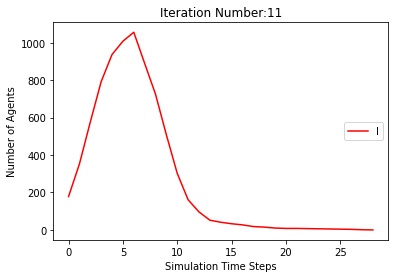

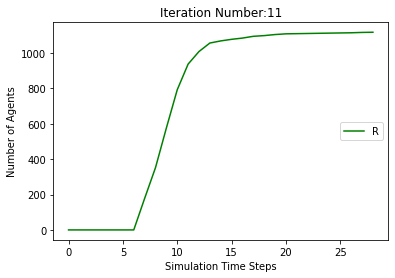

[9822, 9644, 9402, 9171, 9029, 8966, 8946, 8938, 8931, 8925, 8920, 8919, 8916, 8910, 8906, 8901, 8900, 8899, 8899, 8899, 8899, 8899, 8899, 8899, 8899]
[178, 356, 598, 829, 971, 1034, 1054, 884, 713, 477, 251, 110, 50, 36, 32, 30, 25, 21, 20, 17, 11, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 356, 598, 829, 971, 1034, 1054, 1062, 1069, 1075, 1080, 1081, 1084, 1090, 1094, 1099, 1100, 1101]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 873

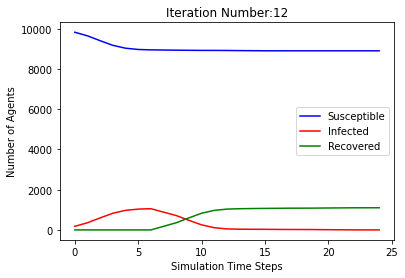

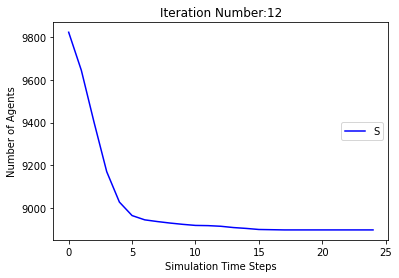

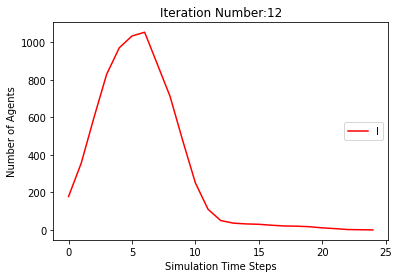

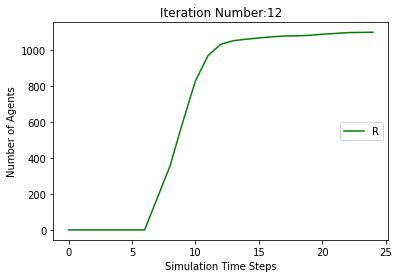

[9822, 9653, 9435, 9234, 9085, 9021, 8982, 8953, 8940, 8928, 8919, 8912, 8909, 8908, 8907, 8906, 8904, 8904, 8903, 8898, 8893, 8893, 8893, 8893, 8893, 8893, 8893, 8893]
[178, 347, 565, 766, 915, 979, 1018, 869, 713, 507, 315, 173, 112, 74, 46, 34, 24, 15, 9, 11, 15, 14, 13, 11, 11, 10, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 347, 565, 766, 915, 979, 1018, 1047, 1060, 1072, 1081, 1088, 1091, 1092, 1093, 1094, 1096, 1096, 1097, 1102, 1107]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 879

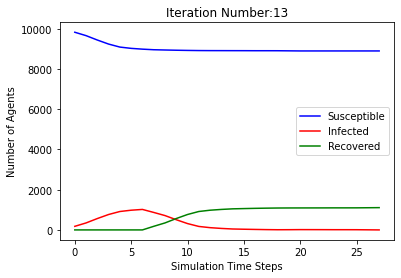

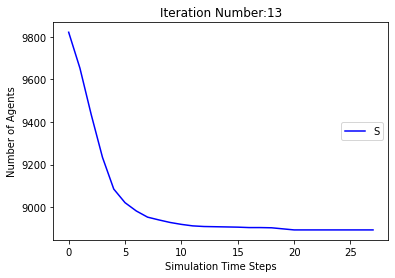

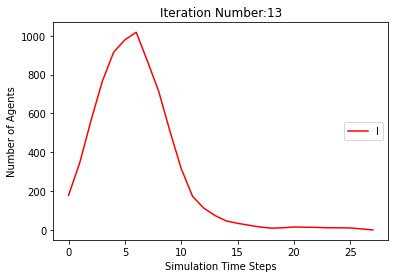

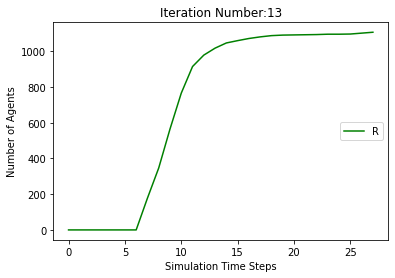

[9822, 9640, 9394, 9150, 9012, 8936, 8910, 8904, 8902, 8899, 8896, 8893, 8890, 8888, 8885, 8882, 8880, 8879, 8879, 8879, 8879, 8879, 8879, 8879, 8879]
[178, 360, 606, 850, 988, 1064, 1090, 918, 738, 495, 254, 119, 46, 22, 19, 20, 19, 17, 14, 11, 9, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 360, 606, 850, 988, 1064, 1090, 1096, 1098, 1101, 1104, 1107, 1110, 1112, 1115, 1118, 1120, 1121]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739

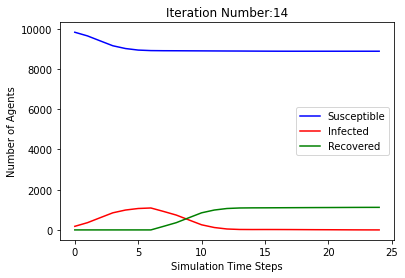

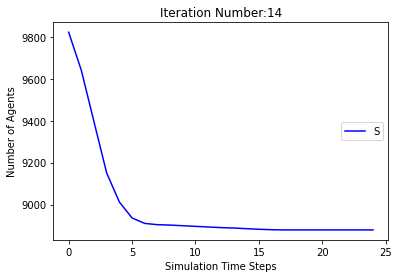

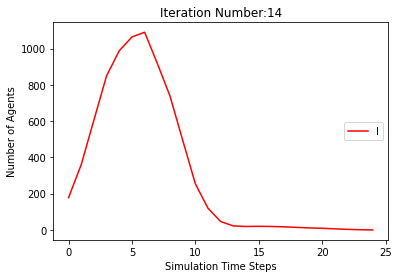

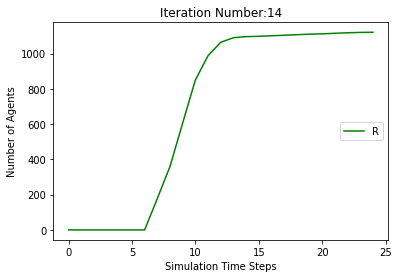

[9822, 9648, 9425, 9210, 9074, 8990, 8947, 8917, 8899, 8882, 8869, 8857, 8847, 8840, 8826, 8817, 8809, 8803, 8793, 8780, 8764, 8753, 8740, 8732, 8730, 8728, 8725, 8724, 8724, 8724, 8724, 8723, 8723, 8723, 8722, 8722, 8722, 8722, 8722, 8722, 8722, 8722]
[178, 352, 575, 790, 926, 1010, 1053, 905, 749, 543, 341, 217, 143, 107, 91, 82, 73, 66, 64, 67, 76, 73, 77, 77, 73, 65, 55, 40, 29, 16, 8, 7, 5, 2, 2, 2, 2, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 352, 575, 790, 926, 1010, 1053, 1083, 1101, 1118, 1131, 1143, 1153, 1160, 1174, 1183, 1191, 1197, 1207, 1220, 1236, 1247, 1260, 1268, 1270, 1272, 1275, 1276, 1276, 1276, 1276, 1277, 1277, 1277, 1278]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 871

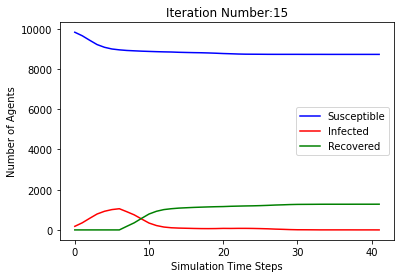

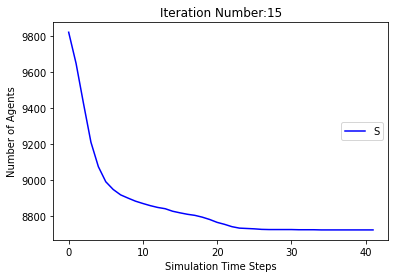

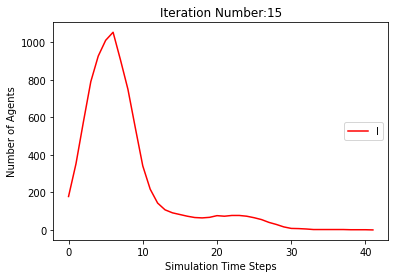

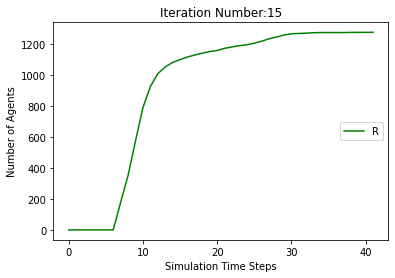

[9822, 9661, 9428, 9205, 9061, 8996, 8961, 8946, 8930, 8908, 8883, 8858, 8841, 8823, 8814, 8808, 8804, 8802, 8792, 8786, 8779, 8772, 8765, 8760, 8757, 8754, 8751, 8750, 8749, 8749, 8749, 8749, 8749, 8747, 8744, 8740, 8736, 8734, 8734, 8734, 8734, 8734, 8734, 8734, 8734]
[178, 339, 572, 795, 939, 1004, 1039, 876, 731, 520, 322, 203, 155, 138, 132, 122, 104, 81, 66, 55, 44, 42, 43, 44, 45, 38, 35, 29, 23, 16, 11, 8, 5, 4, 6, 9, 13, 15, 15, 15, 13, 10, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 339, 572, 795, 939, 1004, 1039, 1054, 1070, 1092, 1117, 1142, 1159, 1177, 1186, 1192, 1196, 1198, 1208, 1214, 1221, 1228, 1235, 1240, 1243, 1246, 1249, 1250, 1251, 1251, 1251, 1251, 1251, 1253, 1256, 1260, 1264, 1266]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 94

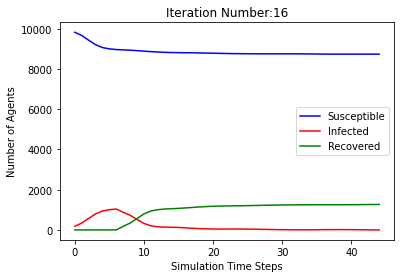

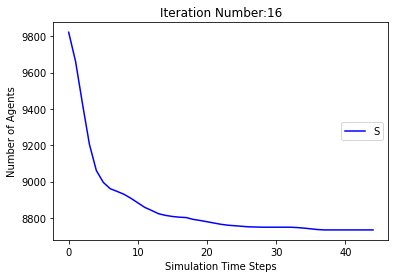

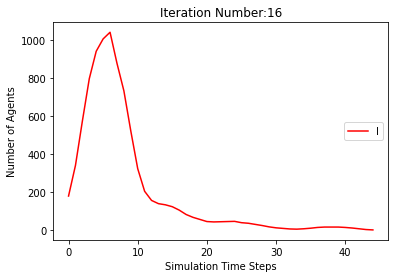

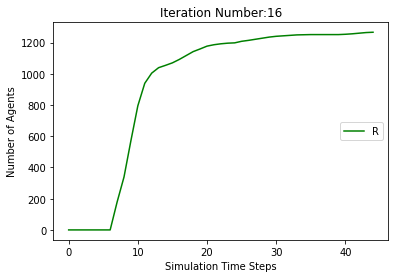

[9822, 9649, 9428, 9209, 9068, 8993, 8963, 8948, 8935, 8921, 8907, 8895, 8886, 8878, 8871, 8865, 8857, 8849, 8842, 8839, 8838, 8835, 8832, 8830, 8828, 8826, 8825, 8824, 8824, 8824, 8824, 8824, 8824, 8824, 8824]
[178, 351, 572, 791, 932, 1007, 1037, 874, 714, 507, 302, 173, 107, 85, 77, 70, 64, 58, 53, 47, 40, 36, 33, 27, 21, 16, 14, 14, 11, 8, 6, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 351, 572, 791, 932, 1007, 1037, 1052, 1065, 1079, 1093, 1105, 1114, 1122, 1129, 1135, 1143, 1151, 1158, 1161, 1162, 1165, 1168, 1170, 1172, 1174, 1175, 1176]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 

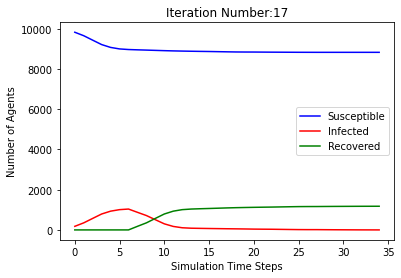

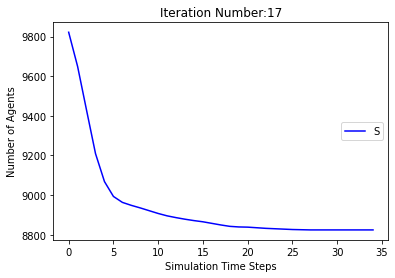

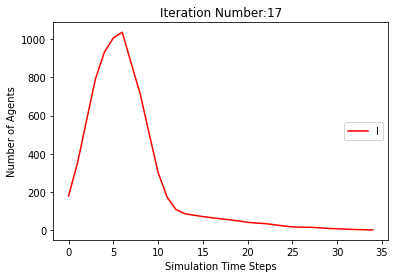

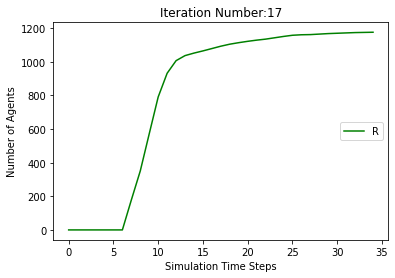

[9822, 9655, 9425, 9214, 9055, 8994, 8962, 8945, 8936, 8929, 8919, 8914, 8907, 8905, 8903, 8899, 8897, 8893, 8892, 8890, 8887, 8884, 8883, 8883, 8883, 8883, 8883, 8883, 8883, 8883]
[178, 345, 575, 786, 945, 1006, 1038, 877, 719, 496, 295, 141, 87, 57, 42, 37, 32, 26, 22, 17, 18, 19, 16, 14, 10, 9, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 345, 575, 786, 945, 1006, 1038, 1055, 1064, 1071, 1081, 1086, 1093, 1095, 1097, 1101, 1103, 1107, 1108, 1110, 1113, 1116, 1117]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 88

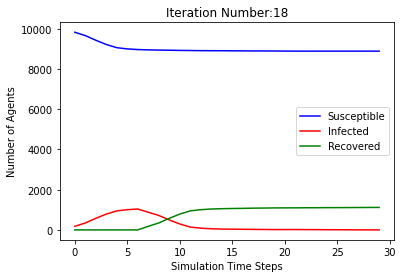

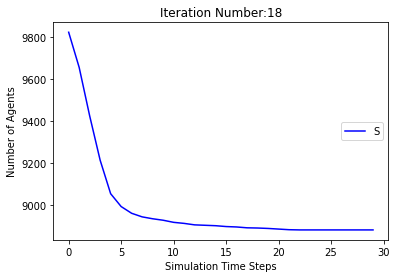

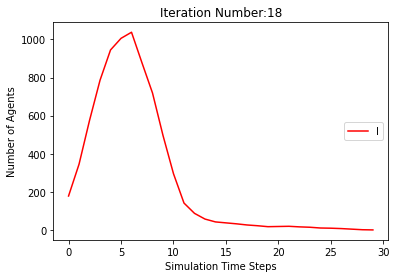

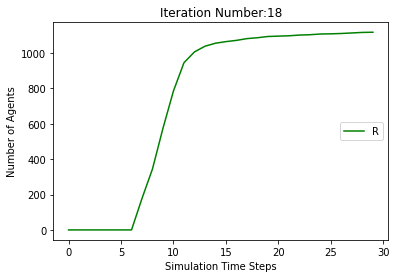

[9822, 9643, 9399, 9173, 9026, 8945, 8887, 8849, 8810, 8775, 8738, 8712, 8671, 8634, 8590, 8544, 8512, 8494, 8478, 8466, 8460, 8454, 8453, 8453, 8452, 8452, 8452, 8452, 8452, 8452, 8452, 8452]
[178, 357, 601, 827, 974, 1055, 1113, 973, 833, 624, 435, 314, 274, 253, 259, 266, 263, 244, 234, 205, 174, 136, 91, 59, 42, 26, 14, 8, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 357, 601, 827, 974, 1055, 1113, 1151, 1190, 1225, 1262, 1288, 1329, 1366, 1410, 1456, 1488, 1506, 1522, 1534, 1540, 1546, 1547, 1547, 1548]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 89

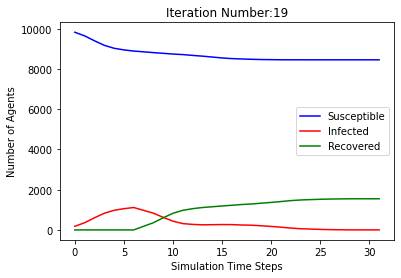

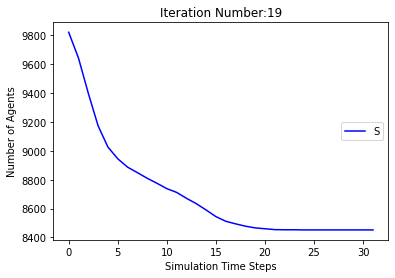

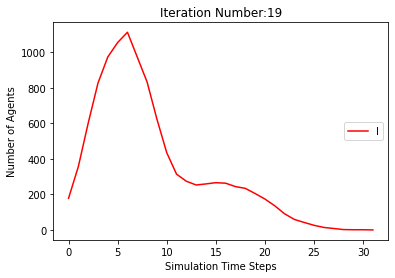

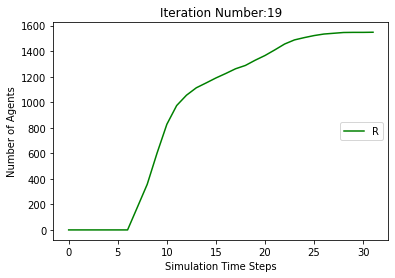

[9822, 9655, 9431, 9210, 9074, 8998, 8965, 8947, 8938, 8932, 8924, 8922, 8920, 8919, 8917, 8917, 8914, 8914, 8914, 8914, 8914, 8914, 8914, 8914]
[178, 345, 569, 790, 926, 1002, 1035, 875, 717, 499, 286, 152, 78, 46, 30, 21, 18, 10, 8, 6, 5, 3, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 345, 569, 790, 926, 1002, 1035, 1053, 1062, 1068, 1076, 1078, 1080, 1081, 1083, 1083, 1086]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 872

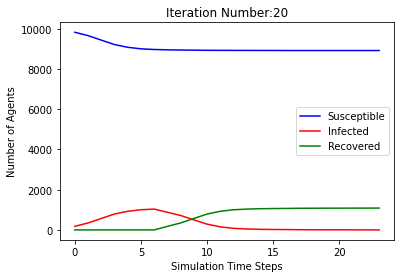

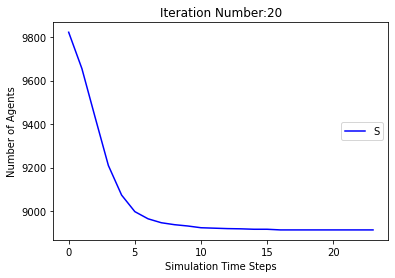

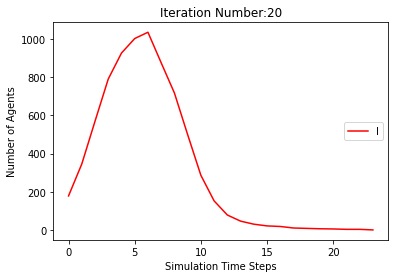

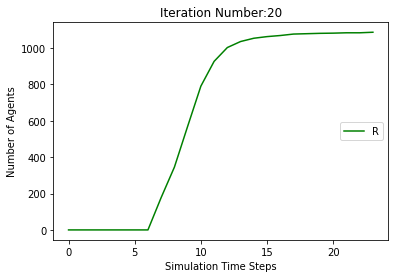

[9822, 9645, 9421, 9233, 9088, 9004, 8955, 8910, 8869, 8827, 8792, 8758, 8732, 8711, 8691, 8673, 8654, 8635, 8620, 8607, 8597, 8591, 8588, 8586, 8586, 8585, 8584, 8584, 8584, 8584, 8584, 8584, 8584, 8584]
[178, 355, 579, 767, 912, 996, 1045, 912, 776, 594, 441, 330, 272, 244, 219, 196, 173, 157, 138, 125, 114, 100, 85, 68, 49, 35, 23, 13, 7, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 355, 579, 767, 912, 996, 1045, 1090, 1131, 1173, 1208, 1242, 1268, 1289, 1309, 1327, 1346, 1365, 1380, 1393, 1403, 1409, 1412, 1414, 1414, 1415, 1416]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 919

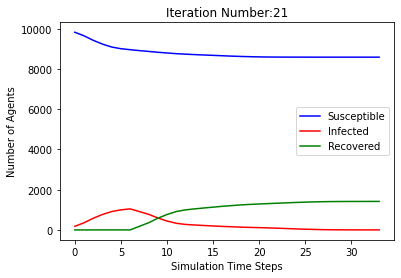

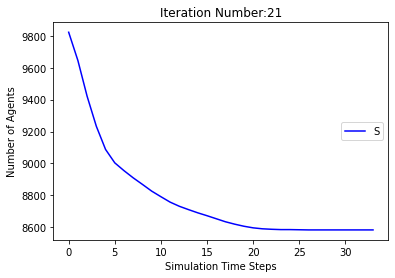

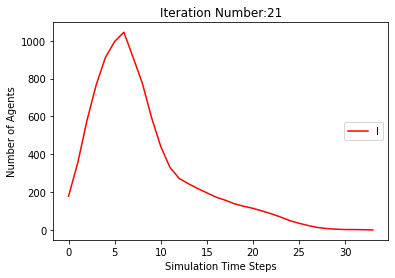

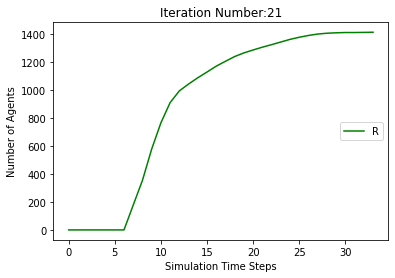

[9822, 9651, 9413, 9201, 9065, 8985, 8954, 8941, 8933, 8927, 8914, 8899, 8889, 8878, 8864, 8858, 8852, 8846, 8841, 8836, 8830, 8828, 8823, 8820, 8815, 8809, 8805, 8801, 8796, 8795, 8792, 8789, 8786, 8785, 8785, 8785, 8785, 8785, 8785, 8785, 8785]
[178, 349, 587, 799, 935, 1015, 1046, 881, 718, 486, 287, 166, 96, 76, 77, 75, 75, 68, 58, 53, 48, 36, 35, 32, 31, 32, 31, 29, 32, 28, 28, 26, 23, 20, 16, 11, 10, 7, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 349, 587, 799, 935, 1015, 1046, 1059, 1067, 1073, 1086, 1101, 1111, 1122, 1136, 1142, 1148, 1154, 1159, 1164, 1170, 1172, 1177, 1180, 1185, 1191, 1195, 1199, 1204, 1205, 1208, 1211, 1214, 1215]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8

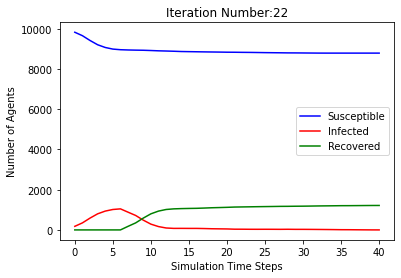

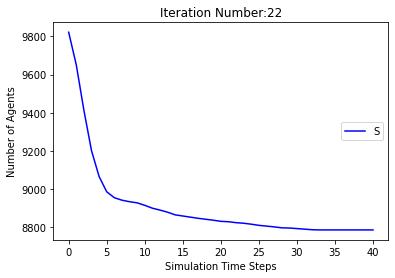

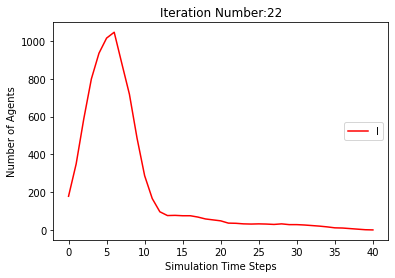

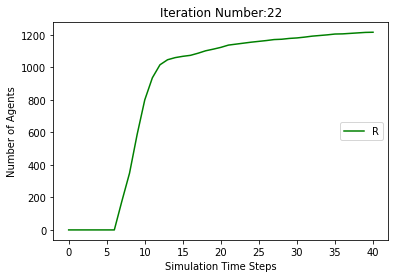

[9822, 9645, 9424, 9208, 9071, 8999, 8975, 8958, 8954, 8940, 8934, 8931, 8928, 8926, 8924, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923]
[178, 355, 576, 792, 929, 1001, 1025, 864, 691, 484, 274, 140, 71, 49, 34, 30, 17, 11, 8, 5, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 355, 576, 792, 929, 1001, 1025, 1042, 1046, 1060, 1066, 1069, 1072, 1074, 1076, 1076, 1077]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 872

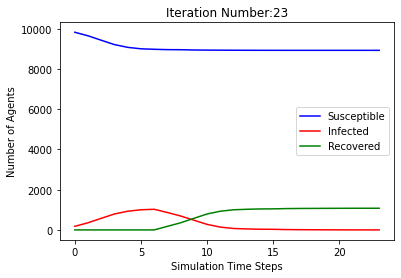

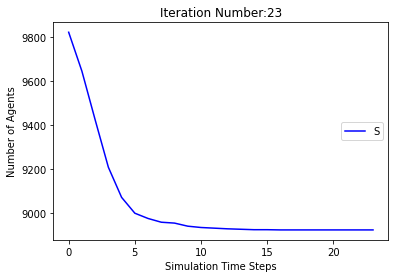

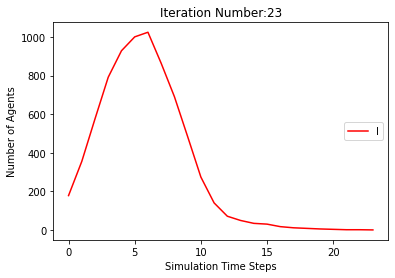

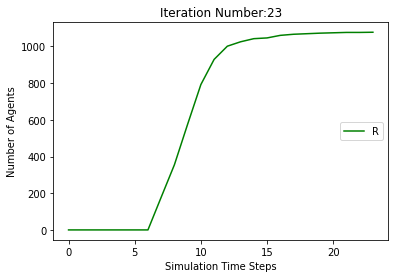

[9822, 9646, 9420, 9206, 9067, 8994, 8959, 8920, 8884, 8866, 8841, 8808, 8777, 8761, 8741, 8726, 8704, 8683, 8662, 8640, 8624, 8617, 8611, 8599, 8583, 8575, 8571, 8568, 8564, 8564, 8559, 8554, 8550, 8546, 8537, 8535, 8534, 8533, 8533, 8533, 8532, 8532, 8532, 8532, 8532, 8532, 8532, 8532]
[178, 354, 580, 794, 933, 1006, 1041, 902, 762, 554, 365, 259, 217, 198, 179, 158, 162, 158, 146, 137, 137, 124, 115, 105, 100, 87, 69, 56, 53, 47, 40, 29, 25, 25, 31, 29, 30, 26, 21, 17, 14, 5, 3, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 354, 580, 794, 933, 1006, 1041, 1080, 1116, 1134, 1159, 1192, 1223, 1239, 1259, 1274, 1296, 1317, 1338, 1360, 1376, 1383, 1389, 1401, 1417, 1425, 1429, 1432, 1436, 1436, 1441, 1446, 1450, 1454, 1463, 1465, 1466, 1467, 1467, 1467, 1468]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8

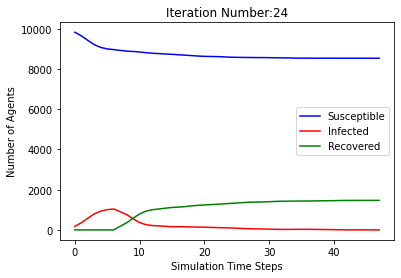

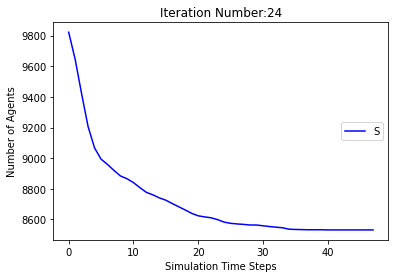

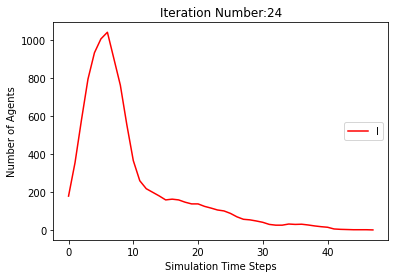

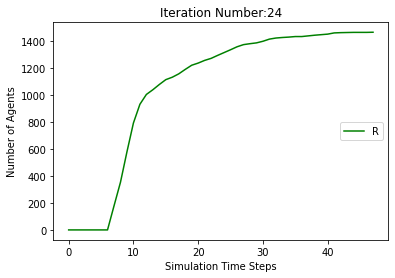

[9822, 9641, 9394, 9175, 9065, 9001, 8968, 8947, 8941, 8929, 8921, 8914, 8904, 8900, 8892, 8886, 8883, 8881, 8879, 8873, 8868, 8867, 8867, 8866, 8866, 8866, 8866, 8866, 8866, 8866, 8866]
[178, 359, 606, 825, 935, 999, 1032, 875, 700, 465, 254, 151, 97, 68, 55, 55, 46, 40, 35, 31, 32, 25, 19, 17, 15, 13, 7, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 359, 606, 825, 935, 999, 1032, 1053, 1059, 1071, 1079, 1086, 1096, 1100, 1108, 1114, 1117, 1119, 1121, 1127, 1132, 1133, 1133, 1134]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 

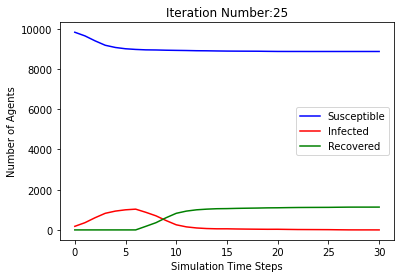

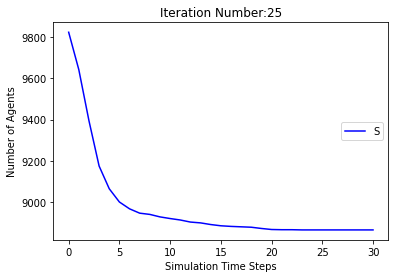

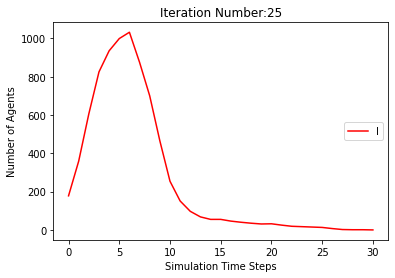

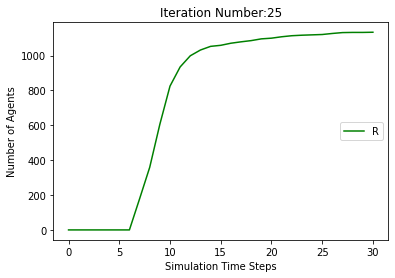

[9822, 9650, 9402, 9172, 9036, 8976, 8941, 8929, 8923, 8921, 8916, 8911, 8911, 8910, 8908, 8907, 8907, 8907, 8907, 8907, 8907, 8907, 8907]
[178, 350, 598, 828, 964, 1024, 1059, 893, 727, 481, 256, 125, 65, 31, 21, 16, 14, 9, 4, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 350, 598, 828, 964, 1024, 1059, 1071, 1077, 1079, 1084, 1089, 1089, 1090, 1092, 1093]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8

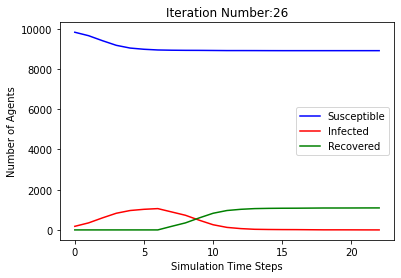

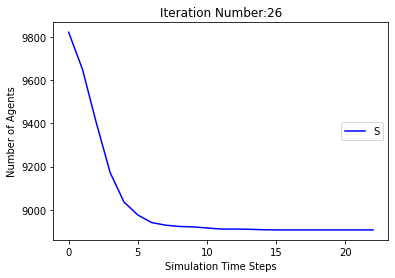

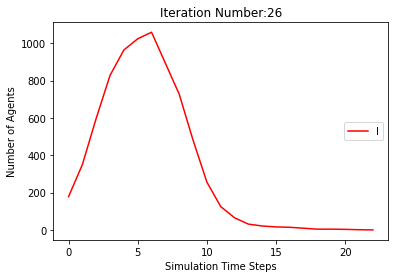

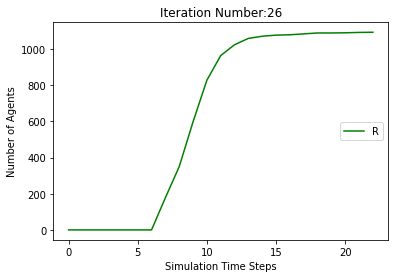

[9822, 9654, 9426, 9201, 9056, 9002, 8964, 8939, 8926, 8912, 8898, 8885, 8869, 8860, 8858, 8855, 8855, 8853, 8848, 8844, 8841, 8835, 8832, 8825, 8820, 8815, 8810, 8807, 8805, 8802, 8802, 8802, 8801, 8801, 8801, 8800, 8800, 8799, 8799, 8799, 8799, 8799, 8798, 8798, 8798, 8798, 8798, 8798, 8798, 8798]
[178, 346, 574, 799, 944, 998, 1036, 883, 728, 514, 303, 171, 133, 104, 81, 71, 57, 45, 37, 25, 19, 23, 23, 30, 33, 33, 34, 34, 30, 30, 23, 18, 14, 9, 6, 5, 2, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 346, 574, 799, 944, 998, 1036, 1061, 1074, 1088, 1102, 1115, 1131, 1140, 1142, 1145, 1145, 1147, 1152, 1156, 1159, 1165, 1168, 1175, 1180, 1185, 1190, 1193, 1195, 1198, 1198, 1198, 1199, 1199, 1199, 1200, 1200, 1201, 1201, 1201, 1201, 1201, 1202]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823

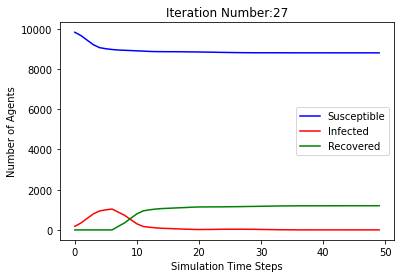

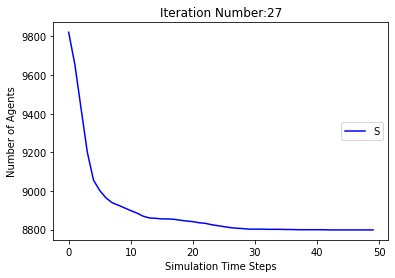

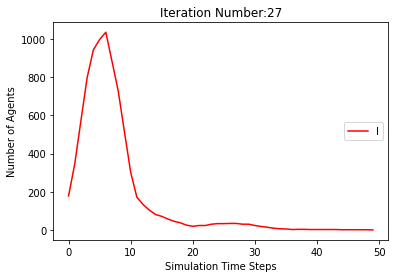

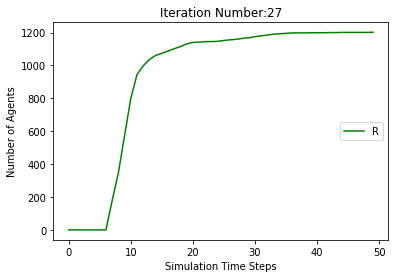

[9822, 9663, 9445, 9213, 9052, 8978, 8916, 8861, 8810, 8767, 8745, 8731, 8715, 8703, 8681, 8661, 8648, 8634, 8622, 8616, 8613, 8611, 8607, 8604, 8601, 8597, 8595, 8594, 8592, 8591, 8588, 8587, 8587, 8587, 8587, 8587, 8587, 8587, 8587]
[178, 337, 555, 787, 948, 1022, 1084, 961, 853, 678, 468, 321, 263, 213, 180, 149, 119, 111, 109, 99, 90, 70, 54, 44, 33, 25, 21, 19, 19, 16, 16, 14, 10, 8, 7, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 337, 555, 787, 948, 1022, 1084, 1139, 1190, 1233, 1255, 1269, 1285, 1297, 1319, 1339, 1352, 1366, 1378, 1384, 1387, 1389, 1393, 1396, 1399, 1403, 1405, 1406, 1408, 1409, 1412, 1413]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592

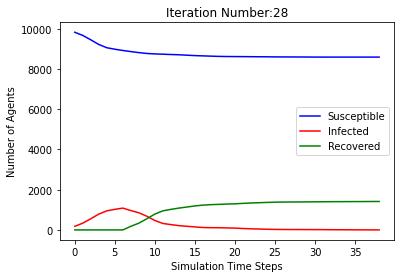

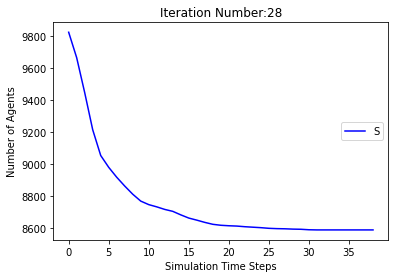

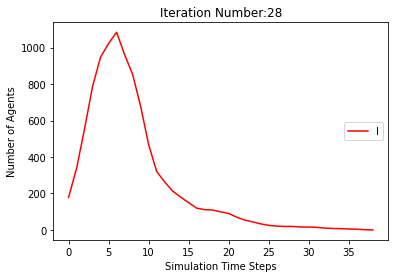

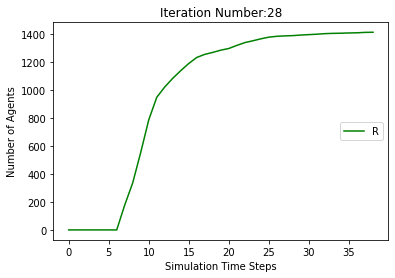

[9822, 9653, 9418, 9208, 9040, 8932, 8866, 8797, 8749, 8709, 8676, 8644, 8611, 8585, 8552, 8521, 8500, 8489, 8482, 8477, 8476, 8476, 8476, 8476, 8476, 8476, 8476, 8476]
[178, 347, 582, 792, 960, 1068, 1134, 1025, 904, 709, 532, 396, 321, 281, 245, 228, 209, 187, 162, 134, 109, 76, 45, 24, 13, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 347, 582, 792, 960, 1068, 1134, 1203, 1251, 1291, 1324, 1356, 1389, 1415, 1448, 1479, 1500, 1511, 1518, 1523, 1524]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820

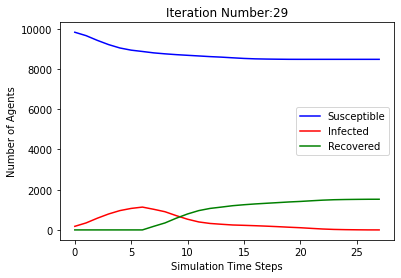

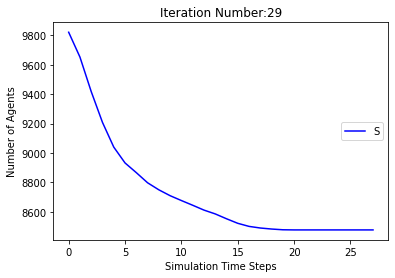

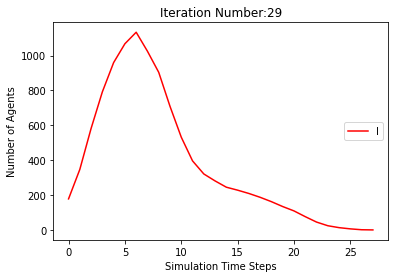

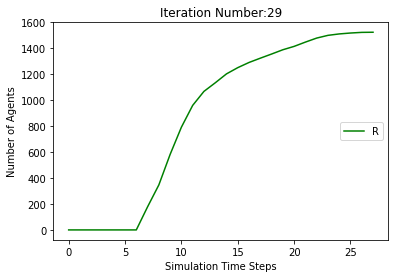

[9822, 9661, 9422, 9207, 9079, 9006, 8975, 8964, 8956, 8944, 8927, 8903, 8874, 8858, 8848, 8839, 8833, 8830, 8827, 8825, 8823, 8823, 8822, 8821, 8819, 8818, 8818, 8817, 8816, 8816, 8816, 8816, 8815, 8815, 8815, 8815, 8815, 8815, 8815, 8815]
[178, 339, 578, 793, 921, 994, 1025, 858, 705, 478, 280, 176, 132, 117, 116, 117, 111, 97, 76, 49, 35, 25, 17, 12, 11, 9, 7, 6, 7, 6, 5, 3, 3, 3, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 339, 578, 793, 921, 994, 1025, 1036, 1044, 1056, 1073, 1097, 1126, 1142, 1152, 1161, 1167, 1170, 1173, 1175, 1177, 1177, 1178, 1179, 1181, 1182, 1182, 1183, 1184, 1184, 1184, 1184, 1185]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8

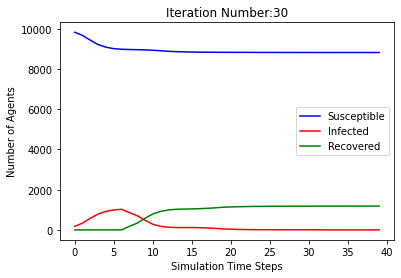

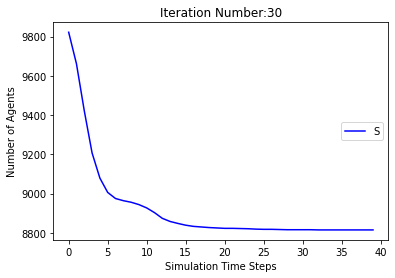

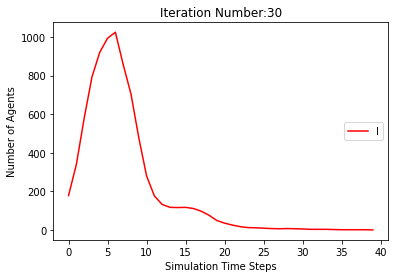

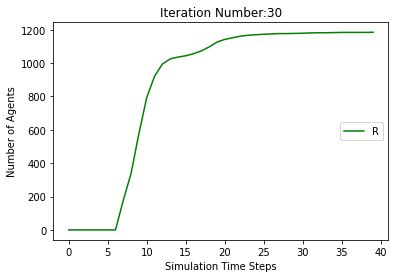

[9822, 9629, 9367, 9156, 9023, 8975, 8960, 8956, 8954, 8949, 8936, 8928, 8922, 8919, 8917, 8914, 8914, 8914, 8914, 8914, 8914, 8914, 8914]
[178, 371, 633, 844, 977, 1025, 1040, 866, 675, 418, 220, 95, 53, 41, 39, 40, 35, 22, 14, 8, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 371, 633, 844, 977, 1025, 1040, 1044, 1046, 1051, 1064, 1072, 1078, 1081, 1083, 1086]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 

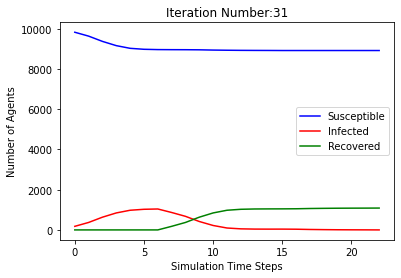

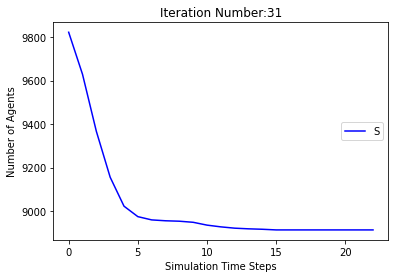

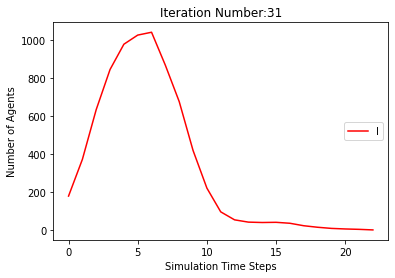

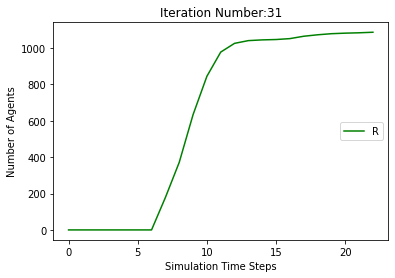

[9822, 9652, 9423, 9200, 9065, 8992, 8965, 8952, 8949, 8943, 8935, 8929, 8921, 8917, 8906, 8901, 8894, 8888, 8883, 8882, 8878, 8876, 8873, 8870, 8868, 8865, 8862, 8859, 8850, 8845, 8839, 8832, 8827, 8826, 8824, 8824, 8824, 8824, 8824, 8824, 8824, 8824]
[178, 348, 577, 800, 935, 1008, 1035, 870, 703, 480, 265, 136, 71, 48, 46, 48, 49, 47, 46, 39, 39, 30, 28, 24, 20, 18, 20, 19, 26, 28, 31, 36, 38, 36, 35, 26, 21, 15, 8, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 577, 800, 935, 1008, 1035, 1048, 1051, 1057, 1065, 1071, 1079, 1083, 1094, 1099, 1106, 1112, 1117, 1118, 1122, 1124, 1127, 1130, 1132, 1135, 1138, 1141, 1150, 1155, 1161, 1168, 1173, 1174, 1176]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 872

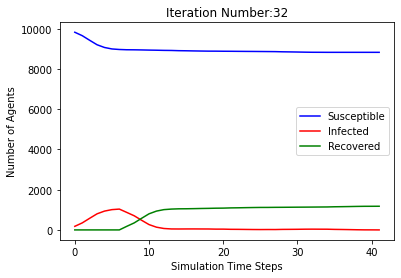

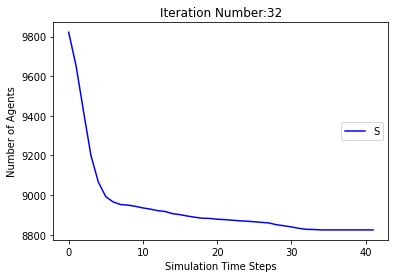

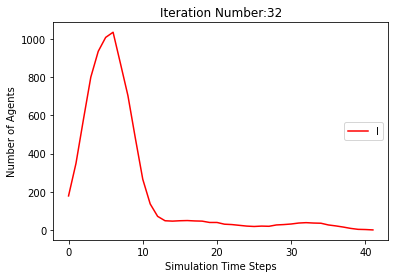

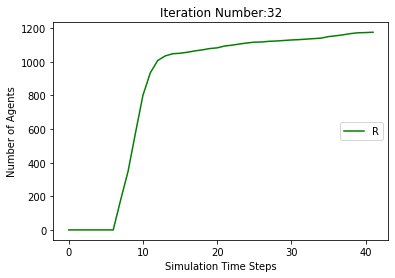

[9822, 9659, 9442, 9235, 9084, 9010, 8975, 8955, 8951, 8950, 8949, 8948, 8947, 8946, 8946, 8944, 8944, 8943, 8942, 8942, 8942, 8942, 8942, 8942, 8942, 8942]
[178, 341, 558, 765, 916, 990, 1025, 867, 708, 492, 286, 136, 63, 29, 9, 7, 6, 6, 6, 5, 4, 4, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 341, 558, 765, 916, 990, 1025, 1045, 1049, 1050, 1051, 1052, 1053, 1054, 1054, 1056, 1056, 1057, 1058]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 874

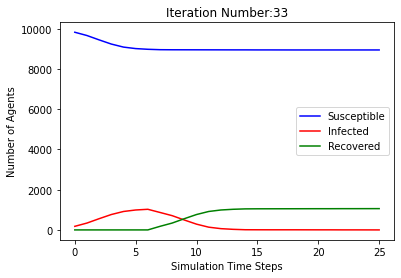

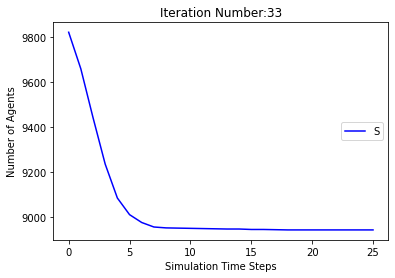

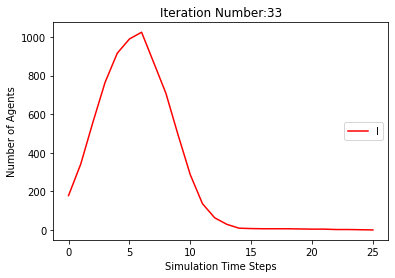

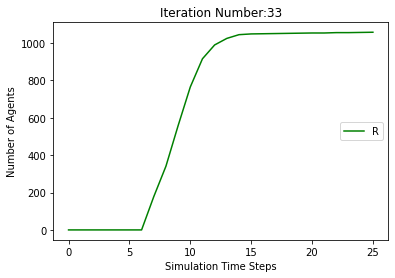

[9822, 9633, 9402, 9184, 9070, 8999, 8959, 8942, 8934, 8929, 8927, 8924, 8921, 8918, 8914, 8914, 8913, 8913, 8913, 8913, 8913, 8913, 8913, 8913]
[178, 367, 598, 816, 930, 1001, 1041, 880, 699, 473, 257, 146, 78, 41, 28, 20, 16, 14, 11, 8, 5, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 367, 598, 816, 930, 1001, 1041, 1058, 1066, 1071, 1073, 1076, 1079, 1082, 1086, 1086, 1087]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 87

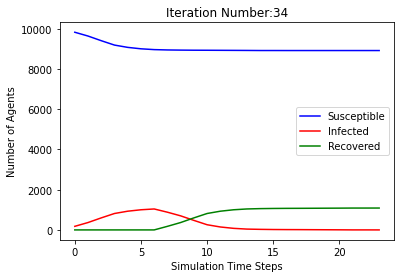

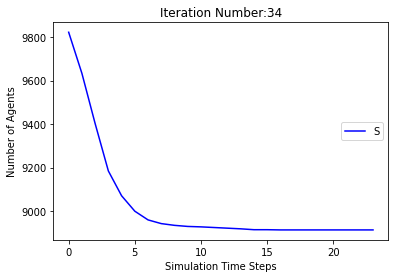

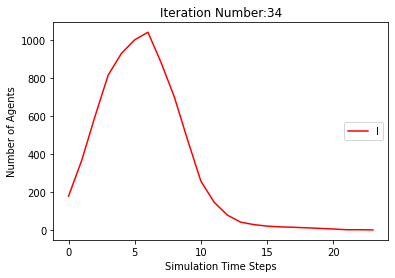

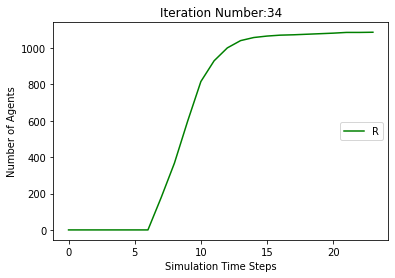

[9822, 9659, 9430, 9211, 9037, 8934, 8875, 8838, 8799, 8768, 8737, 8710, 8681, 8651, 8617, 8592, 8578, 8559, 8546, 8536, 8524, 8510, 8502, 8500, 8496, 8491, 8486, 8482, 8480, 8474, 8468, 8463, 8463, 8463, 8463, 8462, 8458, 8457, 8456, 8454, 8451, 8446, 8445, 8445, 8444, 8442, 8440, 8440, 8440, 8439, 8439, 8439, 8439, 8439, 8439, 8439, 8439]
[178, 341, 570, 789, 963, 1066, 1125, 984, 860, 662, 474, 327, 253, 224, 221, 207, 190, 178, 164, 145, 127, 107, 90, 78, 63, 55, 50, 42, 30, 28, 32, 33, 28, 23, 19, 18, 16, 11, 7, 9, 12, 17, 17, 13, 13, 14, 14, 11, 6, 6, 6, 5, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 341, 570, 789, 963, 1066, 1125, 1162, 1201, 1232, 1263, 1290, 1319, 1349, 1383, 1408, 1422, 1441, 1454, 1464, 1476, 1490, 1498, 1500, 1504, 1509, 1514, 1518, 1520, 1526, 1532, 1537, 1537, 1537, 1537, 1538, 1542, 1543, 1544, 1546, 1549, 1554, 1555, 1555, 1556, 1558, 1560, 1560, 1560, 1561]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 88

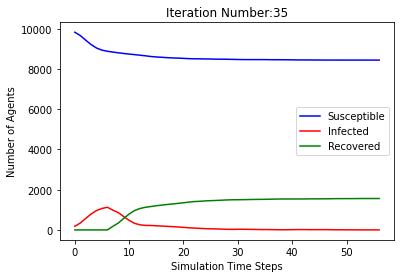

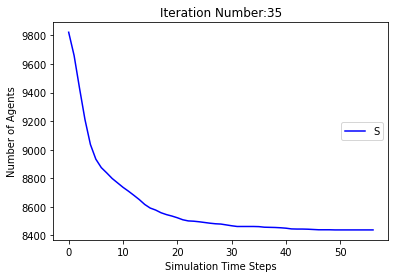

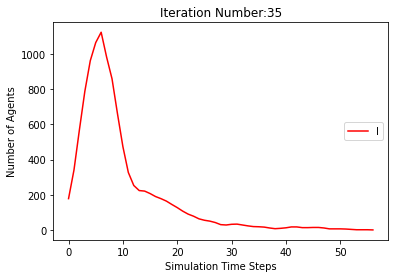

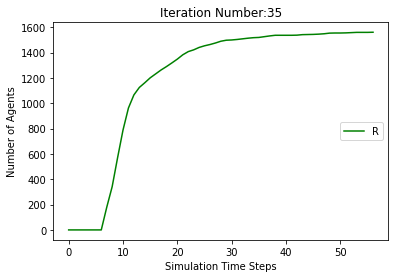

[9822, 9652, 9426, 9227, 9084, 9006, 8979, 8966, 8957, 8953, 8949, 8946, 8943, 8941, 8939, 8936, 8936, 8935, 8935, 8935, 8935, 8935, 8935, 8935, 8935]
[178, 348, 574, 773, 916, 994, 1021, 856, 695, 473, 278, 138, 63, 38, 27, 21, 17, 14, 11, 8, 6, 4, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 574, 773, 916, 994, 1021, 1034, 1043, 1047, 1051, 1054, 1057, 1059, 1061, 1064, 1064, 1065]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8

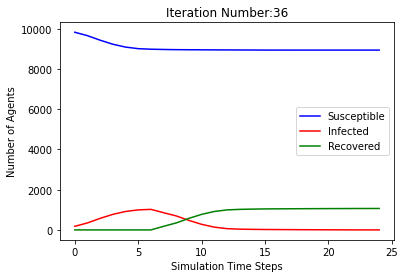

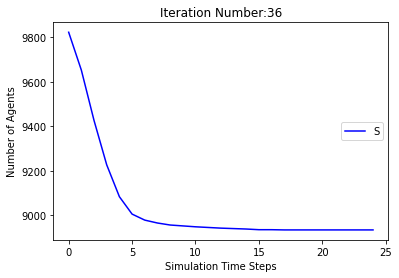

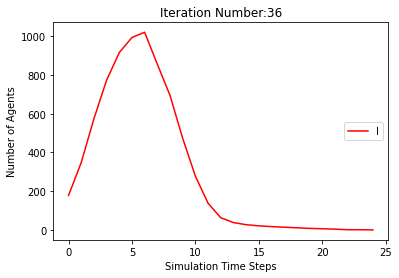

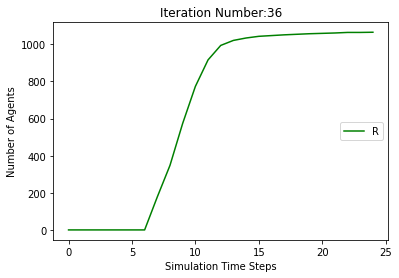

[9822, 9649, 9435, 9230, 9078, 8984, 8944, 8936, 8933, 8932, 8929, 8923, 8917, 8911, 8907, 8901, 8897, 8895, 8892, 8891, 8889, 8889, 8888, 8883, 8882, 8882, 8882, 8882, 8882, 8882, 8882, 8882]
[178, 351, 565, 770, 922, 1016, 1056, 886, 716, 503, 301, 155, 67, 33, 29, 32, 35, 34, 31, 26, 22, 18, 13, 14, 13, 10, 9, 7, 7, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 351, 565, 770, 922, 1016, 1056, 1064, 1067, 1068, 1071, 1077, 1083, 1089, 1093, 1099, 1103, 1105, 1108, 1109, 1111, 1111, 1112, 1117, 1118]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8

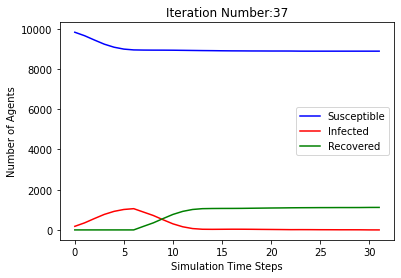

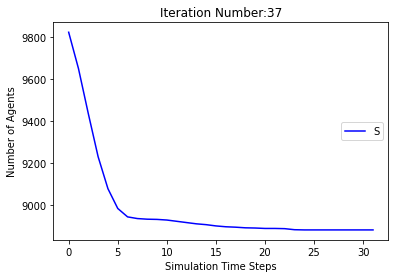

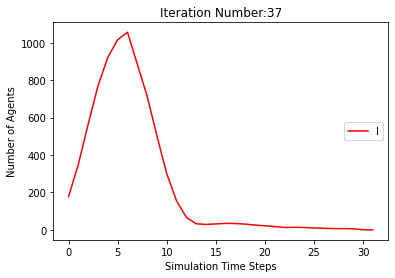

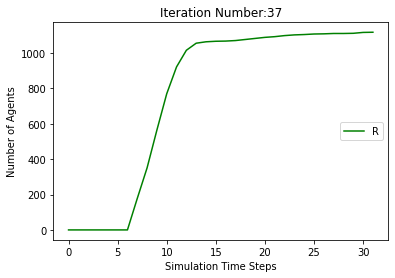

[9822, 9642, 9401, 9186, 9055, 8997, 8972, 8956, 8945, 8937, 8924, 8910, 8899, 8885, 8877, 8874, 8873, 8873, 8873, 8873, 8873, 8873, 8873, 8873]
[178, 358, 599, 814, 945, 1003, 1028, 866, 697, 464, 262, 145, 98, 87, 79, 71, 64, 51, 37, 26, 12, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 358, 599, 814, 945, 1003, 1028, 1044, 1055, 1063, 1076, 1090, 1101, 1115, 1123, 1126, 1127]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 

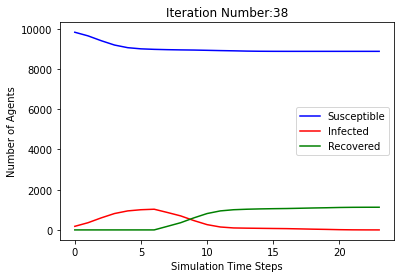

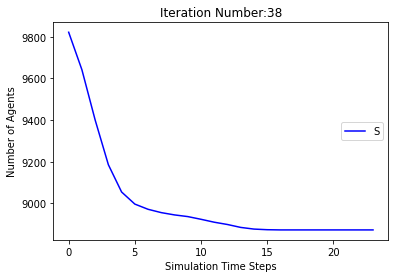

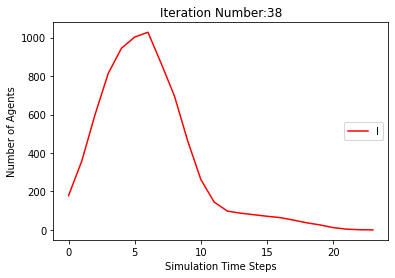

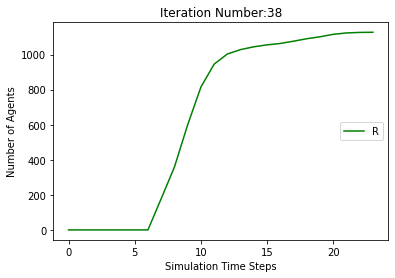

[9822, 9657, 9423, 9186, 9043, 8929, 8885, 8842, 8814, 8789, 8766, 8756, 8743, 8734, 8728, 8725, 8723, 8722, 8722, 8722, 8722, 8722, 8722, 8722, 8722]
[178, 343, 577, 814, 957, 1071, 1115, 980, 843, 634, 420, 287, 186, 151, 114, 89, 66, 44, 34, 21, 12, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 343, 577, 814, 957, 1071, 1115, 1158, 1186, 1211, 1234, 1244, 1257, 1266, 1272, 1275, 1277, 1278]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 

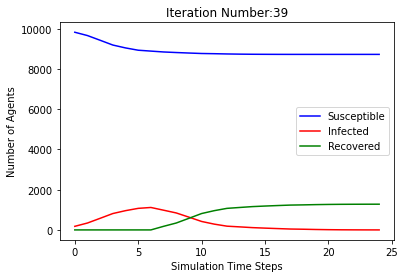

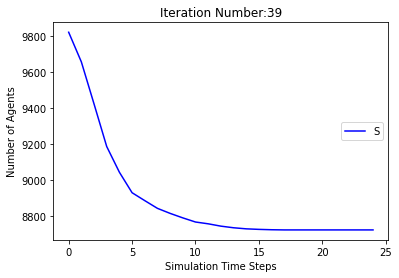

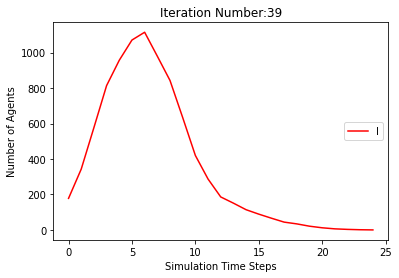

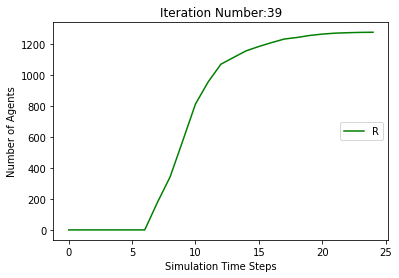

[9822, 9654, 9412, 9207, 9077, 9002, 8970, 8946, 8938, 8929, 8921, 8916, 8912, 8911, 8910, 8909, 8908, 8908, 8907, 8907, 8905, 8905, 8904, 8904, 8904, 8904, 8904, 8904, 8904, 8904]
[178, 346, 588, 793, 923, 998, 1030, 876, 716, 483, 286, 161, 90, 59, 36, 29, 21, 13, 9, 5, 6, 5, 5, 4, 4, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 346, 588, 793, 923, 998, 1030, 1054, 1062, 1071, 1079, 1084, 1088, 1089, 1090, 1091, 1092, 1092, 1093, 1093, 1095, 1095, 1096]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845,

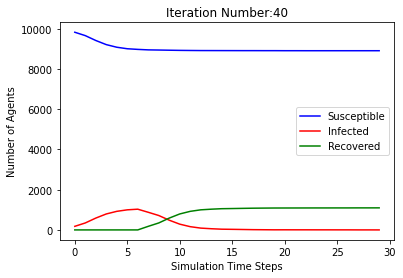

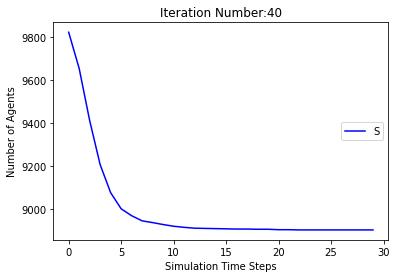

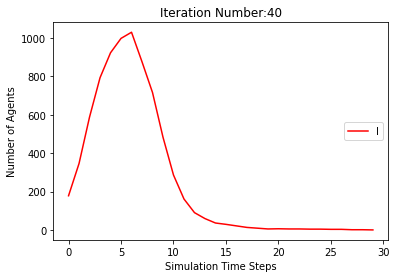

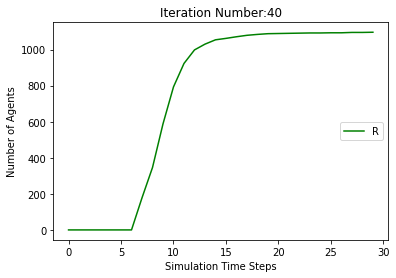

[9822, 9639, 9418, 9199, 9050, 8982, 8949, 8936, 8932, 8921, 8904, 8883, 8868, 8861, 8858, 8855, 8848, 8841, 8839, 8836, 8835, 8835, 8834, 8834, 8833, 8833, 8833, 8833, 8833, 8833, 8833, 8833]
[178, 361, 582, 801, 950, 1018, 1051, 886, 707, 497, 295, 167, 114, 88, 78, 77, 73, 63, 44, 32, 26, 23, 21, 14, 8, 6, 3, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 361, 582, 801, 950, 1018, 1051, 1064, 1068, 1079, 1096, 1117, 1132, 1139, 1142, 1145, 1152, 1159, 1161, 1164, 1165, 1165, 1166, 1166, 1167]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 89

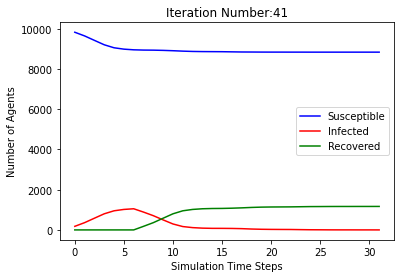

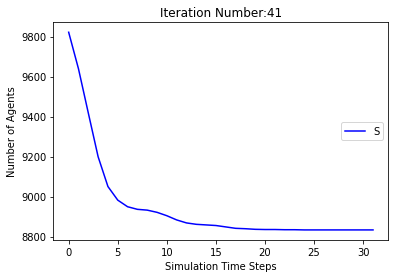

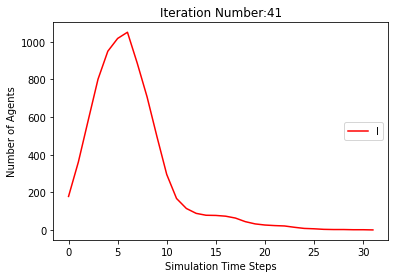

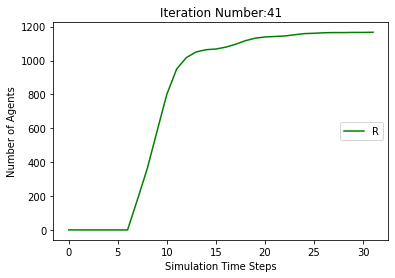

[9822, 9653, 9412, 9189, 9065, 8996, 8964, 8952, 8949, 8948, 8944, 8932, 8920, 8912, 8910, 8907, 8903, 8901, 8898, 8896, 8895, 8894, 8892, 8883, 8878, 8872, 8870, 8869, 8868, 8868, 8868, 8868, 8868, 8868, 8868, 8868]
[178, 347, 588, 811, 935, 1004, 1036, 870, 704, 464, 245, 133, 76, 52, 42, 42, 45, 43, 34, 24, 17, 16, 15, 20, 23, 26, 26, 26, 26, 24, 15, 10, 4, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 347, 588, 811, 935, 1004, 1036, 1048, 1051, 1052, 1056, 1068, 1080, 1088, 1090, 1093, 1097, 1099, 1102, 1104, 1105, 1106, 1108, 1117, 1122, 1128, 1130, 1131, 1132]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 857

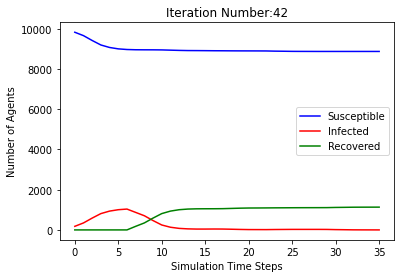

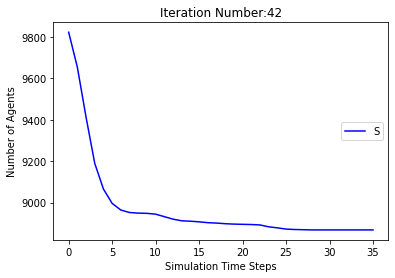

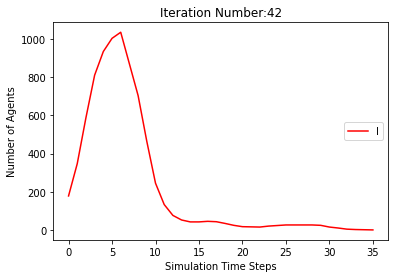

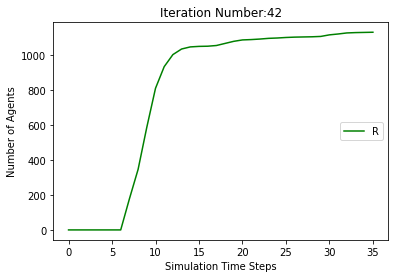

[9822, 9650, 9410, 9218, 9079, 8998, 8959, 8941, 8936, 8929, 8922, 8913, 8902, 8893, 8883, 8875, 8865, 8860, 8859, 8858, 8858, 8858, 8858, 8858, 8858, 8858, 8858]
[178, 350, 590, 782, 921, 1002, 1041, 881, 714, 481, 296, 166, 96, 66, 58, 61, 64, 62, 54, 44, 35, 25, 17, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 350, 590, 782, 921, 1002, 1041, 1059, 1064, 1071, 1078, 1087, 1098, 1107, 1117, 1125, 1135, 1140, 1141, 1142]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8

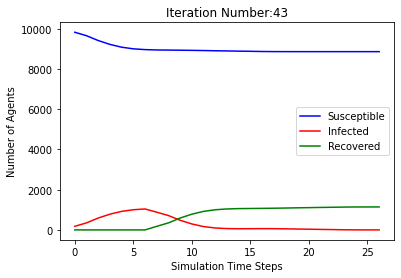

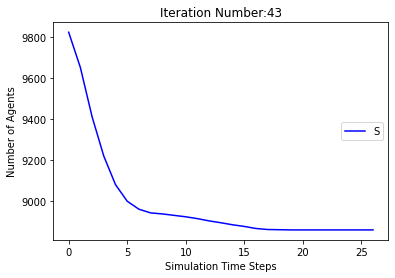

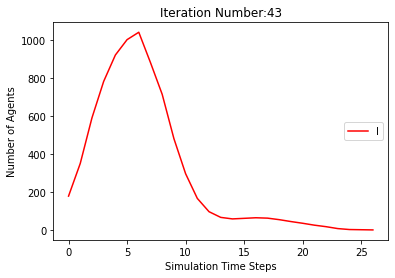

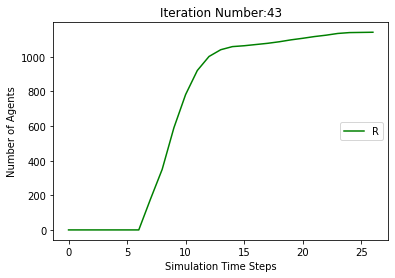

[9822, 9658, 9417, 9182, 9052, 8984, 8947, 8931, 8926, 8920, 8918, 8916, 8913, 8910, 8909, 8908, 8906, 8901, 8899, 8898, 8896, 8893, 8893, 8893, 8893, 8893, 8893, 8893, 8893]
[178, 342, 583, 818, 948, 1016, 1053, 891, 732, 497, 264, 136, 71, 37, 22, 18, 14, 17, 17, 15, 14, 16, 15, 13, 8, 6, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 342, 583, 818, 948, 1016, 1053, 1069, 1074, 1080, 1082, 1084, 1087, 1090, 1091, 1092, 1094, 1099, 1101, 1102, 1104, 1107]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 

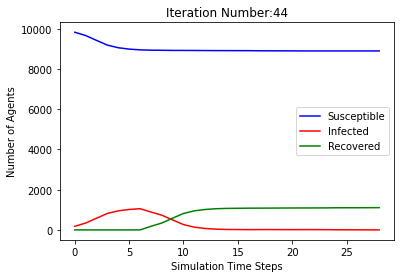

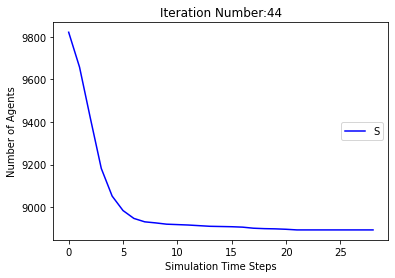

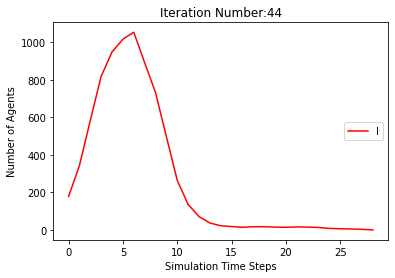

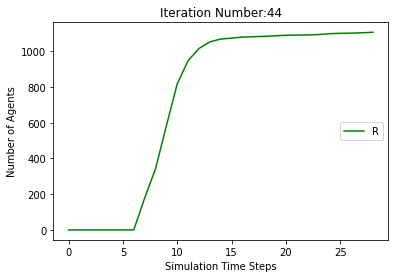

[9822, 9631, 9409, 9185, 9052, 8992, 8959, 8945, 8941, 8940, 8937, 8936, 8930, 8923, 8919, 8913, 8913, 8913, 8913, 8913, 8913, 8913, 8913]
[178, 369, 591, 815, 948, 1008, 1041, 877, 690, 469, 248, 116, 62, 36, 26, 28, 27, 24, 23, 17, 10, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 369, 591, 815, 948, 1008, 1041, 1055, 1059, 1060, 1063, 1064, 1070, 1077, 1081, 1087]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 872

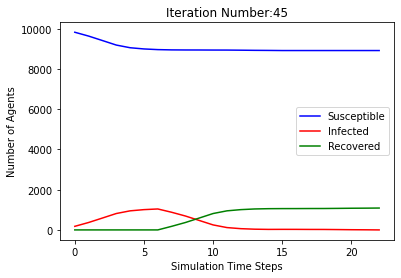

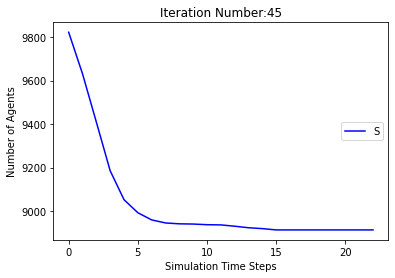

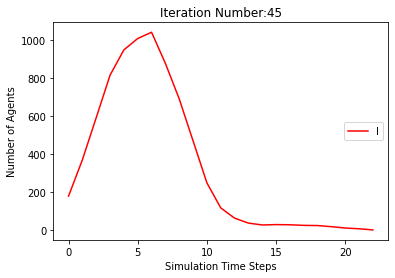

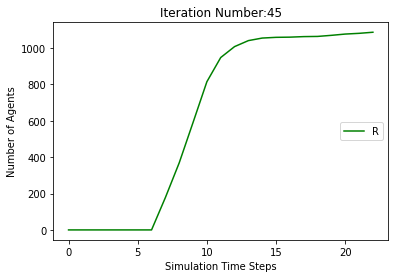

[9822, 9665, 9433, 9215, 9050, 8984, 8954, 8952, 8951, 8948, 8940, 8933, 8932, 8926, 8924, 8920, 8919, 8918, 8916, 8914, 8912, 8909, 8906, 8903, 8902, 8901, 8901, 8901, 8901, 8901, 8901, 8901, 8901]
[178, 335, 567, 785, 950, 1016, 1046, 870, 714, 485, 275, 117, 52, 28, 28, 31, 29, 22, 17, 18, 14, 15, 14, 16, 16, 15, 13, 11, 8, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 335, 567, 785, 950, 1016, 1046, 1048, 1049, 1052, 1060, 1067, 1068, 1074, 1076, 1080, 1081, 1082, 1084, 1086, 1088, 1091, 1094, 1097, 1098, 1099]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 89

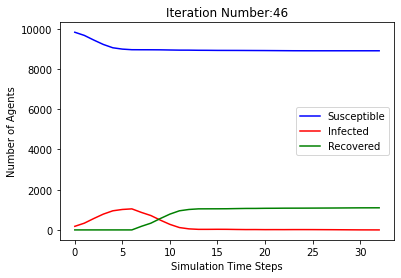

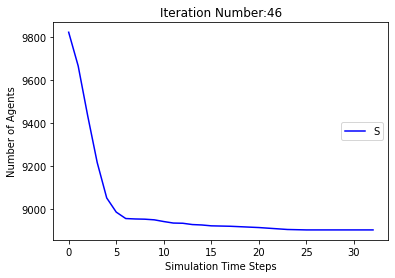

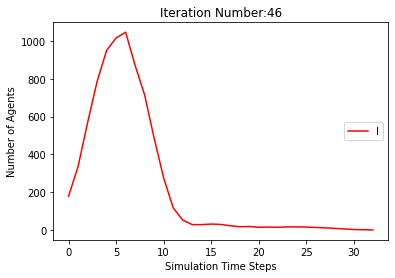

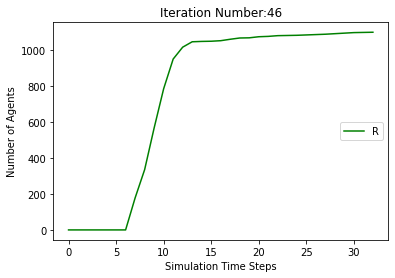

[9822, 9628, 9389, 9180, 9059, 8994, 8952, 8929, 8919, 8915, 8914, 8913, 8909, 8904, 8901, 8901, 8901, 8901, 8901, 8901, 8901, 8901]
[178, 372, 611, 820, 941, 1006, 1048, 893, 709, 474, 266, 146, 85, 48, 28, 18, 14, 13, 12, 8, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 372, 611, 820, 941, 1006, 1048, 1071, 1081, 1085, 1086, 1087, 1091, 1096, 1099]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 87

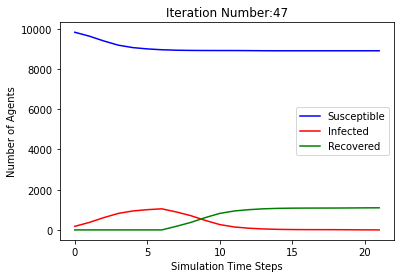

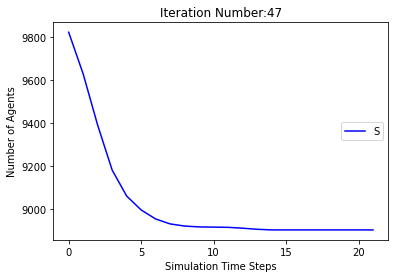

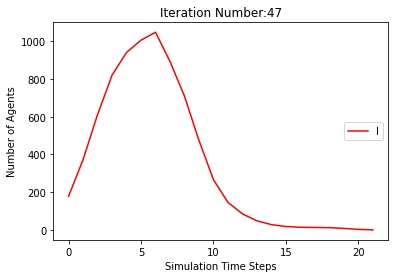

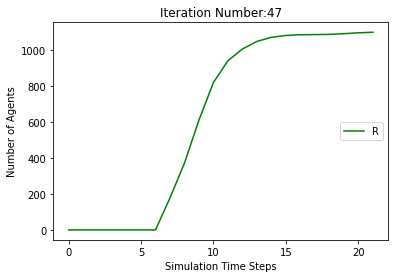

[9822, 9663, 9423, 9197, 9057, 8967, 8908, 8865, 8834, 8813, 8786, 8764, 8750, 8726, 8700, 8677, 8666, 8655, 8644, 8631, 8623, 8612, 8605, 8600, 8597, 8594, 8591, 8591, 8591, 8591, 8591, 8591, 8591, 8591]
[178, 337, 577, 803, 943, 1033, 1092, 957, 829, 610, 411, 293, 217, 182, 165, 157, 147, 131, 120, 119, 103, 88, 72, 66, 58, 50, 40, 32, 21, 14, 9, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 337, 577, 803, 943, 1033, 1092, 1135, 1166, 1187, 1214, 1236, 1250, 1274, 1300, 1323, 1334, 1345, 1356, 1369, 1377, 1388, 1395, 1400, 1403, 1406, 1409]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 

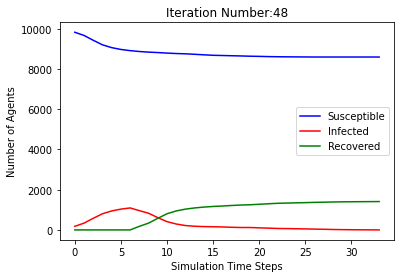

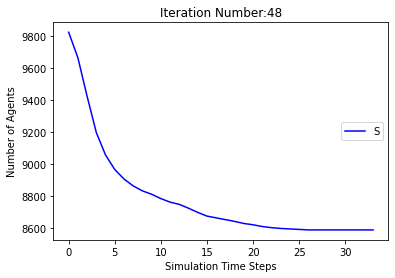

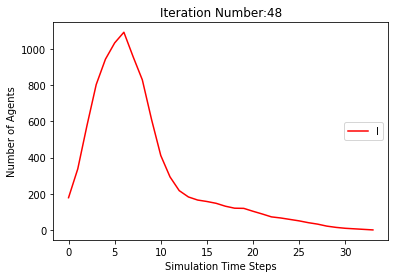

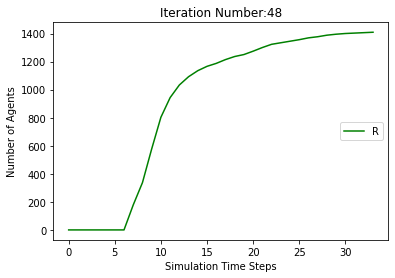

[9822, 9652, 9421, 9204, 9057, 8987, 8964, 8952, 8947, 8946, 8943, 8940, 8937, 8935, 8934, 8934, 8934, 8934, 8934, 8934, 8934, 8934]
[178, 348, 579, 796, 943, 1013, 1036, 870, 705, 475, 261, 117, 50, 29, 18, 13, 12, 9, 6, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 579, 796, 943, 1013, 1036, 1048, 1053, 1054, 1057, 1060, 1063, 1065, 1066]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725

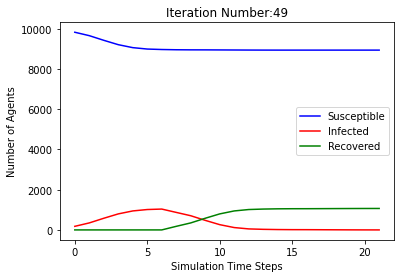

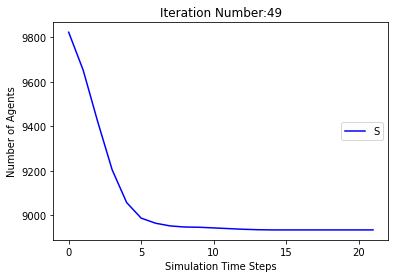

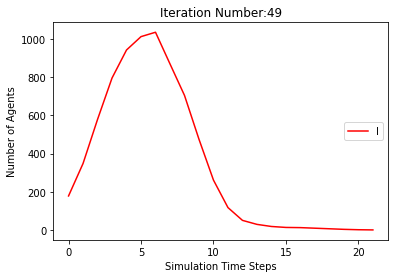

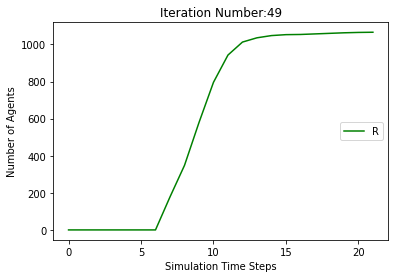

[9822, 9637, 9401, 9187, 9057, 8991, 8966, 8959, 8956, 8953, 8947, 8939, 8931, 8925, 8921, 8917, 8913, 8911, 8911, 8911, 8911, 8911, 8911, 8911, 8911]
[178, 363, 599, 813, 943, 1009, 1034, 863, 681, 448, 240, 118, 60, 41, 38, 39, 40, 36, 28, 20, 14, 10, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 363, 599, 813, 943, 1009, 1034, 1041, 1044, 1047, 1053, 1061, 1069, 1075, 1079, 1083, 1087, 1089]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 87

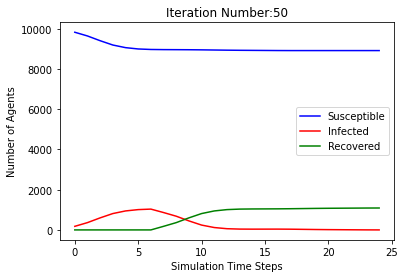

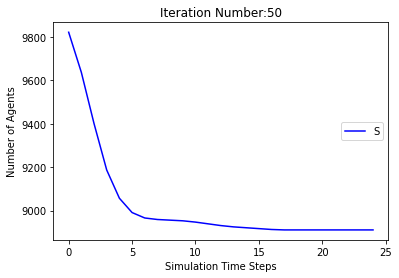

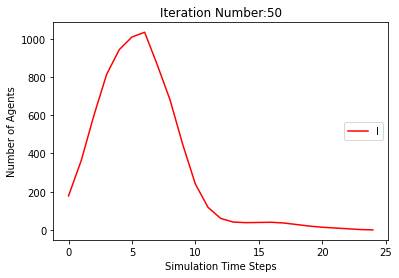

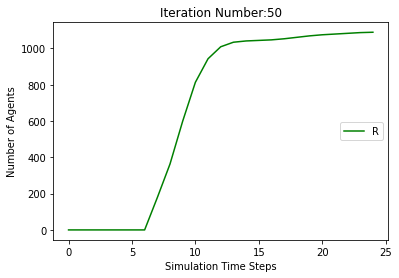

[9822, 9642, 9410, 9201, 9064, 8986, 8953, 8938, 8934, 8931, 8926, 8920, 8918, 8918, 8918, 8918, 8918, 8918, 8918, 8918]
[178, 358, 590, 799, 936, 1014, 1047, 884, 708, 479, 275, 144, 68, 35, 20, 16, 13, 8, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 358, 590, 799, 936, 1014, 1047, 1062, 1066, 1069, 1074, 1080, 1082]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695

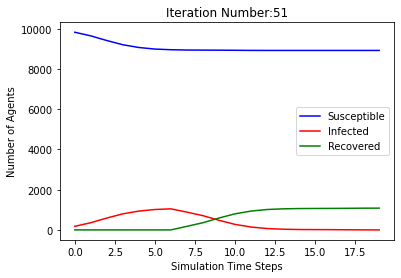

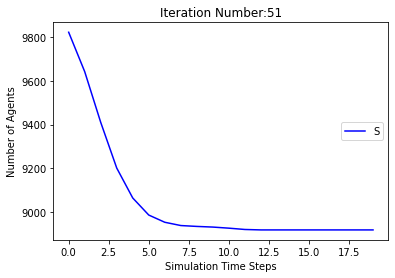

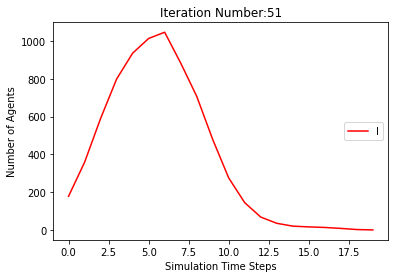

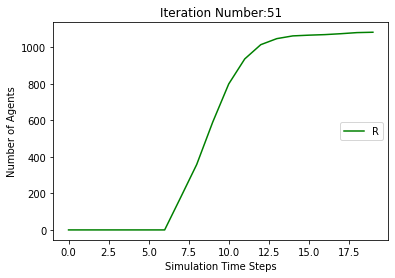

[9822, 9636, 9418, 9206, 9071, 8998, 8956, 8939, 8927, 8911, 8906, 8902, 8895, 8887, 8877, 8869, 8863, 8860, 8855, 8851, 8844, 8839, 8834, 8833, 8832, 8832, 8831, 8827, 8823, 8822, 8821, 8820, 8820, 8820, 8817, 8816, 8816, 8816, 8816, 8816, 8816, 8816, 8816]
[178, 364, 582, 794, 929, 1002, 1044, 883, 709, 507, 300, 169, 103, 69, 62, 58, 48, 46, 47, 44, 43, 38, 35, 30, 28, 23, 20, 17, 16, 12, 12, 12, 12, 11, 10, 7, 6, 5, 4, 4, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 364, 582, 794, 929, 1002, 1044, 1061, 1073, 1089, 1094, 1098, 1105, 1113, 1123, 1131, 1137, 1140, 1145, 1149, 1156, 1161, 1166, 1167, 1168, 1168, 1169, 1173, 1177, 1178, 1179, 1180, 1180, 1180, 1183, 1184]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 87

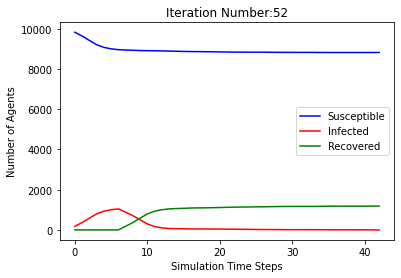

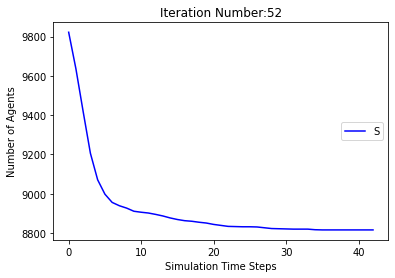

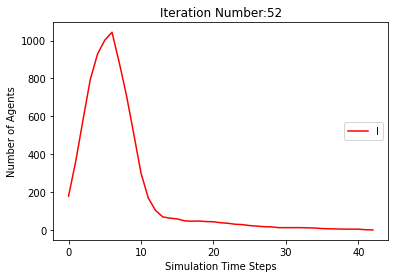

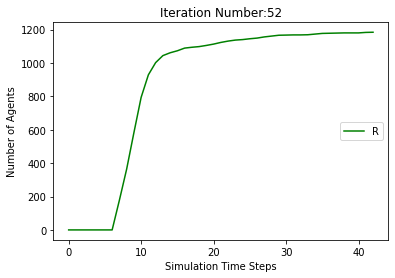

[9822, 9643, 9397, 9168, 9008, 8908, 8877, 8861, 8852, 8844, 8827, 8805, 8791, 8778, 8763, 8753, 8741, 8732, 8727, 8721, 8717, 8715, 8715, 8715, 8715, 8715, 8715, 8715, 8715]
[178, 357, 603, 832, 992, 1092, 1123, 961, 791, 553, 341, 203, 117, 99, 98, 99, 103, 95, 78, 70, 61, 48, 38, 26, 17, 12, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 357, 603, 832, 992, 1092, 1123, 1139, 1148, 1156, 1173, 1195, 1209, 1222, 1237, 1247, 1259, 1268, 1273, 1279, 1283, 1285]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 88

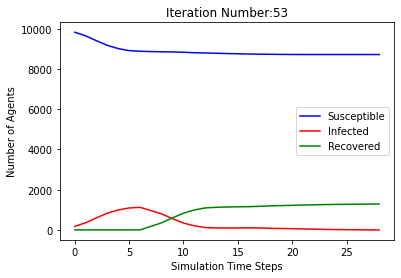

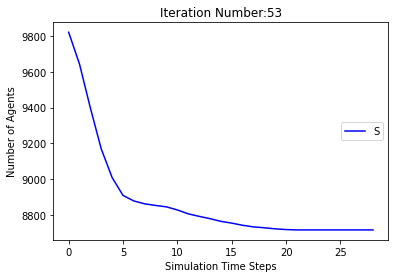

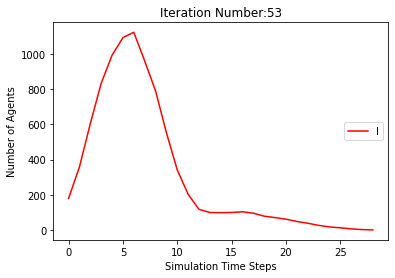

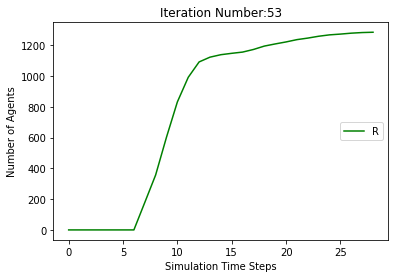

[9822, 9647, 9412, 9198, 9055, 8980, 8949, 8937, 8932, 8927, 8916, 8904, 8887, 8871, 8862, 8857, 8854, 8845, 8840, 8838, 8837, 8837, 8837, 8837, 8837, 8837, 8837, 8837]
[178, 353, 588, 802, 945, 1020, 1051, 885, 715, 485, 282, 151, 93, 78, 75, 75, 73, 71, 64, 49, 34, 25, 20, 17, 8, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 353, 588, 802, 945, 1020, 1051, 1063, 1068, 1073, 1084, 1096, 1113, 1129, 1138, 1143, 1146, 1155, 1160, 1162, 1163]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 879

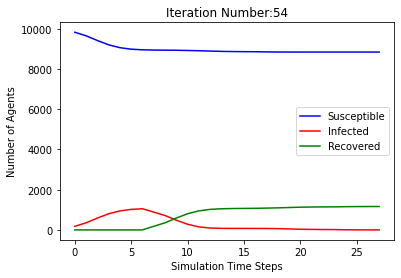

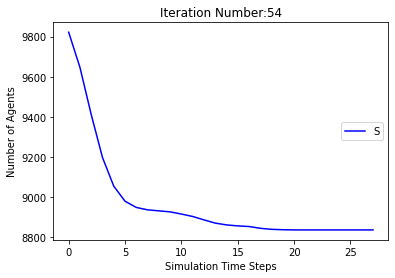

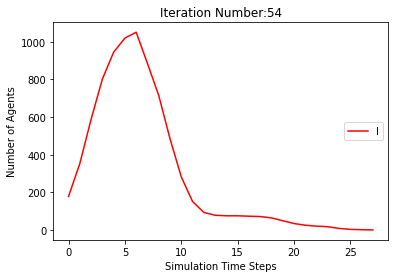

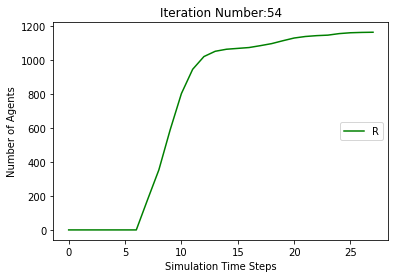

[9822, 9652, 9422, 9206, 9083, 9009, 8975, 8958, 8953, 8950, 8945, 8942, 8938, 8934, 8927, 8923, 8917, 8913, 8912, 8912, 8912, 8912, 8912, 8912, 8912, 8912]
[178, 348, 578, 794, 917, 991, 1025, 864, 699, 472, 261, 141, 71, 41, 31, 30, 33, 32, 30, 26, 22, 15, 11, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 578, 794, 917, 991, 1025, 1042, 1047, 1050, 1055, 1058, 1062, 1066, 1073, 1077, 1083, 1087, 1088]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 

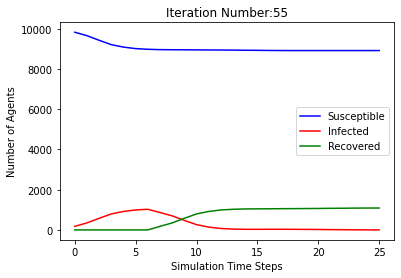

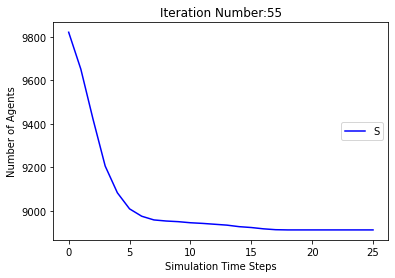

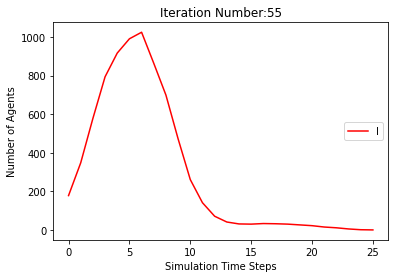

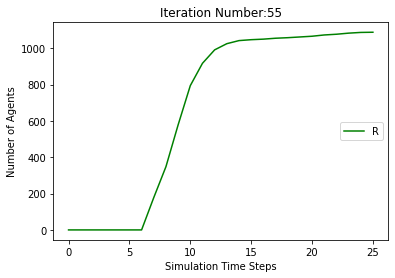

[9822, 9646, 9403, 9194, 9061, 8990, 8953, 8943, 8938, 8936, 8933, 8932, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[178, 354, 597, 806, 939, 1010, 1047, 879, 708, 467, 261, 129, 61, 24, 14, 9, 7, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 354, 597, 806, 939, 1010, 1047, 1057, 1062, 1064, 1067, 1068, 1071]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 

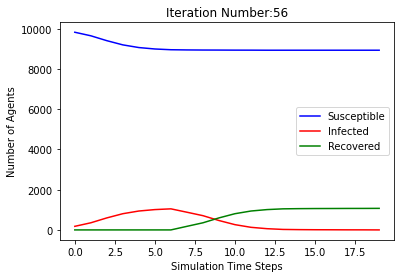

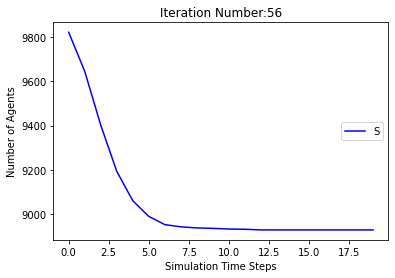

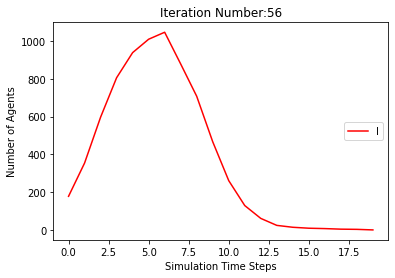

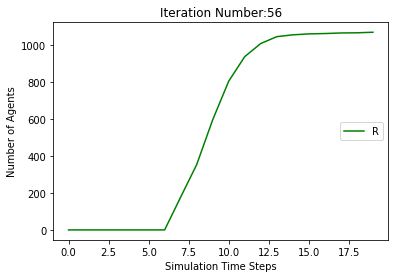

[9822, 9638, 9385, 9175, 9052, 8993, 8967, 8955, 8950, 8944, 8938, 8931, 8925, 8923, 8922, 8918, 8915, 8912, 8909, 8905, 8903, 8903, 8901, 8898, 8897, 8897, 8897, 8897, 8897, 8897, 8897, 8897]
[178, 362, 615, 825, 948, 1007, 1033, 867, 688, 441, 237, 121, 68, 44, 33, 32, 29, 26, 22, 20, 20, 19, 17, 17, 15, 12, 8, 6, 6, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 362, 615, 825, 948, 1007, 1033, 1045, 1050, 1056, 1062, 1069, 1075, 1077, 1078, 1082, 1085, 1088, 1091, 1095, 1097, 1097, 1099, 1102, 1103]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8

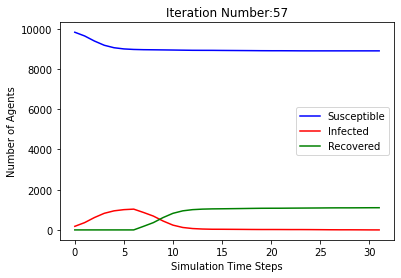

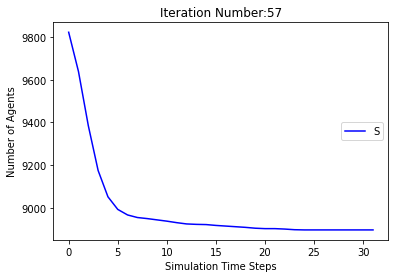

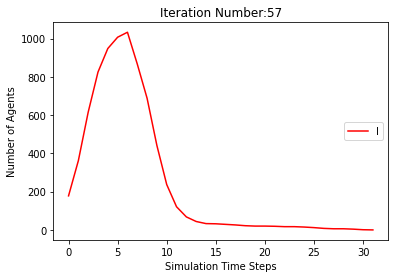

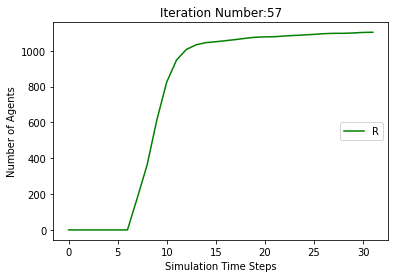

[9822, 9665, 9442, 9225, 9085, 9006, 8964, 8950, 8942, 8933, 8925, 8917, 8904, 8892, 8885, 8877, 8875, 8873, 8871, 8871, 8871, 8871, 8871, 8871, 8871, 8871]
[178, 335, 558, 775, 915, 994, 1036, 872, 723, 509, 300, 168, 102, 72, 65, 65, 58, 52, 46, 33, 21, 14, 6, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 335, 558, 775, 915, 994, 1036, 1050, 1058, 1067, 1075, 1083, 1096, 1108, 1115, 1123, 1125, 1127, 1129]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 

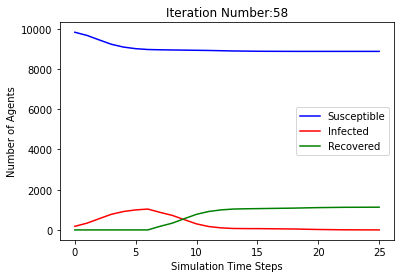

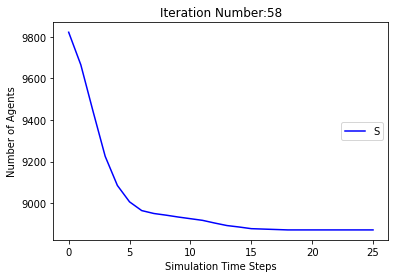

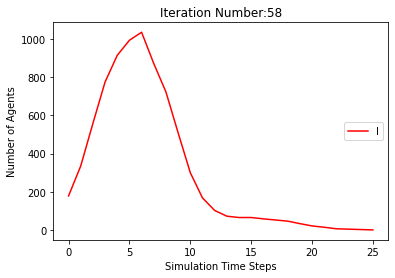

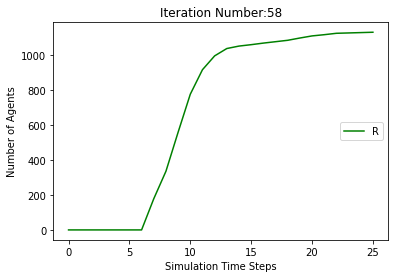

[9822, 9642, 9413, 9179, 9051, 8983, 8958, 8949, 8942, 8941, 8939, 8936, 8932, 8929, 8924, 8919, 8917, 8912, 8912, 8912, 8912, 8912, 8912, 8911, 8911, 8911, 8911, 8911, 8911, 8911, 8911]
[178, 358, 587, 821, 949, 1017, 1042, 873, 700, 472, 240, 115, 51, 29, 25, 23, 24, 27, 24, 20, 17, 12, 7, 6, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 358, 587, 821, 949, 1017, 1042, 1051, 1058, 1059, 1061, 1064, 1068, 1071, 1076, 1081, 1083, 1088, 1088, 1088, 1088, 1088, 1088, 1089]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 88

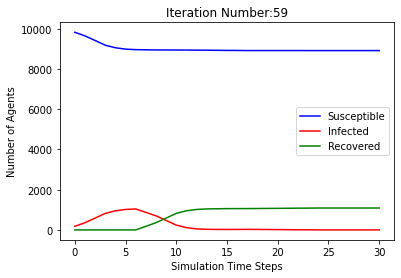

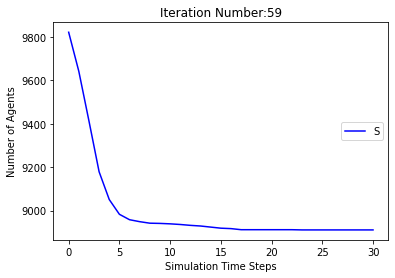

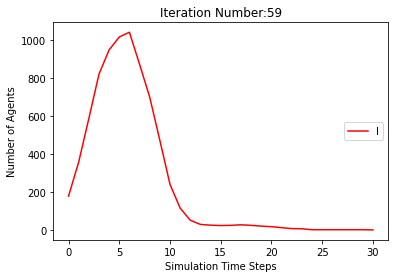

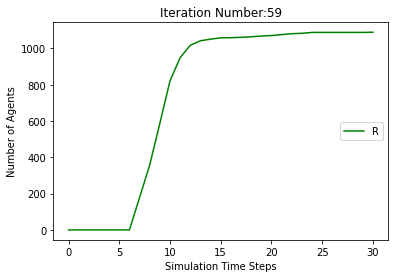

[9822, 9648, 9419, 9206, 9064, 8986, 8962, 8957, 8951, 8943, 8929, 8913, 8902, 8884, 8869, 8857, 8845, 8835, 8830, 8824, 8818, 8816, 8812, 8811, 8810, 8810, 8809, 8808, 8806, 8804, 8804, 8804, 8804, 8804, 8804, 8804, 8804]
[178, 352, 581, 794, 936, 1014, 1038, 865, 697, 476, 277, 151, 84, 78, 88, 94, 98, 94, 83, 78, 66, 53, 45, 34, 25, 20, 15, 10, 10, 8, 7, 6, 6, 5, 4, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 352, 581, 794, 936, 1014, 1038, 1043, 1049, 1057, 1071, 1087, 1098, 1116, 1131, 1143, 1155, 1165, 1170, 1176, 1182, 1184, 1188, 1189, 1190, 1190, 1191, 1192, 1194, 1196]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 857

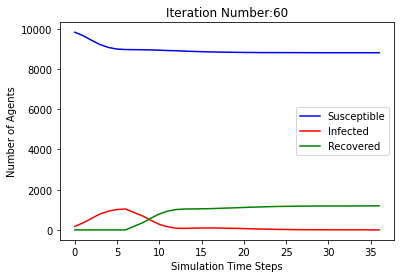

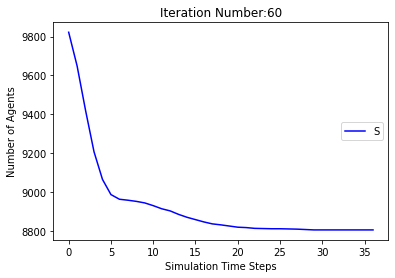

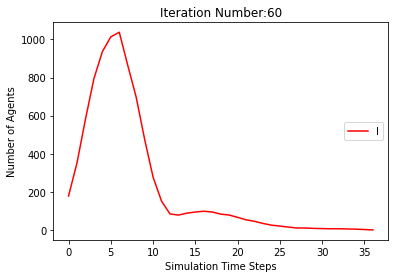

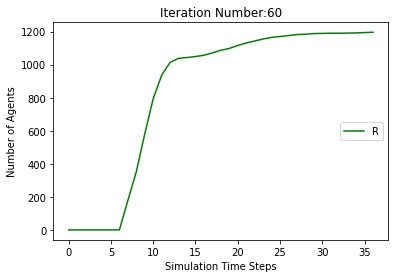

[9822, 9652, 9433, 9227, 9087, 9020, 8975, 8945, 8941, 8937, 8931, 8925, 8918, 8911, 8901, 8895, 8887, 8878, 8867, 8859, 8858, 8856, 8856, 8856, 8854, 8852, 8850, 8847, 8847, 8847, 8847, 8847, 8847, 8847, 8847]
[178, 348, 567, 773, 913, 980, 1025, 877, 711, 496, 296, 162, 102, 64, 44, 46, 50, 53, 58, 59, 53, 45, 39, 31, 24, 15, 9, 11, 9, 9, 9, 7, 5, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 567, 773, 913, 980, 1025, 1055, 1059, 1063, 1069, 1075, 1082, 1089, 1099, 1105, 1113, 1122, 1133, 1141, 1142, 1144, 1144, 1144, 1146, 1148, 1150, 1153]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420

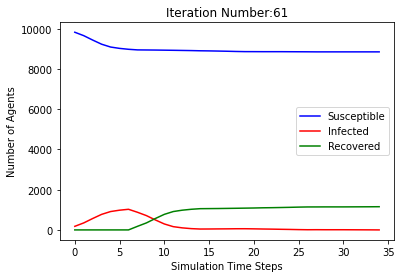

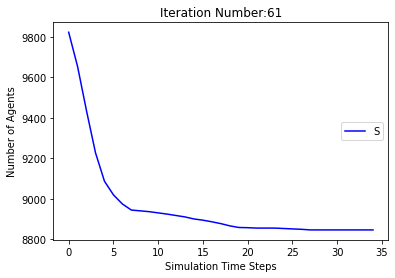

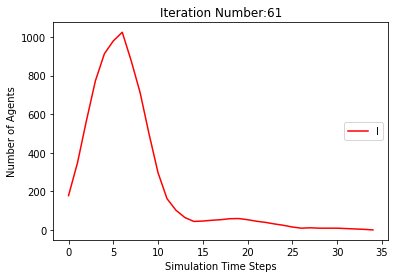

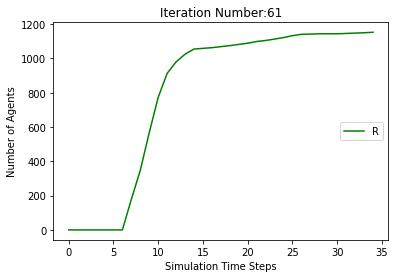

[9822, 9650, 9427, 9203, 9061, 8987, 8959, 8948, 8942, 8931, 8921, 8908, 8895, 8885, 8872, 8858, 8846, 8841, 8837, 8832, 8825, 8816, 8804, 8798, 8794, 8786, 8780, 8773, 8770, 8767, 8760, 8757, 8756, 8756, 8756, 8756, 8756, 8756, 8756, 8756]
[178, 350, 573, 797, 939, 1013, 1041, 874, 708, 496, 282, 153, 92, 74, 76, 84, 85, 80, 71, 63, 60, 56, 54, 48, 47, 51, 52, 52, 46, 37, 38, 37, 30, 24, 17, 14, 11, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 350, 573, 797, 939, 1013, 1041, 1052, 1058, 1069, 1079, 1092, 1105, 1115, 1128, 1142, 1154, 1159, 1163, 1168, 1175, 1184, 1196, 1202, 1206, 1214, 1220, 1227, 1230, 1233, 1240, 1243, 1244]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625

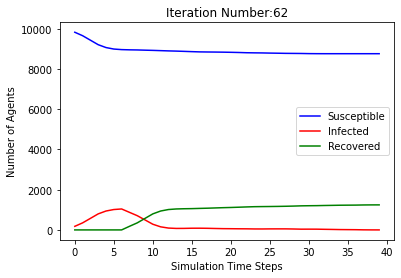

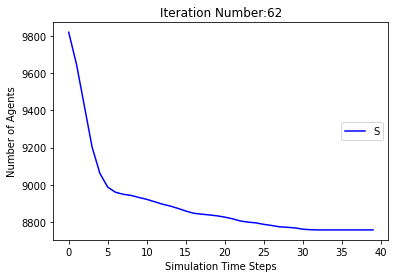

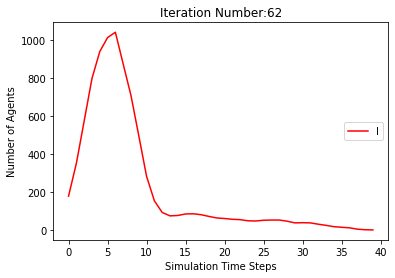

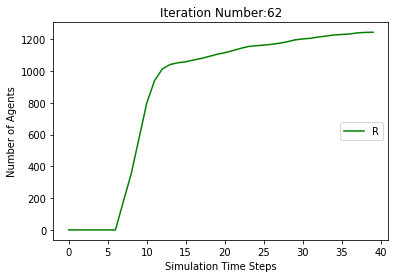

[9822, 9640, 9438, 9226, 9076, 8993, 8960, 8945, 8940, 8934, 8927, 8926, 8921, 8920, 8920, 8920, 8920, 8920, 8920, 8919, 8918, 8918, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[178, 360, 562, 774, 924, 1007, 1040, 877, 700, 504, 299, 150, 72, 40, 25, 20, 14, 7, 6, 2, 2, 2, 4, 4, 4, 4, 3, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 360, 562, 774, 924, 1007, 1040, 1055, 1060, 1066, 1073, 1074, 1079, 1080, 1080, 1080, 1080, 1080, 1080, 1081, 1082, 1082, 1084]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845

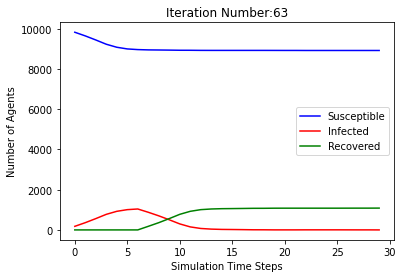

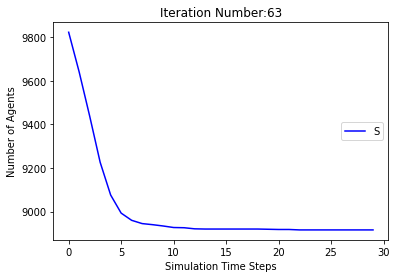

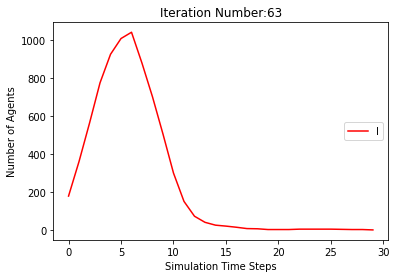

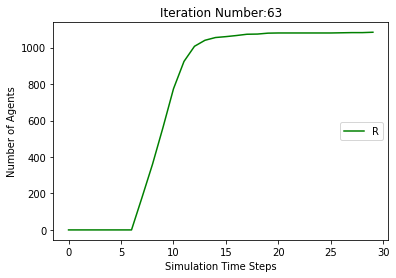

[9822, 9622, 9378, 9186, 9051, 8982, 8955, 8942, 8934, 8928, 8917, 8905, 8902, 8897, 8893, 8888, 8884, 8880, 8873, 8870, 8869, 8866, 8865, 8864, 8863, 8861, 8858, 8852, 8850, 8847, 8846, 8845, 8845, 8845, 8845, 8845, 8845, 8845, 8845]
[178, 378, 622, 814, 949, 1018, 1045, 880, 688, 450, 269, 146, 80, 58, 49, 46, 44, 37, 32, 32, 28, 27, 23, 20, 17, 12, 12, 17, 16, 18, 18, 18, 16, 13, 7, 5, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 378, 622, 814, 949, 1018, 1045, 1058, 1066, 1072, 1083, 1095, 1098, 1103, 1107, 1112, 1116, 1120, 1127, 1130, 1131, 1134, 1135, 1136, 1137, 1139, 1142, 1148, 1150, 1153, 1154, 1155]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584

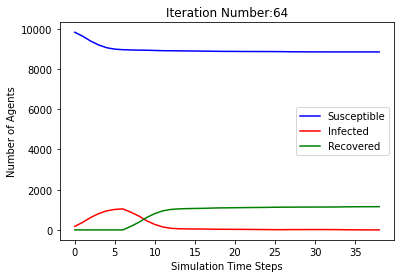

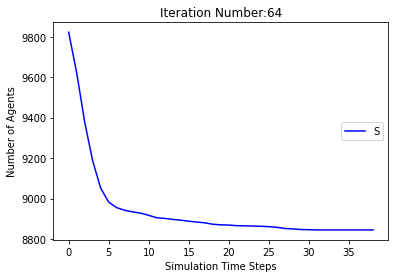

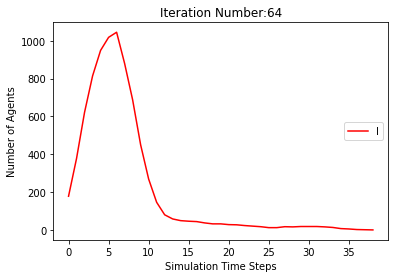

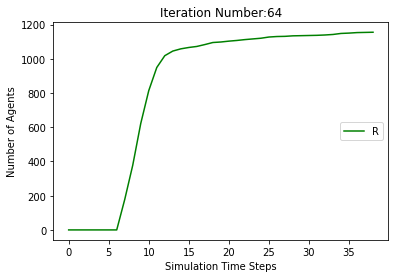

[9822, 9638, 9405, 9194, 9063, 8994, 8973, 8968, 8967, 8963, 8959, 8946, 8938, 8928, 8921, 8918, 8917, 8917, 8917, 8917, 8917, 8917, 8917, 8917]
[178, 362, 595, 806, 937, 1006, 1027, 854, 671, 442, 235, 117, 56, 45, 47, 49, 46, 42, 29, 21, 11, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 362, 595, 806, 937, 1006, 1027, 1032, 1033, 1037, 1041, 1054, 1062, 1072, 1079, 1082, 1083]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 

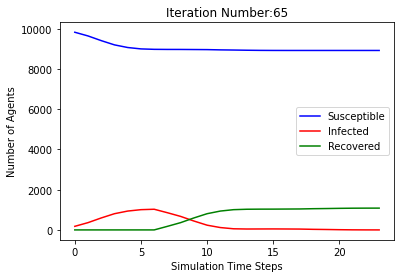

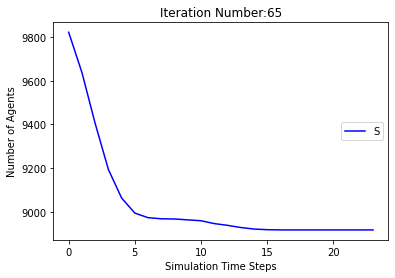

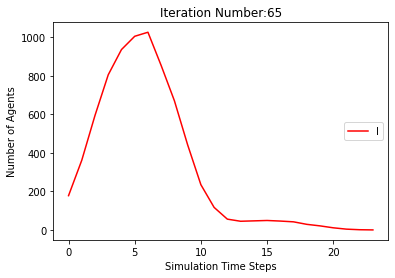

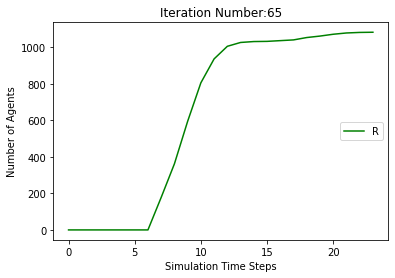

[9822, 9642, 9401, 9190, 9052, 8995, 8961, 8941, 8904, 8881, 8861, 8848, 8841, 8838, 8836, 8832, 8830, 8824, 8821, 8818, 8813, 8809, 8806, 8805, 8802, 8795, 8792, 8790, 8790, 8790, 8790, 8790, 8790, 8790, 8790]
[178, 358, 599, 810, 948, 1005, 1039, 881, 738, 520, 329, 204, 154, 123, 105, 72, 51, 37, 27, 23, 25, 27, 26, 25, 22, 26, 26, 23, 19, 16, 15, 12, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 358, 599, 810, 948, 1005, 1039, 1059, 1096, 1119, 1139, 1152, 1159, 1162, 1164, 1168, 1170, 1176, 1179, 1182, 1187, 1191, 1194, 1195, 1198, 1205, 1208, 1210]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9

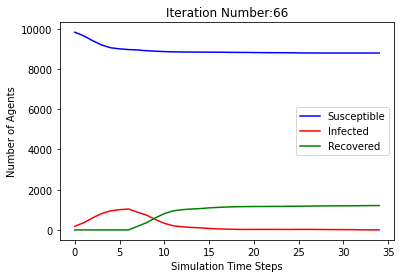

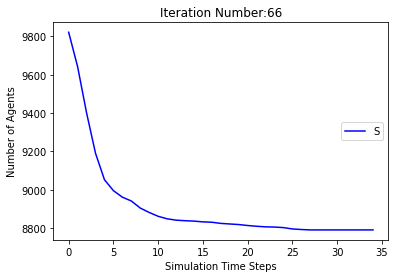

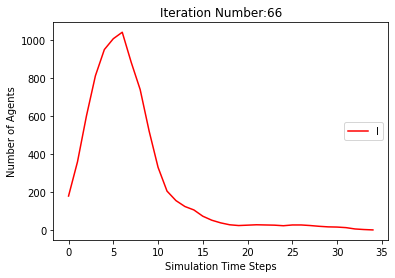

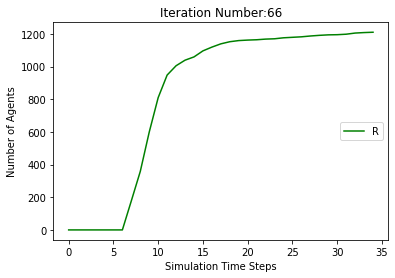

[9822, 9660, 9424, 9227, 9062, 8975, 8942, 8926, 8918, 8912, 8904, 8891, 8885, 8882, 8878, 8875, 8875, 8875, 8875, 8875, 8875, 8875, 8875]
[178, 340, 576, 773, 938, 1025, 1058, 896, 742, 512, 323, 171, 90, 60, 48, 43, 37, 29, 16, 10, 7, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 340, 576, 773, 938, 1025, 1058, 1074, 1082, 1088, 1096, 1109, 1115, 1118, 1122, 1125]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726

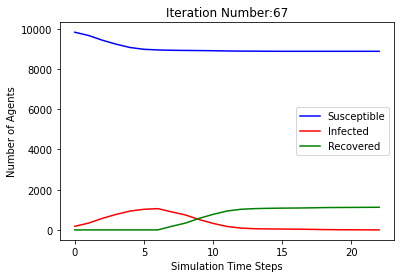

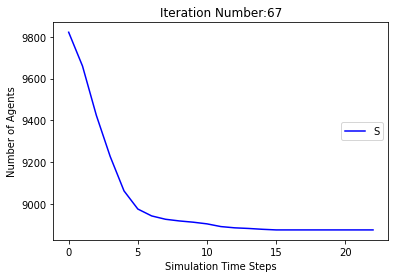

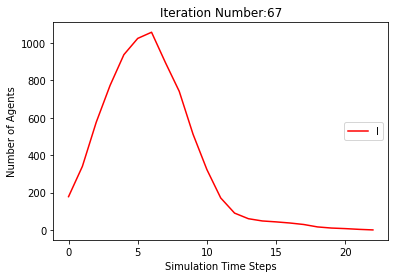

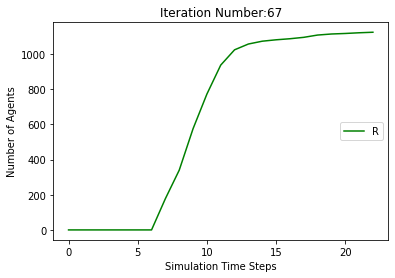

[9822, 9641, 9408, 9199, 9067, 8992, 8940, 8903, 8879, 8853, 8830, 8800, 8778, 8755, 8741, 8723, 8711, 8699, 8677, 8654, 8637, 8622, 8619, 8619, 8619, 8619, 8619, 8619, 8619, 8619]
[178, 359, 592, 801, 933, 1008, 1060, 919, 762, 555, 369, 267, 214, 185, 162, 156, 142, 131, 123, 124, 118, 119, 104, 92, 80, 58, 35, 18, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 359, 592, 801, 933, 1008, 1060, 1097, 1121, 1147, 1170, 1200, 1222, 1245, 1259, 1277, 1289, 1301, 1323, 1346, 1363, 1378, 1381]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 

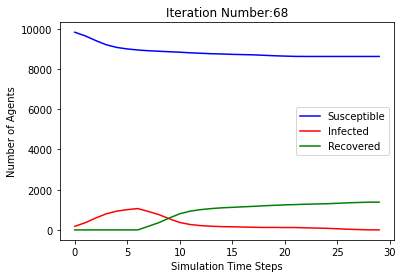

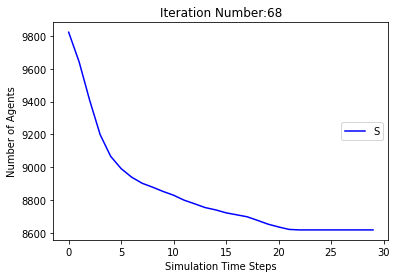

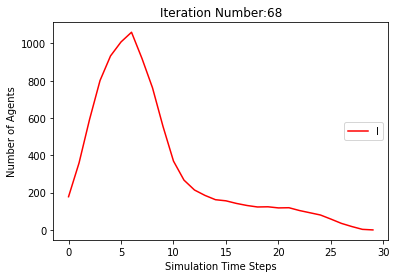

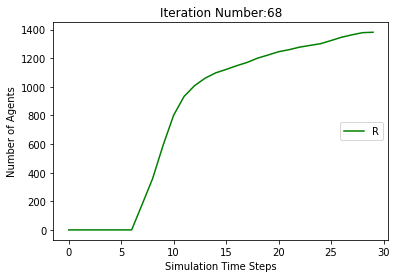

[9822, 9654, 9437, 9202, 9058, 8985, 8954, 8930, 8916, 8911, 8907, 8905, 8905, 8903, 8902, 8902, 8902, 8900, 8896, 8892, 8891, 8889, 8888, 8888, 8886, 8884, 8883, 8880, 8879, 8878, 8876, 8875, 8875, 8875, 8875, 8875, 8875, 8875, 8875]
[178, 346, 563, 798, 942, 1015, 1046, 892, 738, 526, 295, 153, 80, 51, 28, 14, 9, 7, 9, 13, 12, 13, 14, 14, 14, 12, 9, 11, 10, 10, 12, 11, 9, 8, 5, 4, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 346, 563, 798, 942, 1015, 1046, 1070, 1084, 1089, 1093, 1095, 1095, 1097, 1098, 1098, 1098, 1100, 1104, 1108, 1109, 1111, 1112, 1112, 1114, 1116, 1117, 1120, 1121, 1122, 1124, 1125]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579

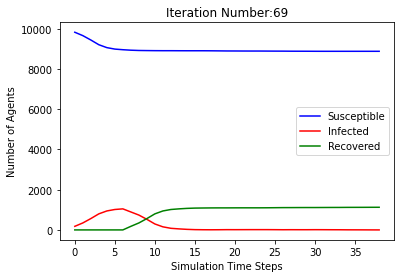

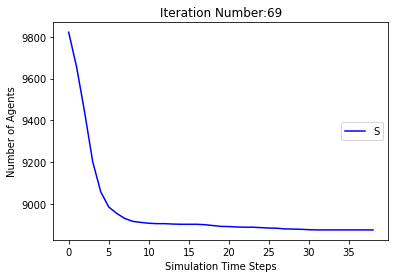

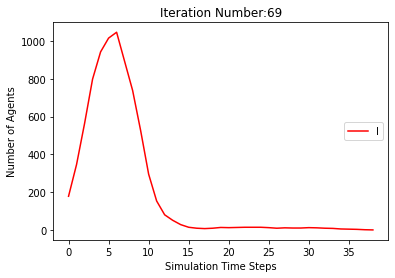

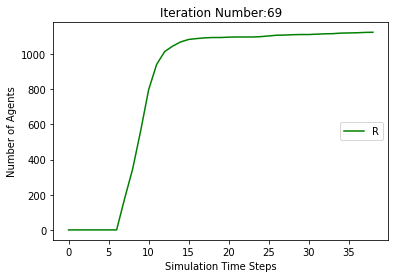

[9822, 9636, 9388, 9148, 9022, 8972, 8953, 8945, 8941, 8936, 8933, 8929, 8924, 8920, 8916, 8913, 8908, 8905, 8899, 8898, 8898, 8898, 8898, 8898, 8898, 8898, 8898]
[178, 364, 612, 852, 978, 1028, 1047, 877, 695, 452, 215, 93, 48, 33, 29, 28, 28, 28, 30, 26, 22, 18, 15, 10, 7, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 364, 612, 852, 978, 1028, 1047, 1055, 1059, 1064, 1067, 1071, 1076, 1080, 1084, 1087, 1092, 1095, 1101, 1102]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8

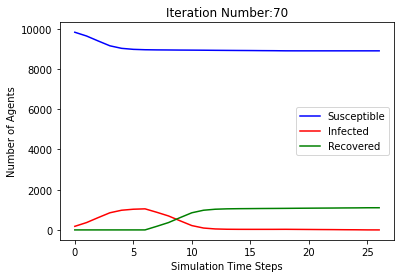

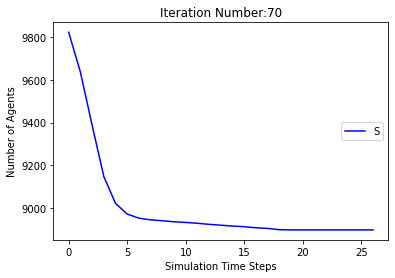

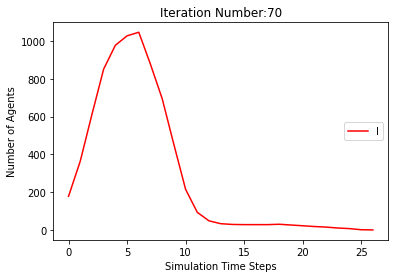

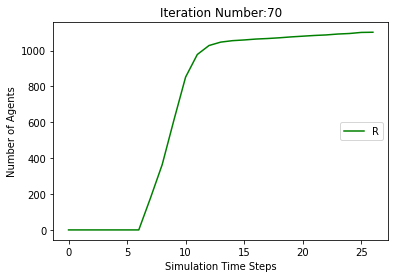

[9822, 9664, 9438, 9245, 9081, 9016, 8973, 8957, 8953, 8948, 8945, 8944, 8944, 8943, 8943, 8941, 8939, 8939, 8937, 8936, 8932, 8929, 8926, 8921, 8920, 8920, 8919, 8918, 8915, 8914, 8911, 8908, 8906, 8906, 8906, 8906, 8906, 8906, 8906, 8906]
[178, 336, 562, 755, 919, 984, 1027, 865, 711, 490, 300, 137, 72, 30, 14, 12, 9, 6, 7, 8, 11, 14, 15, 18, 19, 17, 17, 14, 14, 12, 10, 12, 14, 13, 12, 9, 8, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 336, 562, 755, 919, 984, 1027, 1043, 1047, 1052, 1055, 1056, 1056, 1057, 1057, 1059, 1061, 1061, 1063, 1064, 1068, 1071, 1074, 1079, 1080, 1080, 1081, 1082, 1085, 1086, 1089, 1092, 1094]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 

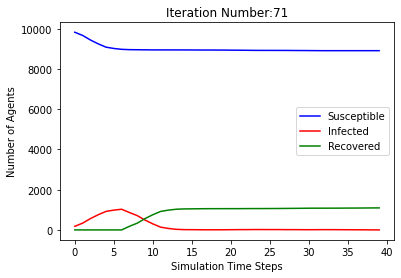

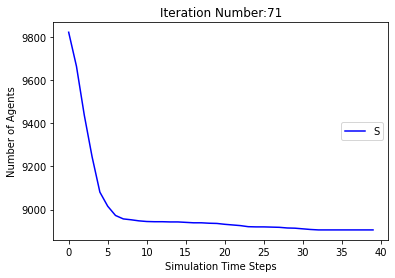

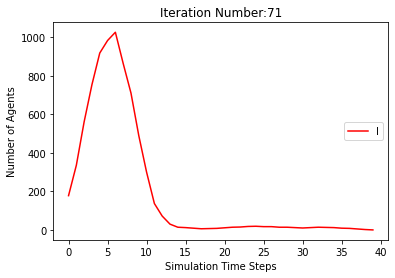

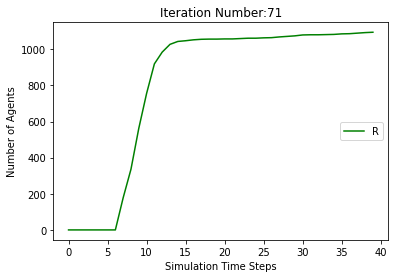

[9822, 9660, 9423, 9220, 9070, 8984, 8946, 8935, 8928, 8922, 8916, 8908, 8900, 8898, 8897, 8893, 8889, 8885, 8880, 8879, 8878, 8874, 8871, 8868, 8868, 8868, 8868, 8868, 8868, 8868, 8868]
[178, 340, 577, 780, 930, 1016, 1054, 887, 732, 501, 304, 162, 84, 48, 38, 35, 33, 31, 28, 21, 20, 23, 22, 21, 17, 12, 11, 10, 6, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 340, 577, 780, 930, 1016, 1054, 1065, 1072, 1078, 1084, 1092, 1100, 1102, 1103, 1107, 1111, 1115, 1120, 1121, 1122, 1126, 1129, 1132]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 88

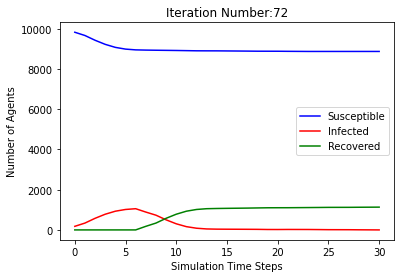

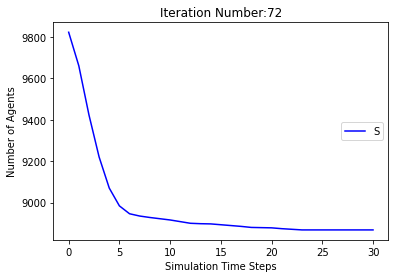

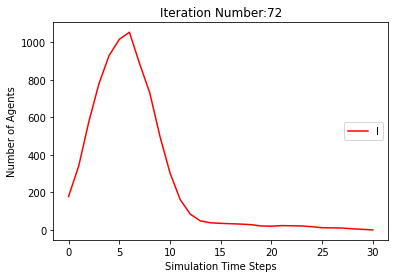

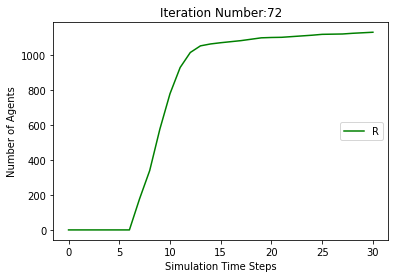

[9822, 9658, 9433, 9228, 9088, 9011, 8974, 8959, 8957, 8955, 8954, 8954, 8954, 8954, 8954, 8954, 8954, 8954]
[178, 342, 567, 772, 912, 989, 1026, 863, 701, 478, 274, 134, 57, 20, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 342, 567, 772, 912, 989, 1026, 1041, 1043, 1045, 1046]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 8690, 8686, 8685, 8684, 8682, 867

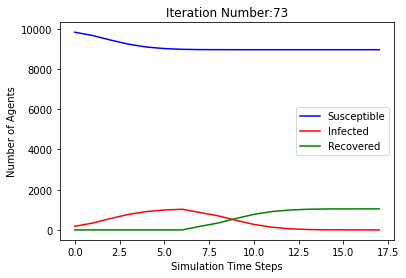

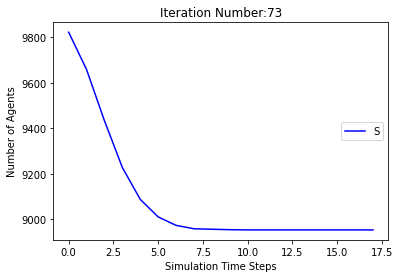

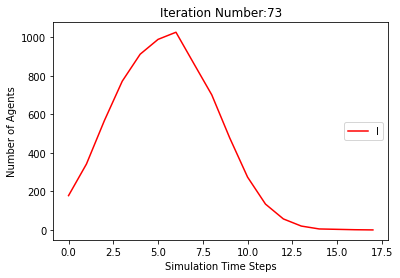

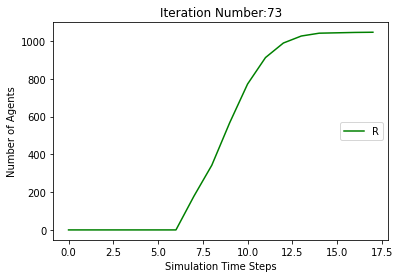

[9822, 9648, 9424, 9212, 9076, 9015, 8983, 8969, 8957, 8951, 8946, 8939, 8932, 8925, 8921, 8911, 8903, 8897, 8894, 8894, 8894, 8894, 8894, 8894, 8894, 8894]
[178, 352, 576, 788, 924, 985, 1017, 853, 691, 473, 266, 137, 83, 58, 48, 46, 48, 49, 45, 38, 31, 27, 17, 9, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 352, 576, 788, 924, 985, 1017, 1031, 1043, 1049, 1054, 1061, 1068, 1075, 1079, 1089, 1097, 1103, 1106]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 

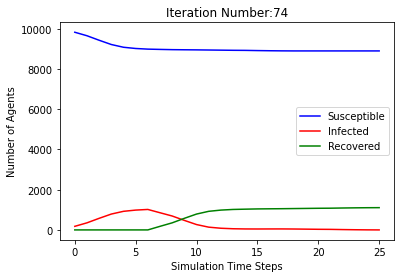

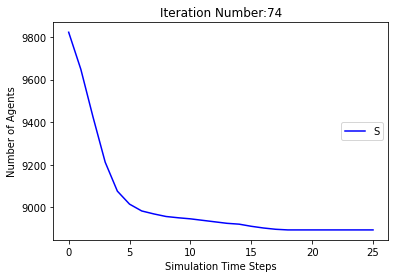

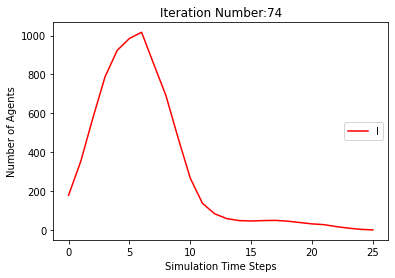

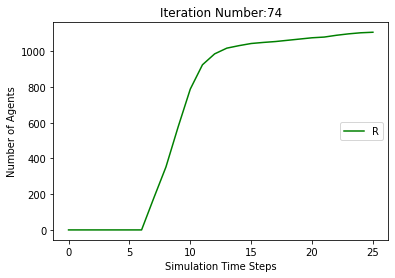

[9822, 9670, 9440, 9218, 9073, 8997, 8956, 8935, 8927, 8923, 8921, 8921, 8921, 8918, 8915, 8911, 8910, 8910, 8906, 8905, 8902, 8894, 8889, 8886, 8886, 8886, 8886, 8886, 8886, 8886, 8886]
[178, 330, 560, 782, 927, 1003, 1044, 887, 743, 517, 297, 152, 76, 38, 20, 16, 13, 11, 15, 16, 16, 21, 22, 24, 24, 20, 19, 16, 8, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 330, 560, 782, 927, 1003, 1044, 1065, 1073, 1077, 1079, 1079, 1079, 1082, 1085, 1089, 1090, 1090, 1094, 1095, 1098, 1106, 1111, 1114]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 88

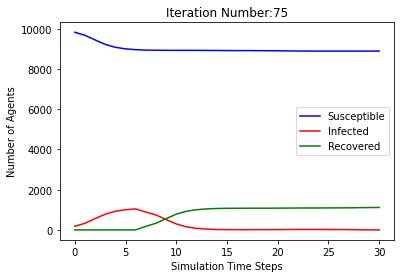

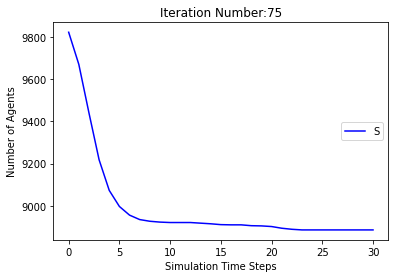

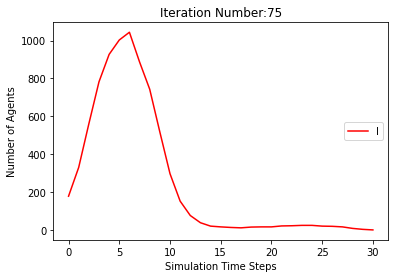

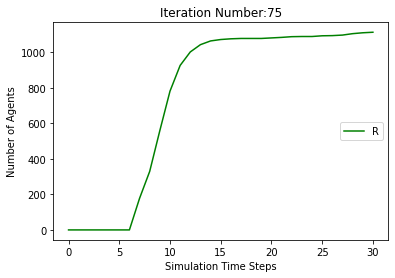

[9822, 9622, 9382, 9175, 9047, 8933, 8867, 8807, 8758, 8720, 8687, 8663, 8637, 8600, 8564, 8534, 8506, 8485, 8459, 8437, 8417, 8398, 8385, 8379, 8377, 8374, 8370, 8367, 8360, 8357, 8356, 8355, 8353, 8352, 8351, 8349, 8348, 8347, 8345, 8343, 8342, 8340, 8340, 8340, 8340, 8340, 8340, 8340, 8340]
[178, 378, 618, 825, 953, 1067, 1133, 1015, 864, 662, 488, 384, 296, 267, 243, 224, 214, 202, 204, 200, 183, 166, 149, 127, 108, 85, 67, 50, 38, 28, 23, 22, 21, 18, 16, 11, 9, 9, 10, 10, 10, 11, 9, 8, 7, 5, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 378, 618, 825, 953, 1067, 1133, 1193, 1242, 1280, 1313, 1337, 1363, 1400, 1436, 1466, 1494, 1515, 1541, 1563, 1583, 1602, 1615, 1621, 1623, 1626, 1630, 1633, 1640, 1643, 1644, 1645, 1647, 1648, 1649, 1651, 1652, 1653, 1655, 1657, 1658, 1660]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823

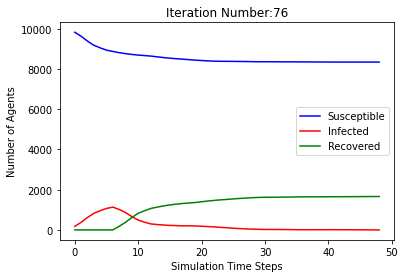

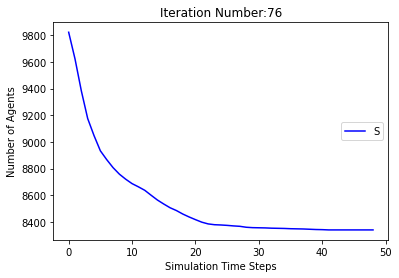

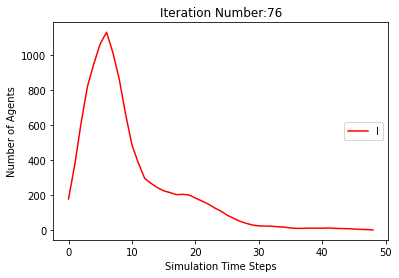

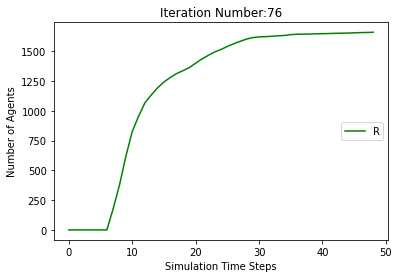

[9822, 9661, 9449, 9244, 9071, 8988, 8945, 8931, 8923, 8920, 8916, 8916, 8916, 8916, 8916, 8916, 8916, 8916]
[178, 339, 551, 756, 929, 1012, 1055, 891, 738, 529, 328, 155, 72, 29, 15, 7, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 339, 551, 756, 929, 1012, 1055, 1069, 1077, 1080, 1084]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 8690, 8686, 8685, 8684, 8682, 

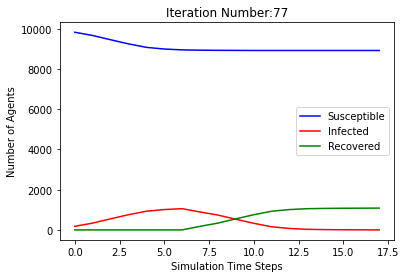

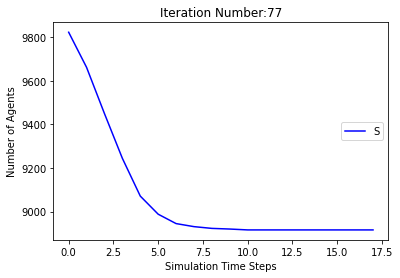

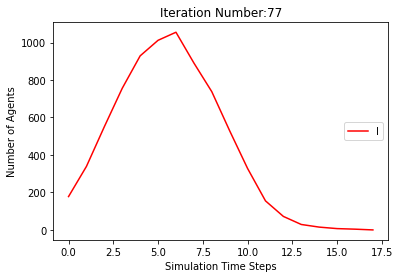

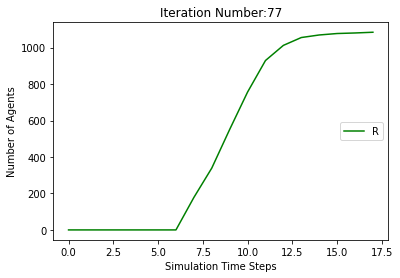

[9822, 9660, 9435, 9221, 9067, 8990, 8963, 8949, 8943, 8939, 8934, 8929, 8922, 8917, 8916, 8913, 8913, 8913, 8913, 8913, 8913, 8913, 8913]
[178, 340, 565, 779, 933, 1010, 1037, 873, 717, 496, 287, 138, 68, 46, 33, 30, 26, 21, 16, 9, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 340, 565, 779, 933, 1010, 1037, 1051, 1057, 1061, 1066, 1071, 1078, 1083, 1084, 1087]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726,

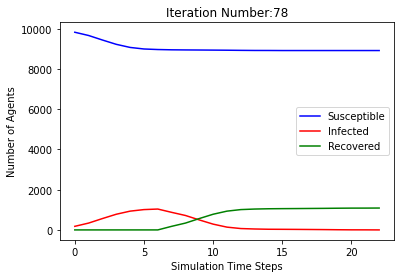

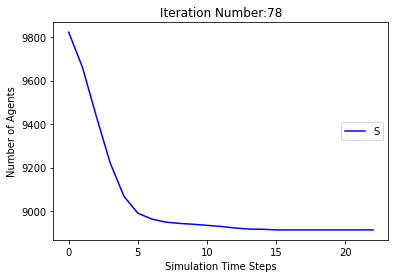

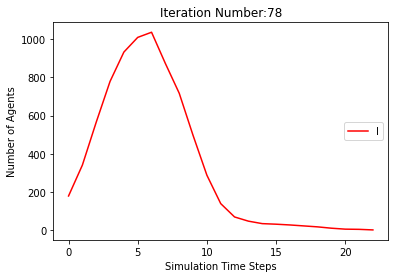

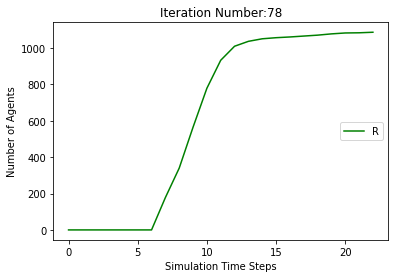

[9822, 9652, 9436, 9189, 9052, 8975, 8924, 8870, 8814, 8776, 8746, 8713, 8695, 8678, 8659, 8641, 8621, 8598, 8565, 8537, 8512, 8490, 8464, 8444, 8432, 8424, 8411, 8404, 8400, 8392, 8384, 8375, 8369, 8364, 8359, 8358, 8357, 8357, 8357, 8357, 8357, 8357, 8357, 8357]
[178, 348, 564, 811, 948, 1025, 1076, 952, 838, 660, 443, 339, 280, 246, 211, 173, 155, 148, 148, 158, 166, 169, 177, 177, 166, 141, 126, 108, 90, 72, 60, 57, 55, 47, 45, 42, 35, 27, 18, 12, 7, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 348, 564, 811, 948, 1025, 1076, 1130, 1186, 1224, 1254, 1287, 1305, 1322, 1341, 1359, 1379, 1402, 1435, 1463, 1488, 1510, 1536, 1556, 1568, 1576, 1589, 1596, 1600, 1608, 1616, 1625, 1631, 1636, 1641, 1642, 1643]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 944

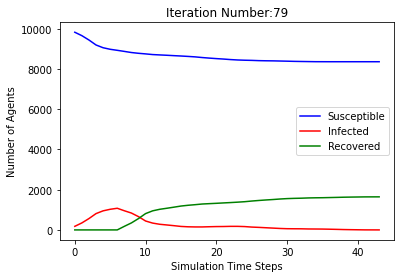

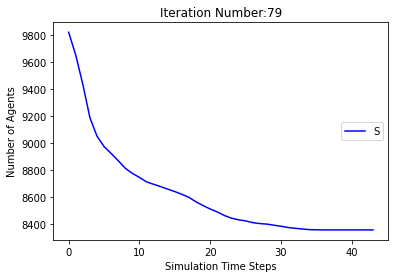

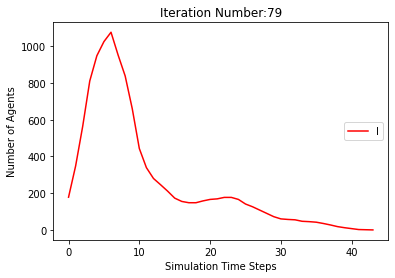

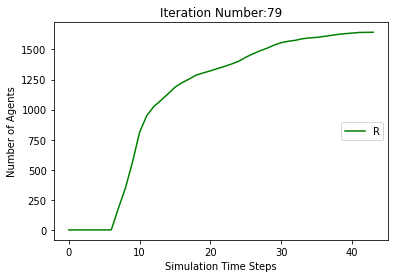

[9822, 9644, 9411, 9201, 9091, 9015, 8975, 8959, 8946, 8932, 8916, 8906, 8901, 8895, 8882, 8869, 8852, 8842, 8828, 8820, 8816, 8810, 8803, 8794, 8790, 8788, 8788, 8786, 8785, 8785, 8785, 8785, 8785, 8785, 8785, 8785]
[178, 356, 589, 799, 909, 985, 1025, 863, 698, 479, 285, 185, 114, 80, 77, 77, 80, 74, 78, 81, 79, 72, 66, 58, 52, 40, 32, 30, 25, 18, 9, 5, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 356, 589, 799, 909, 985, 1025, 1041, 1054, 1068, 1084, 1094, 1099, 1105, 1118, 1131, 1148, 1158, 1172, 1180, 1184, 1190, 1197, 1206, 1210, 1212, 1212, 1214, 1215]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579],

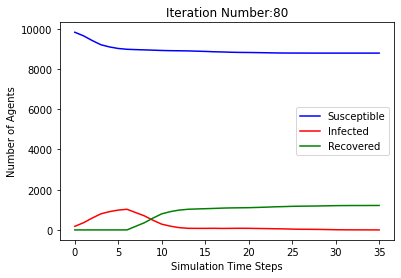

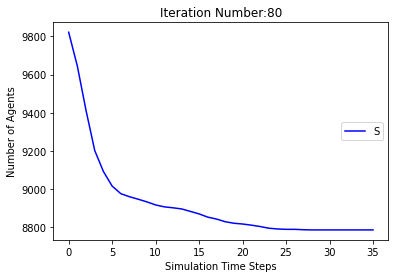

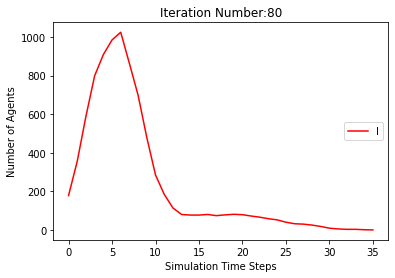

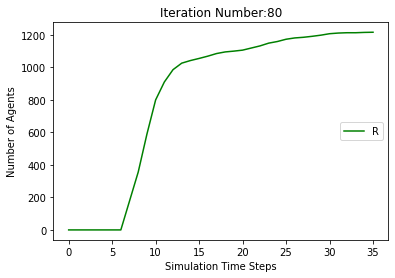

[9822, 9638, 9410, 9199, 9052, 8983, 8949, 8941, 8938, 8937, 8936, 8935, 8935, 8933, 8931, 8929, 8928, 8928, 8928, 8928, 8928, 8928, 8928, 8928]
[178, 362, 590, 801, 948, 1017, 1051, 881, 700, 473, 263, 117, 48, 16, 10, 9, 9, 8, 7, 7, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 362, 590, 801, 948, 1017, 1051, 1059, 1062, 1063, 1064, 1065, 1065, 1067, 1069, 1071, 1072]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 

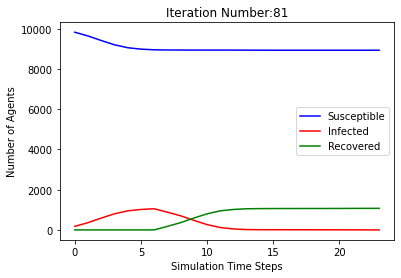

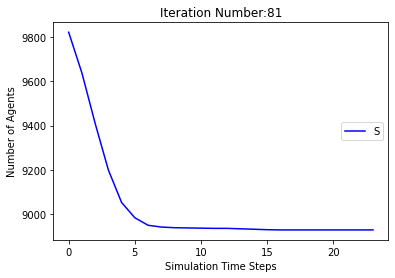

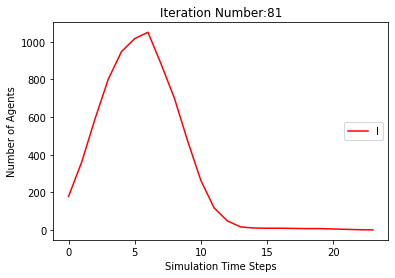

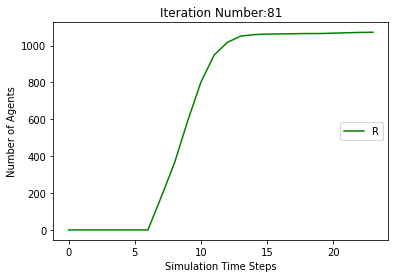

[9822, 9624, 9387, 9190, 9049, 8970, 8938, 8927, 8918, 8912, 8911, 8908, 8904, 8897, 8888, 8881, 8879, 8879, 8879, 8879, 8878, 8878, 8878, 8877, 8871, 8865, 8865, 8865, 8864, 8864, 8863, 8862, 8862, 8862, 8861, 8861, 8861, 8860, 8860, 8860, 8860, 8860, 8860, 8860, 8860]
[178, 376, 613, 810, 951, 1030, 1062, 895, 706, 475, 279, 141, 66, 41, 39, 37, 33, 32, 29, 25, 19, 10, 3, 2, 8, 14, 14, 13, 14, 14, 14, 9, 3, 3, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 376, 613, 810, 951, 1030, 1062, 1073, 1082, 1088, 1089, 1092, 1096, 1103, 1112, 1119, 1121, 1121, 1121, 1121, 1122, 1122, 1122, 1123, 1129, 1135, 1135, 1135, 1136, 1136, 1137, 1138, 1138, 1138, 1139, 1139, 1139, 1140]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041

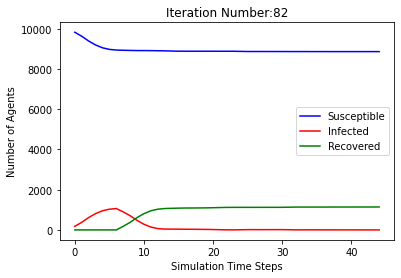

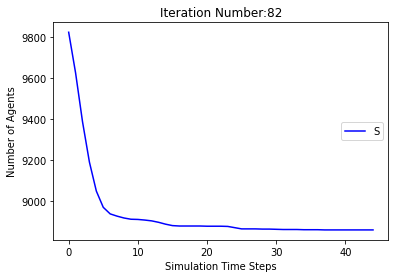

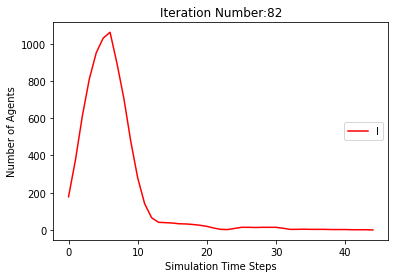

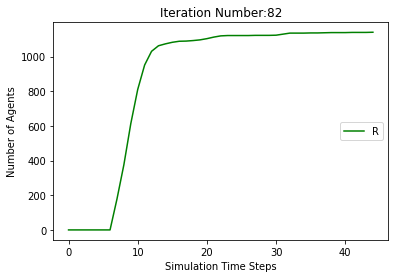

[9822, 9641, 9402, 9178, 9060, 8994, 8967, 8953, 8945, 8939, 8935, 8932, 8929, 8926, 8925, 8923, 8920, 8917, 8912, 8909, 8907, 8907, 8907, 8907, 8907, 8907, 8907, 8907]
[178, 359, 598, 822, 940, 1006, 1033, 869, 696, 463, 243, 128, 65, 41, 28, 22, 19, 18, 20, 20, 19, 18, 16, 13, 10, 5, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 359, 598, 822, 940, 1006, 1033, 1047, 1055, 1061, 1065, 1068, 1071, 1074, 1075, 1077, 1080, 1083, 1088, 1091, 1093]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 87

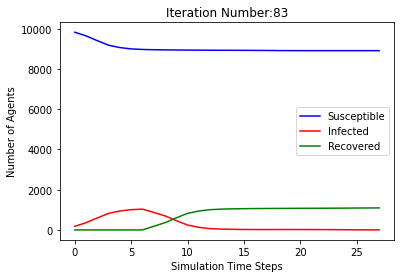

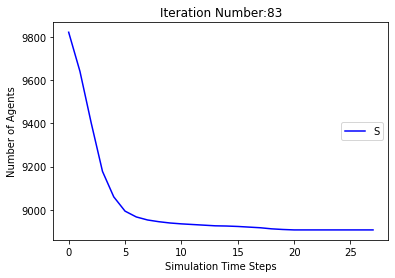

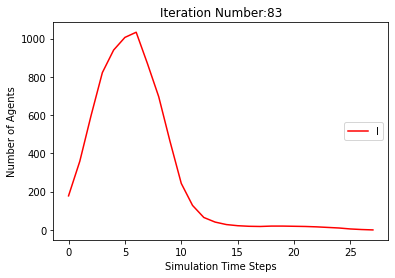

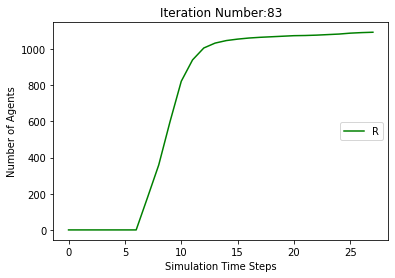

[9822, 9662, 9461, 9244, 9089, 9005, 8969, 8955, 8945, 8937, 8925, 8920, 8913, 8909, 8905, 8903, 8903, 8903, 8903, 8903, 8903, 8903, 8903]
[178, 338, 539, 756, 911, 995, 1031, 867, 717, 524, 319, 169, 92, 60, 50, 42, 34, 22, 17, 10, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 338, 539, 756, 911, 995, 1031, 1045, 1055, 1063, 1075, 1080, 1087, 1091, 1095, 1097]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 

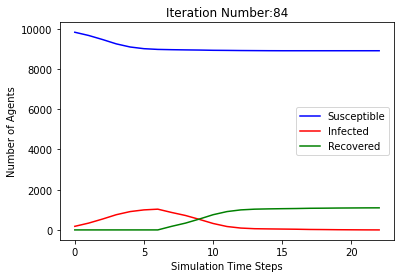

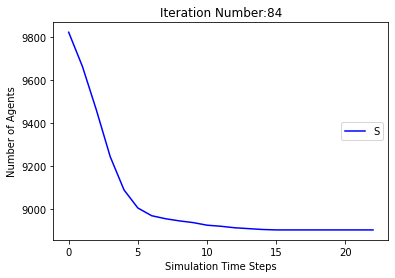

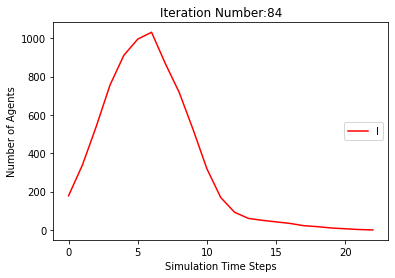

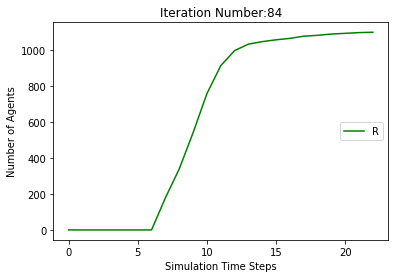

[9822, 9645, 9392, 9174, 9044, 8991, 8958, 8944, 8934, 8927, 8923, 8919, 8917, 8913, 8913, 8913, 8912, 8909, 8908, 8908, 8908, 8908, 8908, 8908, 8908, 8908]
[178, 355, 608, 826, 956, 1009, 1042, 878, 711, 465, 251, 125, 74, 45, 31, 21, 15, 14, 11, 9, 5, 5, 5, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 355, 608, 826, 956, 1009, 1042, 1056, 1066, 1073, 1077, 1081, 1083, 1087, 1087, 1087, 1088, 1091, 1092]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 87

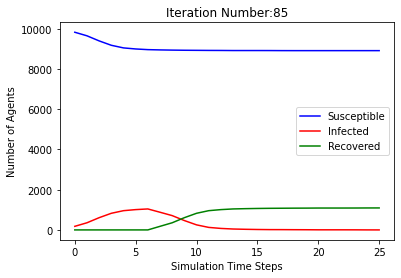

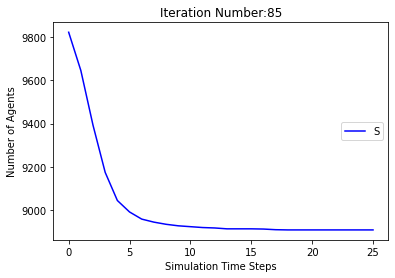

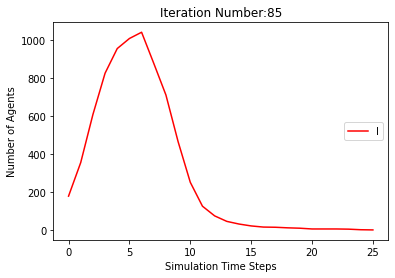

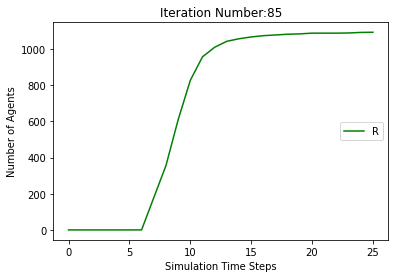

[9822, 9648, 9424, 9212, 9043, 8945, 8899, 8854, 8816, 8779, 8742, 8702, 8665, 8627, 8604, 8572, 8543, 8514, 8491, 8481, 8465, 8446, 8429, 8414, 8404, 8393, 8389, 8388, 8388, 8388, 8388, 8388, 8388, 8388, 8388]
[178, 352, 576, 788, 957, 1055, 1101, 968, 832, 645, 470, 341, 280, 272, 250, 244, 236, 228, 211, 184, 162, 158, 143, 129, 110, 98, 92, 77, 58, 41, 26, 16, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 352, 576, 788, 957, 1055, 1101, 1146, 1184, 1221, 1258, 1298, 1335, 1373, 1396, 1428, 1457, 1486, 1509, 1519, 1535, 1554, 1571, 1586, 1596, 1607, 1611, 1612]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579]

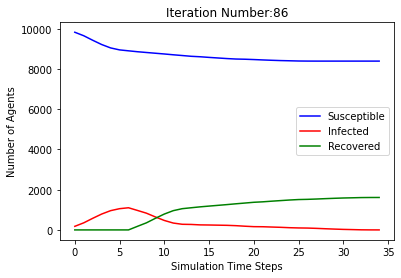

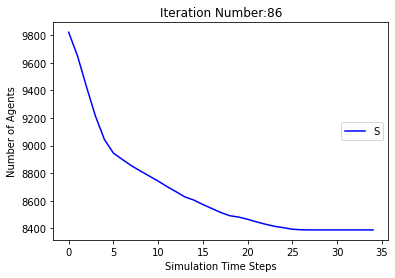

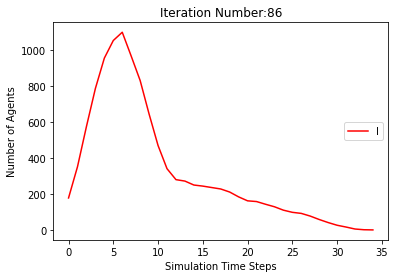

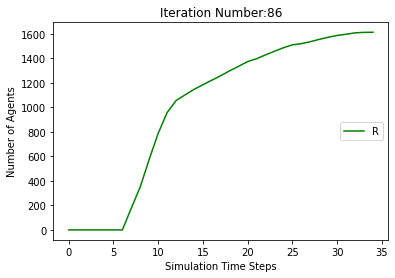

[9822, 9645, 9418, 9192, 9048, 8990, 8954, 8939, 8936, 8935, 8933, 8931, 8929, 8924, 8923, 8923, 8923, 8923, 8923, 8923, 8923, 8923]
[178, 355, 582, 808, 952, 1010, 1046, 883, 709, 483, 259, 117, 61, 30, 16, 13, 12, 10, 8, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 355, 582, 808, 952, 1010, 1046, 1061, 1064, 1065, 1067, 1069, 1071, 1076, 1077]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 872

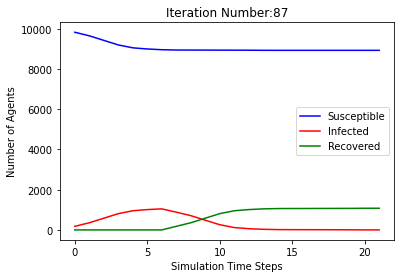

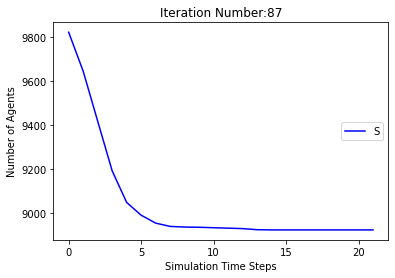

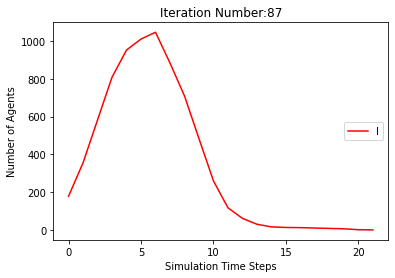

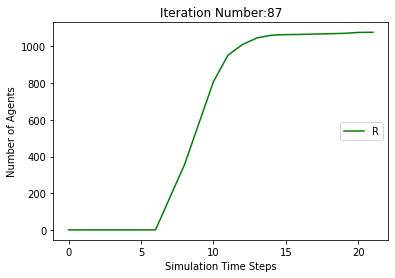

[9822, 9660, 9462, 9257, 9106, 9017, 8976, 8962, 8951, 8943, 8932, 8920, 8911, 8905, 8902, 8902, 8902, 8902, 8902, 8902, 8902, 8902]
[178, 340, 538, 743, 894, 983, 1024, 860, 709, 519, 325, 186, 106, 71, 60, 49, 41, 30, 18, 9, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 340, 538, 743, 894, 983, 1024, 1038, 1049, 1057, 1068, 1080, 1089, 1095, 1098]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 872

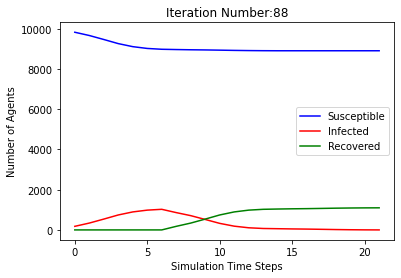

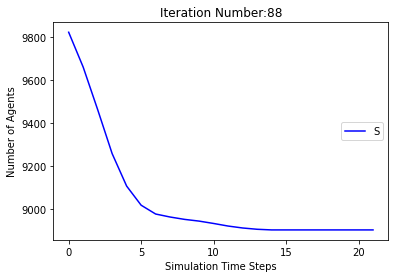

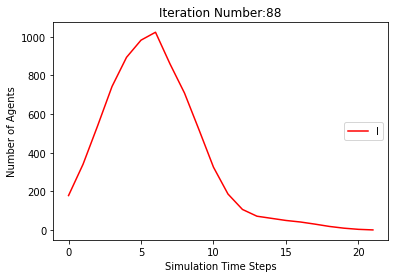

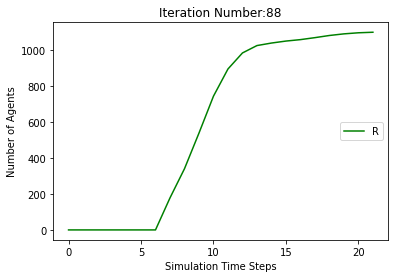

[9822, 9639, 9407, 9205, 9072, 8996, 8970, 8950, 8940, 8929, 8915, 8903, 8891, 8881, 8869, 8858, 8848, 8840, 8838, 8833, 8828, 8826, 8822, 8818, 8815, 8812, 8811, 8810, 8809, 8809, 8808, 8805, 8801, 8801, 8800, 8799, 8799, 8799, 8799, 8799, 8799, 8799, 8799]
[178, 361, 593, 795, 928, 1004, 1030, 872, 699, 478, 290, 169, 105, 89, 81, 82, 81, 75, 65, 58, 53, 43, 36, 30, 25, 26, 22, 18, 17, 13, 10, 10, 11, 10, 10, 10, 10, 9, 6, 2, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 361, 593, 795, 928, 1004, 1030, 1050, 1060, 1071, 1085, 1097, 1109, 1119, 1131, 1142, 1152, 1160, 1162, 1167, 1172, 1174, 1178, 1182, 1185, 1188, 1189, 1190, 1191, 1191, 1192, 1195, 1199, 1199, 1200, 1201]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 

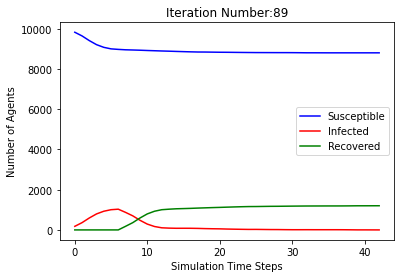

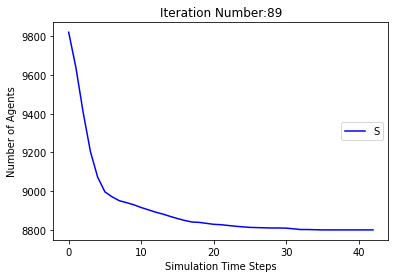

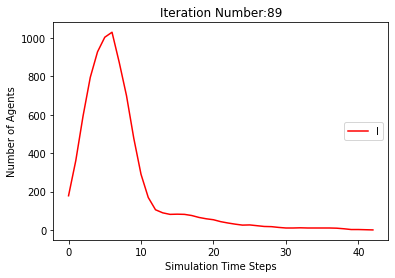

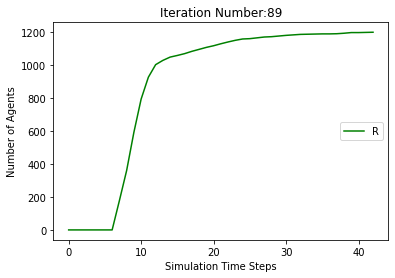

[9822, 9655, 9431, 9233, 9095, 9004, 8942, 8908, 8867, 8843, 8825, 8810, 8803, 8797, 8792, 8776, 8761, 8745, 8736, 8729, 8728, 8728, 8728, 8728, 8727, 8727, 8727, 8727, 8727, 8727, 8727, 8727]
[178, 345, 569, 767, 905, 996, 1058, 914, 788, 588, 408, 285, 201, 145, 116, 91, 82, 80, 74, 74, 69, 64, 48, 33, 18, 9, 2, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 345, 569, 767, 905, 996, 1058, 1092, 1133, 1157, 1175, 1190, 1197, 1203, 1208, 1224, 1239, 1255, 1264, 1271, 1272, 1272, 1272, 1272, 1273]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8

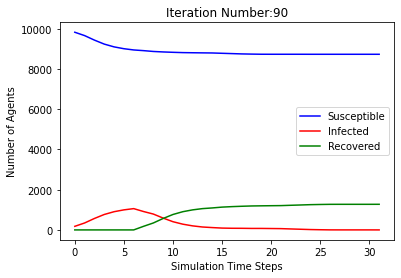

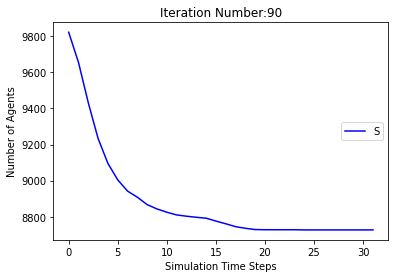

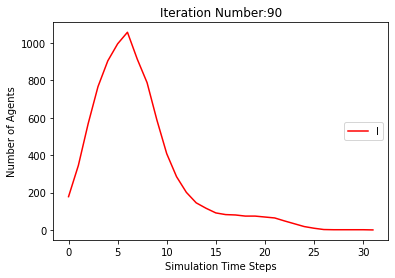

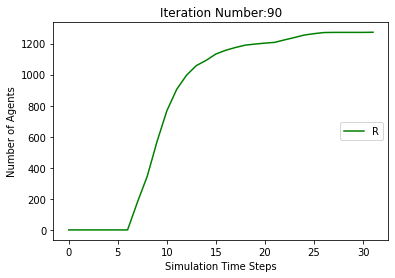

[9822, 9637, 9415, 9197, 9065, 8989, 8967, 8949, 8932, 8906, 8883, 8864, 8841, 8823, 8809, 8796, 8781, 8760, 8738, 8719, 8711, 8704, 8697, 8693, 8691, 8687, 8685, 8681, 8680, 8680, 8680, 8680, 8680, 8680, 8680, 8680]
[178, 363, 585, 803, 935, 1011, 1033, 873, 705, 509, 314, 201, 148, 144, 140, 136, 125, 123, 126, 122, 112, 105, 99, 88, 69, 51, 34, 30, 24, 17, 13, 11, 7, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 363, 585, 803, 935, 1011, 1033, 1051, 1068, 1094, 1117, 1136, 1159, 1177, 1191, 1204, 1219, 1240, 1262, 1281, 1289, 1296, 1303, 1307, 1309, 1313, 1315, 1319, 1320]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579,

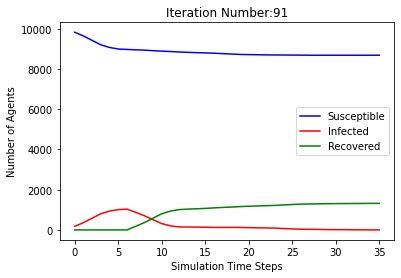

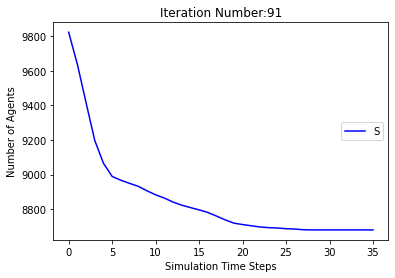

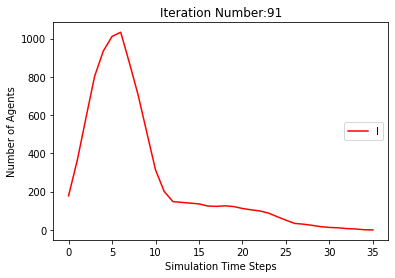

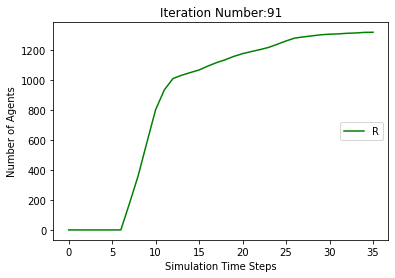

[9822, 9657, 9418, 9209, 9065, 8991, 8964, 8945, 8933, 8924, 8919, 8911, 8904, 8901, 8896, 8893, 8893, 8891, 8889, 8881, 8877, 8873, 8872, 8872, 8872, 8872, 8872, 8872, 8872, 8872]
[178, 343, 582, 791, 935, 1009, 1036, 877, 724, 494, 290, 154, 87, 63, 49, 40, 31, 28, 22, 23, 24, 23, 21, 21, 19, 17, 9, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 343, 582, 791, 935, 1009, 1036, 1055, 1067, 1076, 1081, 1089, 1096, 1099, 1104, 1107, 1107, 1109, 1111, 1119, 1123, 1127, 1128]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8

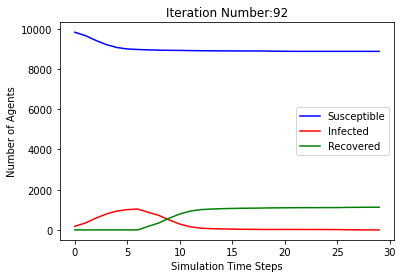

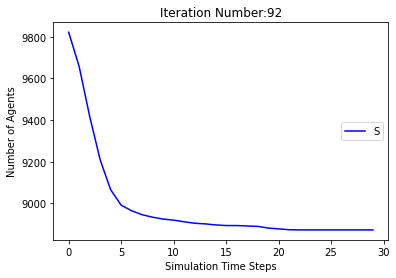

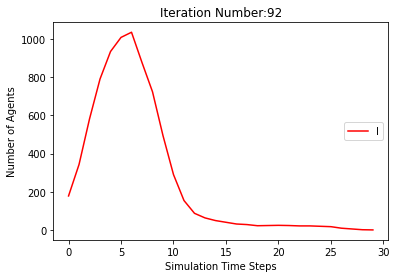

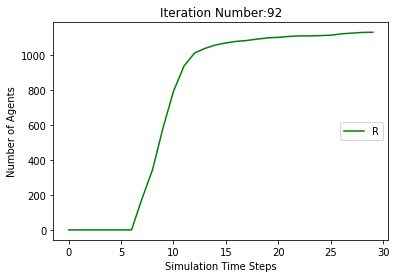

[9822, 9651, 9426, 9224, 9086, 9008, 8966, 8943, 8928, 8915, 8900, 8888, 8877, 8869, 8863, 8859, 8857, 8857, 8855, 8855, 8853, 8853, 8852, 8852, 8852, 8852, 8852, 8852, 8852, 8852]
[178, 349, 574, 776, 914, 992, 1034, 879, 723, 511, 324, 198, 131, 97, 80, 69, 58, 43, 33, 22, 16, 10, 7, 5, 5, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 349, 574, 776, 914, 992, 1034, 1057, 1072, 1085, 1100, 1112, 1123, 1131, 1137, 1141, 1143, 1143, 1145, 1145, 1147, 1147, 1148]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 

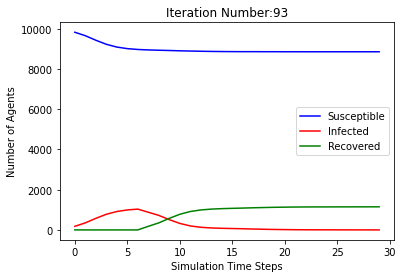

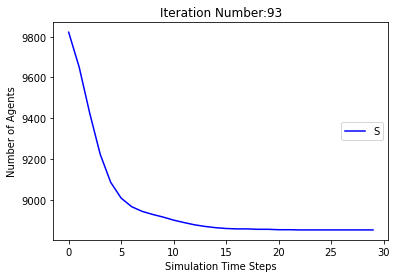

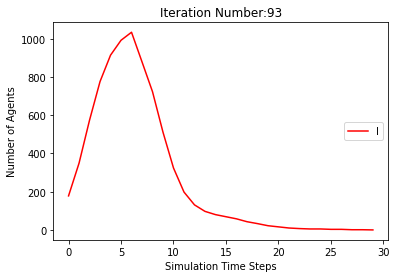

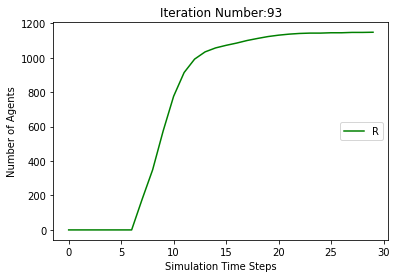

[9822, 9650, 9437, 9223, 9069, 9006, 8972, 8959, 8952, 8946, 8944, 8939, 8934, 8933, 8931, 8929, 8928, 8928, 8928, 8928, 8928, 8928, 8928, 8928]
[178, 350, 563, 777, 931, 994, 1028, 863, 698, 491, 279, 130, 72, 39, 28, 23, 18, 16, 11, 6, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 350, 563, 777, 931, 994, 1028, 1041, 1048, 1054, 1056, 1061, 1066, 1067, 1069, 1071, 1072]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729

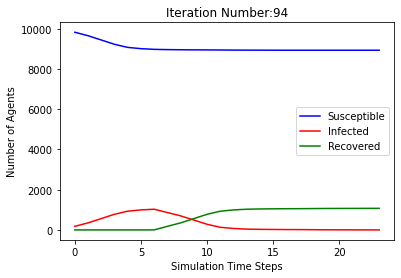

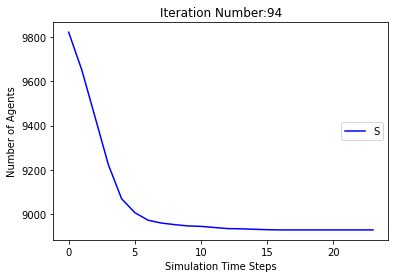

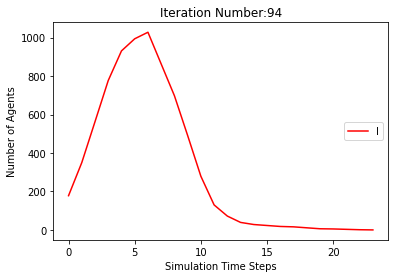

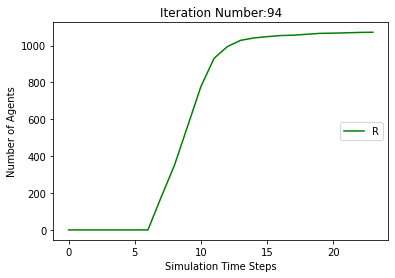

[9822, 9669, 9424, 9200, 9063, 8993, 8964, 8948, 8941, 8935, 8930, 8925, 8922, 8918, 8915, 8909, 8908, 8905, 8905, 8905, 8905, 8905, 8905, 8905, 8905]
[178, 331, 576, 800, 937, 1007, 1036, 874, 728, 489, 270, 138, 71, 46, 33, 32, 27, 25, 20, 17, 13, 10, 4, 3, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 331, 576, 800, 937, 1007, 1036, 1052, 1059, 1065, 1070, 1075, 1078, 1082, 1085, 1091, 1092, 1095]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 87

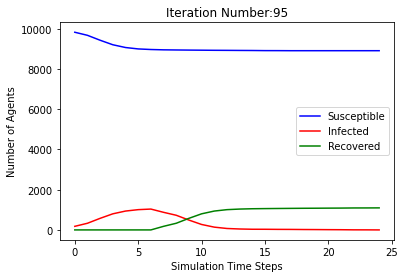

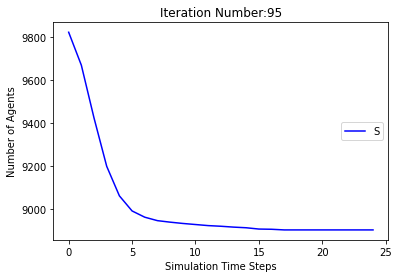

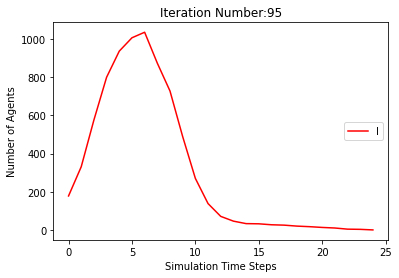

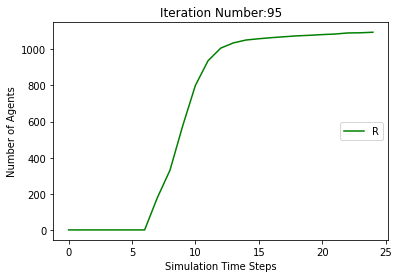

[9822, 9651, 9417, 9187, 9044, 8976, 8954, 8944, 8940, 8937, 8935, 8933, 8933, 8932, 8931, 8929, 8929, 8929, 8929, 8929, 8929, 8929, 8929]
[178, 349, 583, 813, 956, 1024, 1046, 878, 711, 480, 252, 111, 43, 22, 13, 11, 8, 6, 4, 4, 3, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 349, 583, 813, 956, 1024, 1046, 1056, 1060, 1063, 1065, 1067, 1067, 1068, 1069, 1071]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 87

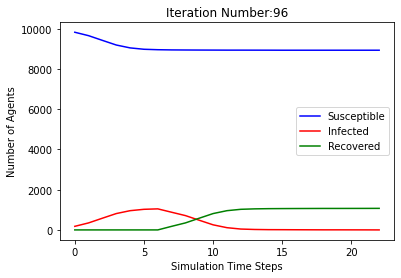

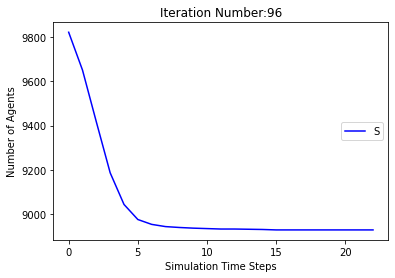

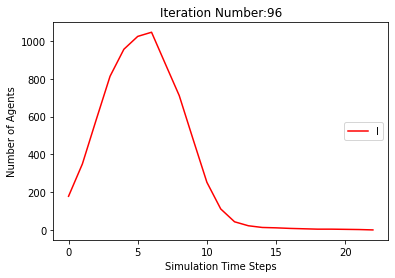

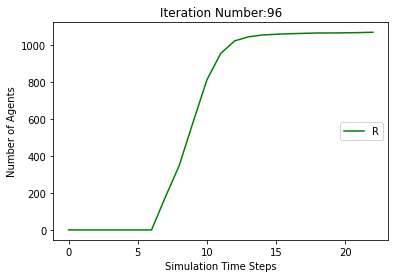

[9822, 9627, 9382, 9159, 9015, 8943, 8916, 8906, 8904, 8901, 8897, 8895, 8895, 8895, 8895, 8895, 8895, 8895, 8895]
[178, 373, 618, 841, 985, 1057, 1084, 916, 723, 481, 262, 120, 48, 21, 11, 9, 6, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 373, 618, 841, 985, 1057, 1084, 1094, 1096, 1099, 1103, 1105]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 8690, 8686, 868

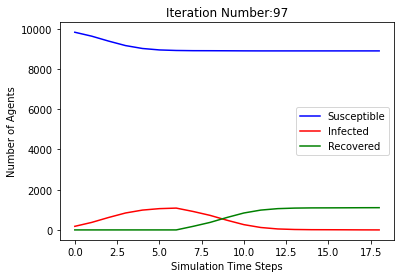

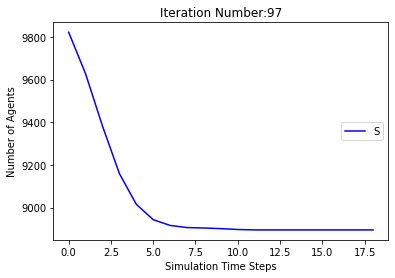

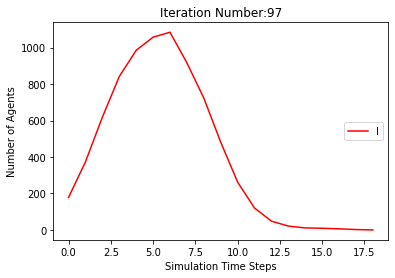

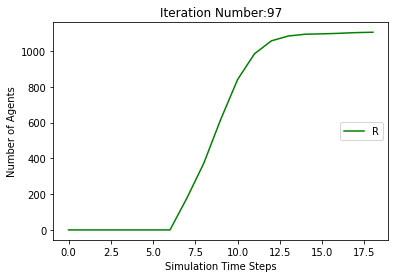

[9822, 9672, 9447, 9237, 9101, 9014, 8973, 8952, 8944, 8941, 8938, 8932, 8926, 8920, 8918, 8910, 8908, 8906, 8905, 8905, 8905, 8905, 8905, 8905, 8905, 8905]
[178, 328, 553, 763, 899, 986, 1027, 870, 728, 506, 299, 169, 88, 53, 34, 34, 33, 32, 27, 21, 15, 13, 5, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 328, 553, 763, 899, 986, 1027, 1048, 1056, 1059, 1062, 1068, 1074, 1080, 1082, 1090, 1092, 1094, 1095]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8

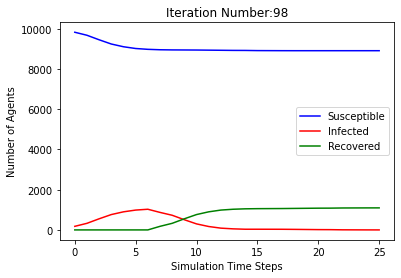

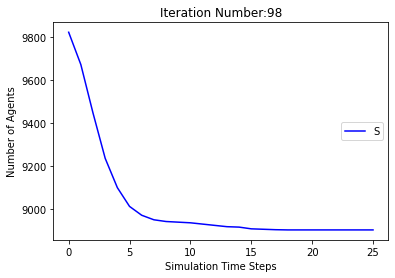

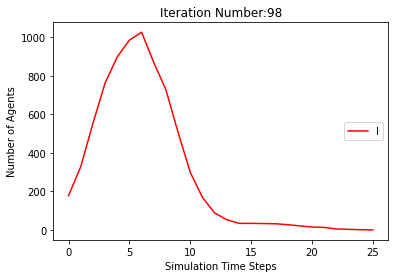

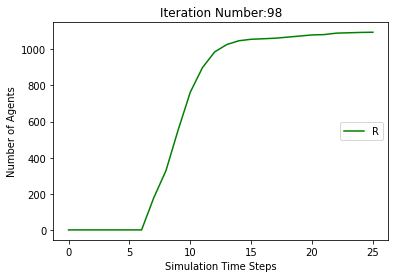

[9822, 9671, 9448, 9228, 9086, 9014, 8972, 8954, 8943, 8941, 8935, 8931, 8927, 8927, 8927, 8927, 8927, 8927, 8927, 8927]
[178, 329, 552, 772, 914, 986, 1028, 868, 728, 507, 293, 155, 87, 45, 27, 16, 14, 8, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 329, 552, 772, 914, 986, 1028, 1046, 1057, 1059, 1065, 1069, 1073]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 8707, 8701, 8695, 

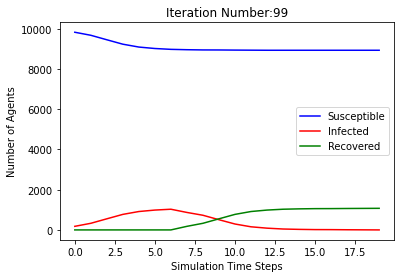

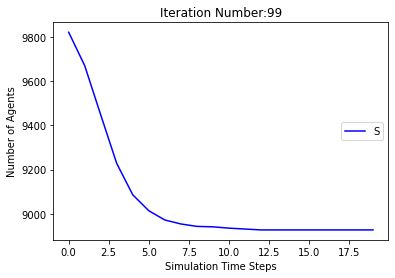

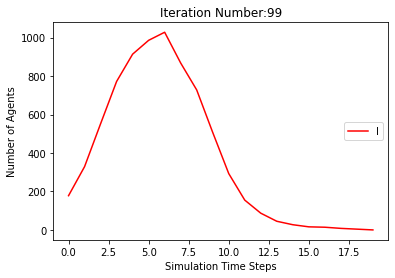

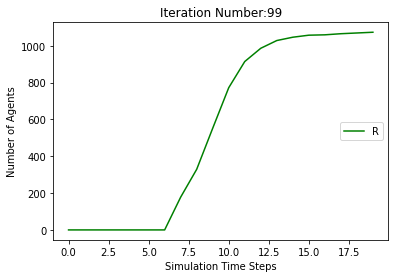

[9822, 9649, 9402, 9189, 9062, 8979, 8954, 8943, 8938, 8934, 8931, 8931, 8929, 8928, 8928, 8928, 8928, 8928, 8928, 8928, 8928]
[178, 351, 598, 811, 938, 1021, 1046, 879, 711, 468, 258, 131, 50, 26, 15, 10, 6, 3, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 178, 351, 598, 811, 938, 1021, 1046, 1057, 1062, 1066, 1069, 1069, 1071, 1072]
[[], [9822, 9651, 9433, 9227, 9084, 8997, 8961, 8948, 8945, 8939, 8934, 8925, 8922, 8915, 8911, 8899, 8888, 8878, 8872, 8871, 8871, 8870, 8867, 8865, 8859, 8858, 8852, 8848, 8840, 8836, 8833, 8831, 8828, 8826, 8825, 8823, 8823, 8821, 8821, 8821, 8821, 8821, 8821, 8821, 8821], [9822, 9662, 9447, 9216, 9041, 8935, 8877, 8832, 8789, 8760, 8729, 8711, 8687, 8669, 8651, 8625, 8609, 8592, 8584, 8579, 8579, 8579, 8579, 8579, 8579, 8579, 8579], [9822, 9639, 9420, 9196, 9069, 9007, 8968, 8941, 8930, 8917, 8908, 8901, 8894, 8882, 8874, 8855, 8845, 8837, 8820, 8804, 8794, 8786, 8777, 8768, 8760, 8751, 8745, 8742, 8739, 8737, 8732, 8729, 8727, 8726, 8725, 8725, 8725, 8721, 8716, 87

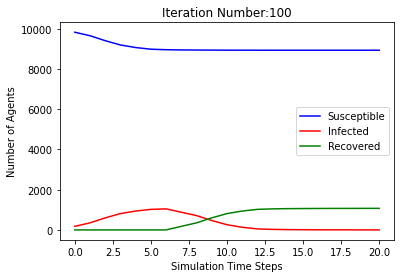

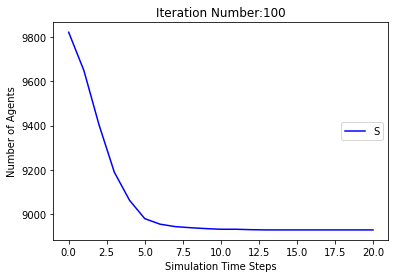

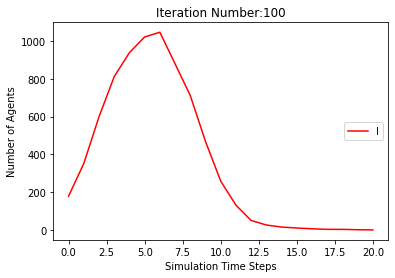

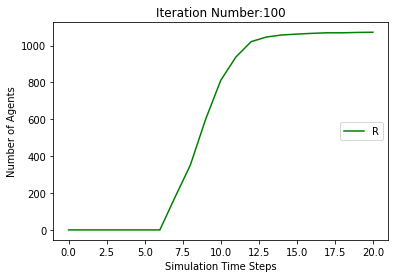

In [10]:
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

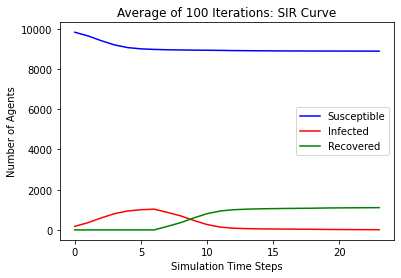

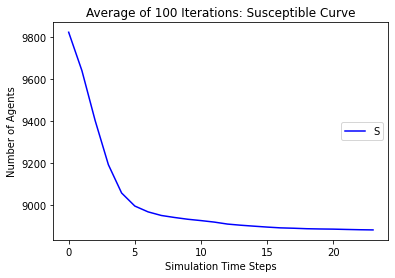

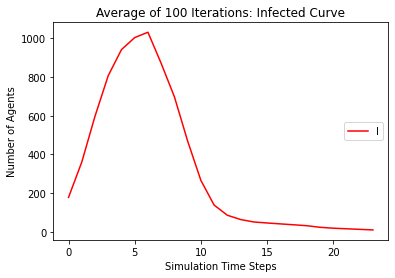

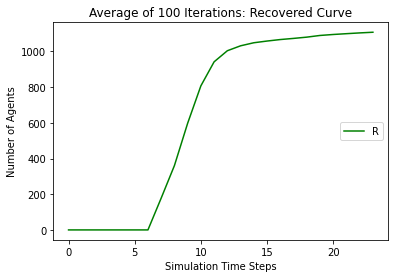

In [11]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
